In [1]:
# All imports

from __future__ import print_function, division
import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import MaxPooling2D, merge
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import losses
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import glob


import numba
from numba import njit, prange

from keras import backend as K
from keras.layers import Layer

import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, Callback, TensorBoard
from keras import backend as keras

from skimage.measure import label
from scipy.io import loadmat
from scipy.ndimage import zoom
#from scipy.misc import imresize
import pywt

import csv
import random
import time
%matplotlib inline  

from scipy import ndimage, misc

import pywt
#import hdf5storage

import scipy.io as sio
from skimage.filters import threshold_otsu

#import pylidc as pl
#from keras.backend.tensorflow_backend import set_session
import tensorflow as tf

import pywt
import numpy as np
#import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage.io as io
#from sklearn.decomposition import PCA
import collections, numpy
import warnings
from scipy import ndimage, misc
warnings.filterwarnings('ignore')

#import pymrt as mrt
#import pymrt.geometry
import ipyvolume as ipv
import copy


import os
import glob
import uuid
import numpy as np
import LungNet as LN
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from ipdb import set_trace as bp



#from image_gen import ImageDataGenerator
#from load_data import loadDataMontgomery, loadDataJSRT
#from build_model import build_UNet2D_4L

import pandas as pd
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint



import numpy
import warnings
from keras.layers import Convolution3D, Input, merge, RepeatVector, Activation
from keras.models import Model
from keras.layers.advanced_activations import PReLU
from keras import activations, initializers, regularizers
from keras.engine import Layer, InputSpec
from keras.utils.conv_utils import conv_output_length
#from keras.utils.np_utils import conv_output_length
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from keras.engine.topology import Layer
import functools
import tensorflow as tf
import pickle
import time


#All the import statements for Plasma
# import dicomloader
# import plasma
# import iv
# import vputils
# import imagetools
# import csv
# import numpy as np
# import plasmatools
# import dicomloader
# import sys
# import cad_utils
# import numpy
# import glob
# import vpsegmentationtools
# import vpsynth
# import vpdeeplearningapi
# import os
# import glob
# def imagetools_ResampleImage(image, sampledimage, center, hPhysicalSize, resolution, interp=False, itype=None):
#     hSize        = numpy.array(hPhysicalSize)-numpy.array(resolution)*0.5 
#     # In plasma volume, half size does not include the half voxel at the border
#     minCorner    = numpy.array(center)-numpy.array(hSize)
#     physicalSize = numpy.array(hSize)*2
#     imageSize    = [0]*3

#     for i in range(3):
#         imageSize[i] = physicalSize[i]/resolution[i]+1

#     if not itype:
#         itype = vputils.getdatatype(image)
    
#     if not interp:
#         vputils.sample(image, sampledimage, itype, int(imageSize[0]), int(imageSize[1]), 
#                        int(imageSize[2]), minCorner[0], minCorner[1], minCorner[2], 
#                        physicalSize[0], physicalSize[1], physicalSize[2])
#     else:
#         ip = vpsynth.interp(image)
#         vputils.sample(ip, sampledimage, itype, int(imageSize[0]), int(imageSize[1]), 
#                        int(imageSize[2]), minCorner[0], minCorner[1], minCorner[2], 
#                        physicalSize[0], physicalSize[1],physicalSize[2])
#         vputils.delete(ip)
#     return

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/home/dril/anaconda3/envs/astra/lib/python3.6/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [38]:
# [BLOCK 0] All the Models and helper functions are defined here 3D Unet model, Auto-Encoder and Shape-Projection

from scipy import ndimage, misc

neighbour_code_to_normals = [
    [[0, 0, 0]],
    [[0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[0.125, -0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25]],
    [[0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.5, 0.0, -0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25]],
    [[0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.5, 0.0, 0.0], [0.25, -0.25, 0.25], [-0.125, 0.125, -0.125]],
    [[-0.5, 0.0, 0.0], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[0.5, 0.0, 0.0], [0.5, 0.0, 0.0]],
    [[0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.5, 0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, 0.0, -0.5], [0.25, 0.25, 0.25], [-0.125, -0.125, -0.125]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25], [0.125, -0.125, -0.125]],
    [[0.125, 0.125, 0.125], [0.375, 0.375, 0.375], [0.0, -0.25, 0.25], [-0.25, 0.0, 0.25]],
    [[0.125, -0.125, -0.125], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.375, 0.375, 0.375], [0.0, 0.25, -0.25], [-0.125, -0.125, -0.125], [-0.25, 0.25, 0.0]],
    [[-0.5, 0.0, 0.0], [-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25], [0.125, 0.125, 0.125]],
    [[-0.5, 0.0, 0.0], [-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25]],
    [[0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.0, -0.5, 0.0], [0.125, 0.125, -0.125], [0.25, 0.25, -0.25]],
    [[0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.25, -0.0, -0.25], [0.25, 0.0, 0.25]],
    [[0.0, -0.25, 0.25], [0.0, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[-0.375, -0.375, 0.375], [-0.0, 0.25, 0.25], [0.125, 0.125, -0.125], [-0.25, -0.0, -0.25]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.25, 0.25, -0.25], [0.25, 0.25, -0.25], [0.125, 0.125, -0.125], [-0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.5, 0.0, 0.0], [0.25, -0.25, 0.25], [-0.125, 0.125, -0.125], [0.125, -0.125, 0.125]],
    [[0.0, 0.25, -0.25], [0.375, -0.375, -0.375], [-0.125, 0.125, 0.125], [0.25, 0.25, 0.0]],
    [[-0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0]],
    [[0.0, 0.5, 0.0], [-0.25, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.0, 0.5, 0.0], [0.125, -0.125, 0.125], [-0.25, 0.25, -0.25]],
    [[0.0, 0.5, 0.0], [0.0, -0.5, 0.0]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0], [0.125, -0.125, 0.125]],
    [[-0.375, -0.375, -0.375], [-0.25, 0.0, 0.25], [-0.125, -0.125, -0.125], [-0.25, 0.25, 0.0]],
    [[0.125, 0.125, 0.125], [0.0, -0.5, 0.0], [-0.25, -0.25, -0.25], [-0.125, -0.125, -0.125]],
    [[0.0, -0.5, 0.0], [-0.25, -0.25, -0.25], [-0.125, -0.125, -0.125]],
    [[-0.125, 0.125, 0.125], [0.25, -0.25, 0.0], [-0.25, 0.25, 0.0]],
    [[0.0, 0.5, 0.0], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.375, 0.375, -0.375], [-0.25, -0.25, 0.0], [-0.125, 0.125, -0.125], [-0.25, 0.0, 0.25]],
    [[0.0, 0.5, 0.0], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0]],
    [[-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25]],
    [[0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.375, -0.375, 0.375], [0.0, -0.25, -0.25], [-0.125, 0.125, -0.125], [0.25, 0.25, 0.0]],
    [[-0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25]],
    [[0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.0, 0.5, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[-0.25, 0.25, -0.25], [-0.25, 0.25, -0.25], [-0.125, 0.125, -0.125], [-0.125, 0.125, -0.125]],
    [[-0.25, 0.0, -0.25], [0.375, -0.375, -0.375], [0.0, 0.25, -0.25], [-0.125, 0.125, 0.125]],
    [[0.5, 0.0, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[-0.0, 0.0, 0.5], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[-0.25, -0.0, -0.25], [-0.375, 0.375, 0.375], [-0.25, -0.25, 0.0], [-0.125, 0.125, 0.125]],
    [[0.0, 0.0, -0.5], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [0.0, 0.0, 0.5]],
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125], [0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[0.125, 0.125, 0.125], [0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[-0.25, 0.0, 0.25], [0.25, 0.0, -0.25], [-0.125, 0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[0.125, -0.125, 0.125], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[0.25, 0.0, 0.25], [-0.375, -0.375, 0.375], [-0.25, 0.25, 0.0], [-0.125, -0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.0, -0.5, 0.0], [0.125, 0.125, -0.125], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.0, 0.25, 0.25], [0.0, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, 0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.0, 0.5, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.5, 0.0, -0.0], [0.25, -0.25, -0.25], [0.125, -0.125, -0.125]],
    [[-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125], [-0.25, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.375, -0.375, 0.375], [0.0, 0.25, 0.25], [-0.125, 0.125, -0.125], [-0.25, 0.0, 0.25]],
    [[0.0, -0.5, 0.0], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.375, -0.375, 0.375], [0.25, -0.25, 0.0], [0.0, 0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [-0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[0.125, 0.125, 0.125], [0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[0.5, 0.0, -0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, 0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [0.25, 0.25, -0.0], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [0.25, 0.25, -0.0], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.5, 0.0, -0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125], [0.125, 0.125, 0.125]],
    [[0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[0.125, 0.125, 0.125], [0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[-0.125, 0.125, 0.125], [-0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[-0.375, -0.375, 0.375], [0.25, -0.25, 0.0], [0.0, 0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.0, -0.5, 0.0], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[0.375, -0.375, 0.375], [0.0, 0.25, 0.25], [-0.125, 0.125, -0.125], [-0.25, 0.0, 0.25]],
    [[-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125], [-0.25, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.5, 0.0, -0.0], [0.25, -0.25, -0.25], [0.125, -0.125, -0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.0, 0.5, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.0, 0.0, 0.5], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.0, 0.25, 0.25], [0.0, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [0.0, 0.25, 0.25], [0.0, 0.25, 0.25]],
    [[0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.0, -0.5, 0.0], [0.125, 0.125, -0.125], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[0.125, 0.125, 0.125], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[-0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.25, 0.0, 0.25], [-0.375, -0.375, 0.375], [-0.25, 0.25, 0.0], [-0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25], [0.25, 0.0, 0.25]],
    [[-0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [0.25, 0.0, -0.25], [-0.125, 0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125], [0.25, 0.25, 0.25], [0.0, 0.0, 0.5]],
    [[-0.0, 0.0, 0.5], [0.0, 0.0, 0.5]],
    [[0.0, 0.0, -0.5], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [-0.375, 0.375, 0.375], [-0.25, -0.25, 0.0], [-0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[-0.0, 0.0, 0.5], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [0.25, 0.0, -0.25]],
    [[0.5, 0.0, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[-0.25, 0.0, -0.25], [0.375, -0.375, -0.375], [0.0, 0.25, -0.25], [-0.125, 0.125, 0.125]],
    [[-0.25, 0.25, -0.25], [-0.25, 0.25, -0.25], [-0.125, 0.125, -0.125], [-0.125, 0.125, -0.125]],
    [[-0.0, 0.5, 0.0], [-0.25, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[0.375, -0.375, 0.375], [0.0, -0.25, -0.25], [-0.125, 0.125, -0.125], [0.25, 0.25, 0.0]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.0, 0.0, 0.5], [0.25, -0.25, 0.25], [0.125, -0.125, 0.125]],
    [[0.0, -0.25, 0.25], [0.0, -0.25, 0.25]],
    [[-0.125, -0.125, 0.125], [-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0]],
    [[0.125, 0.125, 0.125], [-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0], [-0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0], [-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[0.0, 0.5, 0.0], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125]],
    [[-0.375, 0.375, -0.375], [-0.25, -0.25, 0.0], [-0.125, 0.125, -0.125], [-0.25, 0.0, 0.25]],
    [[0.0, 0.5, 0.0], [0.25, 0.25, -0.25], [-0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.25, -0.25, 0.0], [-0.25, 0.25, 0.0]],
    [[0.0, -0.5, 0.0], [-0.25, -0.25, -0.25], [-0.125, -0.125, -0.125]],
    [[0.125, 0.125, 0.125], [0.0, -0.5, 0.0], [-0.25, -0.25, -0.25], [-0.125, -0.125, -0.125]],
    [[-0.375, -0.375, -0.375], [-0.25, 0.0, 0.25], [-0.125, -0.125, -0.125], [-0.25, 0.25, 0.0]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0], [0.125, -0.125, 0.125]],
    [[0.0, 0.5, 0.0], [0.0, -0.5, 0.0]],
    [[0.0, 0.5, 0.0], [0.125, -0.125, 0.125], [-0.25, 0.25, -0.25]],
    [[0.0, 0.5, 0.0], [-0.25, 0.25, 0.25], [0.125, -0.125, -0.125]],
    [[0.25, -0.25, 0.0], [-0.25, 0.25, 0.0]],
    [[-0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.0, 0.25, -0.25], [0.375, -0.375, -0.375], [-0.125, 0.125, 0.125], [0.25, 0.25, 0.0]],
    [[0.5, 0.0, 0.0], [0.25, -0.25, 0.25], [-0.125, 0.125, -0.125], [0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.25, 0.25, -0.25], [0.25, 0.25, -0.25], [0.125, 0.125, -0.125], [-0.125, -0.125, 0.125]],
    [[-0.0, 0.0, 0.5], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[-0.375, -0.375, 0.375], [-0.0, 0.25, 0.25], [0.125, 0.125, -0.125], [-0.25, -0.0, -0.25]],
    [[0.0, -0.25, 0.25], [0.0, 0.25, -0.25], [0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.25, -0.0, -0.25], [0.25, 0.0, 0.25]],
    [[0.125, -0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.0, -0.5, 0.0], [0.125, 0.125, -0.125], [0.25, 0.25, -0.25]],
    [[0.0, -0.25, 0.25], [0.0, 0.25, -0.25]],
    [[0.125, 0.125, 0.125], [0.125, -0.125, 0.125]],
    [[0.125, -0.125, 0.125]],
    [[-0.5, 0.0, 0.0], [-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25]],
    [[-0.5, 0.0, 0.0], [-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25], [0.125, 0.125, 0.125]],
    [[0.375, 0.375, 0.375], [0.0, 0.25, -0.25], [-0.125, -0.125, -0.125], [-0.25, 0.25, 0.0]],
    [[0.125, -0.125, -0.125], [0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.125, 0.125, 0.125], [0.375, 0.375, 0.375], [0.0, -0.25, 0.25], [-0.25, 0.0, 0.25]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125], [0.125, -0.125, -0.125]],
    [[-0.125, -0.125, -0.125], [-0.25, -0.25, -0.25], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, 0.0, -0.5], [0.25, 0.25, 0.25], [-0.125, -0.125, -0.125]],
    [[0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.5, 0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[-0.125, -0.125, 0.125], [0.125, -0.125, -0.125]],
    [[0.0, -0.25, -0.25], [0.0, 0.25, 0.25]],
    [[0.125, -0.125, -0.125]],
    [[0.5, 0.0, 0.0], [0.5, 0.0, 0.0]],
    [[-0.5, 0.0, 0.0], [-0.25, 0.25, 0.25], [-0.125, 0.125, 0.125]],
    [[0.5, 0.0, 0.0], [0.25, -0.25, 0.25], [-0.125, 0.125, -0.125]],
    [[0.25, -0.25, 0.0], [0.25, -0.25, 0.0]],
    [[0.5, 0.0, 0.0], [-0.25, -0.25, 0.25], [-0.125, -0.125, 0.125]],
    [[-0.25, 0.0, 0.25], [-0.25, 0.0, 0.25]],
    [[0.125, 0.125, 0.125], [-0.125, 0.125, 0.125]],
    [[-0.125, 0.125, 0.125]],
    [[0.5, 0.0, -0.0], [0.25, 0.25, 0.25], [0.125, 0.125, 0.125]],
    [[0.125, -0.125, 0.125], [-0.125, -0.125, 0.125]],
    [[-0.25, -0.0, -0.25], [0.25, 0.0, 0.25]],
    [[0.125, -0.125, 0.125]],
    [[-0.25, -0.25, 0.0], [0.25, 0.25, -0.0]],
    [[-0.125, -0.125, 0.125]],
    [[0.125, 0.125, 0.125]],
    [[0, 0, 0]]]

def segnet(
        input_shape,
        n_labels,
        kernel=3,
        pool_size=(2, 2),
        output_mode="softmax"):
    # encoder
    inputs = Input(shape=input_shape)

    conv_1 = Convolution2D(64, (kernel, kernel), padding="same")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)
    conv_2 = Convolution2D(64, (kernel, kernel), padding="same")(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)

    pool_1, mask_1 = MaxPoolingWithArgmax2D(pool_size)(conv_2)

    conv_3 = Convolution2D(128, (kernel, kernel), padding="same")(pool_1)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)
    conv_4 = Convolution2D(128, (kernel, kernel), padding="same")(conv_3)
    conv_4 = BatchNormalization()(conv_4)
    conv_4 = Activation("relu")(conv_4)

    pool_2, mask_2 = MaxPoolingWithArgmax2D(pool_size)(conv_4)

    conv_5 = Convolution2D(256, (kernel, kernel), padding="same")(pool_2)
    conv_5 = BatchNormalization()(conv_5)
    conv_5 = Activation("relu")(conv_5)
    conv_6 = Convolution2D(256, (kernel, kernel), padding="same")(conv_5)
    conv_6 = BatchNormalization()(conv_6)
    conv_6 = Activation("relu")(conv_6)
    conv_7 = Convolution2D(256, (kernel, kernel), padding="same")(conv_6)
    conv_7 = BatchNormalization()(conv_7)
    conv_7 = Activation("relu")(conv_7)

    pool_3, mask_3 = MaxPoolingWithArgmax2D(pool_size)(conv_7)

    conv_8 = Convolution2D(512, (kernel, kernel), padding="same")(pool_3)
    conv_8 = BatchNormalization()(conv_8)
    conv_8 = Activation("relu")(conv_8)
    conv_9 = Convolution2D(512, (kernel, kernel), padding="same")(conv_8)
    conv_9 = BatchNormalization()(conv_9)
    conv_9 = Activation("relu")(conv_9)
    conv_10 = Convolution2D(512, (kernel, kernel), padding="same")(conv_9)
    conv_10 = BatchNormalization()(conv_10)
    conv_10 = Activation("relu")(conv_10)

    pool_4, mask_4 = MaxPoolingWithArgmax2D(pool_size)(conv_10)

    conv_11 = Convolution2D(512, (kernel, kernel), padding="same")(pool_4)
    conv_11 = BatchNormalization()(conv_11)
    conv_11 = Activation("relu")(conv_11)
    conv_12 = Convolution2D(512, (kernel, kernel), padding="same")(conv_11)
    conv_12 = BatchNormalization()(conv_12)
    conv_12 = Activation("relu")(conv_12)
    conv_13 = Convolution2D(512, (kernel, kernel), padding="same")(conv_12)
    conv_13 = BatchNormalization()(conv_13)
    conv_13 = Activation("relu")(conv_13)

    pool_5, mask_5 = MaxPoolingWithArgmax2D(pool_size)(conv_13)
    print("Build enceder done..")

    # decoder

    unpool_1 = MaxUnpooling2D(pool_size)([pool_5, mask_5])

    conv_14 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_1)
    conv_14 = BatchNormalization()(conv_14)
    conv_14 = Activation("relu")(conv_14)
    conv_15 = Convolution2D(512, (kernel, kernel), padding="same")(conv_14)
    conv_15 = BatchNormalization()(conv_15)
    conv_15 = Activation("relu")(conv_15)
    conv_16 = Convolution2D(512, (kernel, kernel), padding="same")(conv_15)
    conv_16 = BatchNormalization()(conv_16)
    conv_16 = Activation("relu")(conv_16)

    unpool_2 = MaxUnpooling2D(pool_size)([conv_16, mask_4])

    conv_17 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_2)
    conv_17 = BatchNormalization()(conv_17)
    conv_17 = Activation("relu")(conv_17)
    conv_18 = Convolution2D(512, (kernel, kernel), padding="same")(conv_17)
    conv_18 = BatchNormalization()(conv_18)
    conv_18 = Activation("relu")(conv_18)
    conv_19 = Convolution2D(256, (kernel, kernel), padding="same")(conv_18)
    conv_19 = BatchNormalization()(conv_19)
    conv_19 = Activation("relu")(conv_19)

    unpool_3 = MaxUnpooling2D(pool_size)([conv_19, mask_3])

    conv_20 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_3)
    conv_20 = BatchNormalization()(conv_20)
    conv_20 = Activation("relu")(conv_20)
    conv_21 = Convolution2D(256, (kernel, kernel), padding="same")(conv_20)
    conv_21 = BatchNormalization()(conv_21)
    conv_21 = Activation("relu")(conv_21)
    conv_22 = Convolution2D(128, (kernel, kernel), padding="same")(conv_21)
    conv_22 = BatchNormalization()(conv_22)
    conv_22 = Activation("relu")(conv_22)

    unpool_4 = MaxUnpooling2D(pool_size)([conv_22, mask_2])

    conv_23 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_4)
    conv_23 = BatchNormalization()(conv_23)
    conv_23 = Activation("relu")(conv_23)
    conv_24 = Convolution2D(64, (kernel, kernel), padding="same")(conv_23)
    conv_24 = BatchNormalization()(conv_24)
    conv_24 = Activation("relu")(conv_24)

    unpool_5 = MaxUnpooling2D(pool_size)([conv_24, mask_1])

    conv_25 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_5)
    conv_25 = BatchNormalization()(conv_25)
    conv_25 = Activation("relu")(conv_25)

    conv_26 = Convolution2D(n_labels, (1, 1), padding="valid")(conv_25)
    conv_26 = BatchNormalization()(conv_26)
    conv_26 = Reshape(
            (input_shape[0]*input_shape[1], n_labels),
            input_shape=(input_shape[0], input_shape[1], n_labels))(conv_26)

    outputs = Activation(output_mode)(conv_26)
    print("Build decoder done..")

    model = Model(inputs=inputs, outputs=outputs, name="SegNet")

    return model

def compute_average_surface_distance(surface_distances):
    """Returns the average surface distance.
    Computes the average surface distances by correctly taking the area of each
  surface element into account. Call compute_surface_distances(...) before, to
  obtain the `surface_distances` dict.
  Args:
    surface_distances: dict with "distances_gt_to_pred", "distances_pred_to_gt"
    "surfel_areas_gt", "surfel_areas_pred" created by
    compute_surface_distances()
  Returns:
    A tuple with two float values: the average distance (in mm) from the
    ground truth surface to the predicted surface and the average distance from
    the predicted surface to the ground truth surface.
  """
    distances_gt_to_pred = surface_distances["distances_gt_to_pred"]
    distances_pred_to_gt = surface_distances["distances_pred_to_gt"]
    #surfel_areas_gt = surface_distances["surfel_areas_gt"]
    #surfel_areas_pred = surface_distances["surfel_areas_pred"]
#     average_distance_gt_to_pred = (
#       np.sum(distances_gt_to_pred * surfel_areas_gt) / np.sum(surfel_areas_gt))
#     average_distance_pred_to_gt = (
#       np.sum(distances_pred_to_gt * surfel_areas_pred) /
#       np.sum(surfel_areas_pred))
    average_distance_gt_to_pred = np.mean(distances_gt_to_pred)
    average_distance_pred_to_gt = np.mean(distances_pred_to_gt)
    
    average_distance_gt_to_pred_99 = np.mean(distances_gt_to_pred[:int(len(distances_gt_to_pred)*0.99)])
    average_distance_pred_to_gt_99 = np.mean(distances_pred_to_gt[:int(len(distances_pred_to_gt)*0.99)])
    
    average_distance_gt_to_pred_95 = np.mean(distances_gt_to_pred[:int(len(distances_gt_to_pred)*0.95)])
    average_distance_pred_to_gt_95 = np.mean(distances_pred_to_gt[:int(len(distances_pred_to_gt)*0.95)])
    
    average_distance_gt_to_pred_90 = np.mean(distances_gt_to_pred[:int(len(distances_gt_to_pred)*0.90)])
    average_distance_pred_to_gt_90 = np.mean(distances_pred_to_gt[:int(len(distances_pred_to_gt)*0.90)])
    
    return (average_distance_gt_to_pred, average_distance_pred_to_gt, 
            average_distance_gt_to_pred_99, average_distance_pred_to_gt_99, 
            average_distance_gt_to_pred_95, average_distance_pred_to_gt_95,
            average_distance_gt_to_pred_90, average_distance_pred_to_gt_90
           )

def compute_robust_hausdorff(surface_distances, percent):
    """Computes the robust Hausdorff distance.
    Computes the robust Hausdorff distance. "Robust", because it uses the
    `percent` percentile of the distances instead of the maximum distance. The
    percentage is computed by correctly taking the area of each surface element into account.
    Args: surface_distances: dict with "distances_gt_to_pred", "distances_pred_to_gt"
    "surfel_areas_gt", "surfel_areas_pred" created by compute_surface_distances() percent: a float value between 0 and 100.
    Returns: a float value. The robust Hausdorff distance in mm.
    """
    distances_gt_to_pred = surface_distances["distances_gt_to_pred"]
    distances_pred_to_gt = surface_distances["distances_pred_to_gt"]
    surfel_areas_gt = surface_distances["surfel_areas_gt"]
    surfel_areas_pred = surface_distances["surfel_areas_pred"]
    
    if len(distances_gt_to_pred) > 0:  # pylint: disable=g-explicit-length-test
        surfel_areas_cum_gt = np.cumsum(surfel_areas_gt) / np.sum(surfel_areas_gt)
        idx = np.searchsorted(surfel_areas_cum_gt, percent/100.0)
        perc_distance_gt_to_pred = distances_gt_to_pred[ min(idx, len(distances_gt_to_pred)-1)]
    else:
        perc_distance_gt_to_pred = np.Inf

    if len(distances_pred_to_gt) > 0:  # pylint: disable=g-explicit-length-test
        surfel_areas_cum_pred = (np.cumsum(surfel_areas_pred) /
                             np.sum(surfel_areas_pred))
        idx = np.searchsorted(surfel_areas_cum_pred, percent/100.0)
        perc_distance_pred_to_gt = distances_pred_to_gt[min(idx, len(distances_pred_to_gt)-1)]
    else:
        perc_distance_pred_to_gt = np.Inf
    return max(perc_distance_gt_to_pred, perc_distance_pred_to_gt)

def compute_surface_distances(mask_gt, mask_pred, spacing_mm):
    """Compute closest distances from all surface points to the other surface.
      Finds all surface elements "surfels" in the ground truth mask `mask_gt` and
      the predicted mask `mask_pred`, computes their area in mm^2 and the distance
      to the closest point on the other surface. It returns two sorted lists of
      distances together with the corresponding surfel areas. If one of the masks
      is empty, the corresponding lists are empty and all distances in the other
      list are `inf`.
      Args:
        mask_gt: 3-dim Numpy array of type bool. The ground truth mask.
        mask_pred: 3-dim Numpy array of type bool. The predicted mask.
        spacing_mm: 3-element list-like structure. Voxel spacing in x0, x1 and x2
            direction.
      Returns:
        A dict with:
        "distances_gt_to_pred": 1-dim numpy array of type float. The distances in mm
            from all ground truth surface elements to the predicted surface,
            sorted from smallest to largest.
        "distances_pred_to_gt": 1-dim numpy array of type float. The distances in mm
            from all predicted surface elements to the ground truth surface,
            sorted from smallest to largest.
        "surfel_areas_gt": 1-dim numpy array of type float. The area in mm^2 of
            the ground truth surface elements in the same order as
            distances_gt_to_pred
        "surfel_areas_pred": 1-dim numpy array of type float. The area in mm^2 of
            the predicted surface elements in the same order as
            distances_pred_to_gt
      """
    # compute the area for all 256 possible surface elements
    # (given a 2x2x2 neighbourhood) according to the spacing_mm
    neighbour_code_to_surface_area = np.zeros([256])
    for code in range(256):
        normals = np.array(neighbour_code_to_normals[code])
        sum_area = 0
        for normal_idx in range(normals.shape[0]):
            # normal vector
            n = np.zeros([3])
            n[0] = normals[normal_idx, 0] * spacing_mm[1] * spacing_mm[2]
            n[1] = normals[normal_idx, 1] * spacing_mm[0] * spacing_mm[2]
            n[2] = normals[normal_idx, 2] * spacing_mm[0] * spacing_mm[1]
            area = np.linalg.norm(n)
            sum_area += area
        neighbour_code_to_surface_area[code] = sum_area
    
    # compute the bounding box of the masks to trim
    # the volume to the smallest possible processing subvolume
    mask_all = mask_gt | mask_pred
    bbox_min = np.zeros(3, np.int64)
    bbox_max = np.zeros(3, np.int64)
    
    # max projection to the x0-axis
    proj_0 = np.max(np.max(mask_all, axis=2), axis=1)
    idx_nonzero_0 = np.nonzero(proj_0)[0]
    if len(idx_nonzero_0) == 0:  # pylint: disable=g-explicit-length-test
        return {"distances_gt_to_pred": np.array([]),
            "distances_pred_to_gt": np.array([]),
            "surfel_areas_gt": np.array([]),
            "surfel_areas_pred": np.array([])}
    
    bbox_min[0] = np.min(idx_nonzero_0)
    bbox_max[0] = np.max(idx_nonzero_0)
    
    # max projection to the x1-axis
    proj_1 = np.max(np.max(mask_all, axis=2), axis=0)
    idx_nonzero_1 = np.nonzero(proj_1)[0]
    bbox_min[1] = np.min(idx_nonzero_1)
    bbox_max[1] = np.max(idx_nonzero_1)
    
    # max projection to the x2-axis
    proj_2 = np.max(np.max(mask_all, axis=1), axis=0)
    idx_nonzero_2 = np.nonzero(proj_2)[0]
    bbox_min[2] = np.min(idx_nonzero_2)
    bbox_max[2] = np.max(idx_nonzero_2)
    
    # crop the processing subvolume.
    # we need to zeropad the cropped region with 1 voxel at the lower,
    # the right and the back side. This is required to obtain the "full"
    # convolution result with the 2x2x2 kernel
    cropmask_gt = np.zeros((bbox_max - bbox_min)+2, np.uint8)
    cropmask_pred = np.zeros((bbox_max - bbox_min)+2, np.uint8)
    
    cropmask_gt[0:-1, 0:-1, 0:-1] = mask_gt[bbox_min[0]:bbox_max[0]+1,
                                          bbox_min[1]:bbox_max[1]+1,
                                          bbox_min[2]:bbox_max[2]+1]
    cropmask_pred[0:-1, 0:-1, 0:-1] = mask_pred[bbox_min[0]:bbox_max[0]+1,
                                              bbox_min[1]:bbox_max[1]+1,
                                              bbox_min[2]:bbox_max[2]+1]
    
    # compute the neighbour code (local binary pattern) for each voxel
    # the resultsing arrays are spacially shifted by minus half a voxel in each
    # axis.
    # i.e. the points are located at the corners of the original voxels
    kernel = np.array([[[128, 64], [32, 16]], [[8, 4], [2, 1]]])
    
    neighbour_code_map_gt = ndimage.filters.correlate(
      cropmask_gt.astype(np.uint8), kernel, mode="constant", cval=0)
    neighbour_code_map_pred = ndimage.filters.correlate(
      cropmask_pred.astype(np.uint8), kernel, mode="constant", cval=0)
    
    # create masks with the surface voxels
    borders_gt = ((neighbour_code_map_gt != 0) & (neighbour_code_map_gt != 255))
    borders_pred = ((neighbour_code_map_pred != 0) &
                  (neighbour_code_map_pred != 255))
    
    # compute the distance transform (closest distance of each voxel to the
    # surface voxels)
    if borders_gt.any():
        distmap_gt = ndimage.morphology.distance_transform_edt(
        ~borders_gt, sampling=spacing_mm)
    else:
        distmap_gt = np.Inf * np.ones(borders_gt.shape)
    
    if borders_pred.any():
        distmap_pred = ndimage.morphology.distance_transform_edt(
        ~borders_pred, sampling=spacing_mm)
    else:
        distmap_pred = np.Inf * np.ones(borders_pred.shape)
    
    # compute the area of each surface element
    surface_area_map_gt = neighbour_code_to_surface_area[neighbour_code_map_gt]
    surface_area_map_pred = neighbour_code_to_surface_area[
      neighbour_code_map_pred]
    
    # create a list of all surface elements with distance and area
    distances_gt_to_pred = distmap_pred[borders_gt]
    distances_pred_to_gt = distmap_gt[borders_pred]
    surfel_areas_gt = surface_area_map_gt[borders_gt]
    surfel_areas_pred = surface_area_map_pred[borders_pred]
    
    # sort them by distance
    if distances_gt_to_pred.shape != (0,):
        sorted_surfels_gt = np.array(
        sorted(zip(distances_gt_to_pred, surfel_areas_gt)))
        distances_gt_to_pred = sorted_surfels_gt[:, 0]
        surfel_areas_gt = sorted_surfels_gt[:, 1]
    
    if distances_pred_to_gt.shape != (0,):
        sorted_surfels_pred = np.array(
        sorted(zip(distances_pred_to_gt, surfel_areas_pred)))
        distances_pred_to_gt = sorted_surfels_pred[:, 0]
        surfel_areas_pred = sorted_surfels_pred[:, 1]

    return {"distances_gt_to_pred": distances_gt_to_pred,
          "distances_pred_to_gt": distances_pred_to_gt,
          "surfel_areas_gt": surfel_areas_gt,
          "surfel_areas_pred": surfel_areas_pred}

def compute_surface_overlap_at_tolerance(surface_distances, tolerance_mm):
    """Computes the overlap of the surfaces at a specified tolerance.
    Computes the overlap of the ground truth surface with the predicted surface
    and vice versa allowing a specified tolerance (maximum surface-to-surface
    distance that is regarded as overlapping). The overlapping fraction is
    computed by correctly taking the area of each surface element into account.
    Args:
    surface_distances: dict with "distances_gt_to_pred", "distances_pred_to_gt"
    "surfel_areas_gt", "surfel_areas_pred" created by compute_surface_distances()
    tolerance_mm: a float value. The tolerance in mm
    Returns:
    A tuple of two float values. The overlap fraction (0.0 - 1.0) of the ground
    truth surface with the predicted surface and vice versa.
    """
    distances_gt_to_pred = surface_distances["distances_gt_to_pred"]
    distances_pred_to_gt = surface_distances["distances_pred_to_gt"]
    surfel_areas_gt = surface_distances["surfel_areas_gt"]
    surfel_areas_pred = surface_distances["surfel_areas_pred"]
    rel_overlap_gt = (
      np.sum(surfel_areas_gt[distances_gt_to_pred <= tolerance_mm]) /
      np.sum(surfel_areas_gt))
    rel_overlap_pred = (
      np.sum(surfel_areas_pred[distances_pred_to_gt <= tolerance_mm]) /
      np.sum(surfel_areas_pred))
    return (rel_overlap_gt, rel_overlap_pred)

# Till Now 600 is the best

@njit(parallel=True)
def flood1(mask, vol, dilated_mask, flag):
    x = mask.shape[0]
    y = mask.shape[1]
    z = mask.shape[2]
    
    mask1 = np.copy(mask)
    
    for i in prange(x-5):
        for j in prange(y-5):
            for k in prange(z-5):
                if flag == 1:
                    if vol[i, j, k+1] < 650 and mask1[i, j, k] == 1 and mask1[i, j, k+1] != 2 and  mask1[i, j, k+1] != 3 and dilated_mask[i, j, k+1] == 1:
                        mask1[i, j, k+1] = 1
                else:
                    if vol[i, j, k+1] < 650 and mask1[i, j, k] == 2 and mask1[i, j, k+1] != 1 and  mask1[i, j, k+1] != 3 and dilated_mask[i, j, k+1] == 1:
                        mask1[i, j, k+1] = 2
    return mask1

@njit(parallel=True)
def flood3(mask, vol, dilated_mask, flag):
    x = mask.shape[0]
    y = mask.shape[1]
    z = mask.shape[2]
    
    mask1 = np.copy(mask)
    
    for i in prange(x):
        for k in prange(z):
            for j in prange(y-5):
                #if flag == 1:
                if vol[i, j+1, k] < 650 and mask1[i, j, k] == 1 and mask1[i, j+1, k] != 2 and mask1[i, j+1, k] != 3 and dilated_mask[i, j+1, k] == 1:
                    mask1[i, j+1, k] = 1
                #else:
                if vol[i, j+1, k] < 650 and mask1[i, j, k] == 2 and mask1[i, j+1, k] != 1 and mask1[i, j+1, k] != 3 and dilated_mask[i, j+1, k] == 1:
                    mask1[i, j+1, k] = 2
    return mask1

@njit(parallel=True)
def flood5(mask, vol, dilated_mask, flag):
    x = mask.shape[0]
    y = mask.shape[1]
    z = mask.shape[2]
    
    mask1 = np.copy(mask)
    
    for j in prange(y):
        for k in prange(z):
            for i in prange(x-5):
                #if flag == 1:
                if vol[i+1, j, k] < 650 and mask1[i, j, k] == 1 and mask1[i+1, j, k] != 2 and mask1[i+1, j, k] != 3 and dilated_mask[i+1, j, k] == 1:
                    mask1[i+1, j, k] = 1
                #else:
                if vol[i+1, j, k] < 650 and mask1[i, j, k] == 2 and mask1[i+1, j, k] != 1 and mask1[i+1, j, k] != 3 and dilated_mask[i+1, j, k] == 1:
                    mask1[i+1, j, k] = 2
    return mask1

def flood_fill(mask, vol):
    mask1 = flood1(mask, vol)
    mask1 = np.flip(mask1, axis=2)
    vol   = np.flip(vol, axis=2)

    mask1 = flood1(mask1, vol)
    mask1 = np.flip(flood1, axis=2)
    vol   = np.flip(vol, axis=2)

    mask2 = flood3(mask1, vol)
    mask2 = np.flip(mask2, axis=1)
    vol   = np.flip(vol, axis=1)

    mask2 = flood3(mask2, vol)
    mask2 = np.flip(mask2, axis=1)
    vol   = np.flip(vol, axis=1)

    mask3 = flood5(mask2, vol)
    mask3 = np.flip(mask3, axis=0)
    vol   = np.flip(vol, axis=0)

    mask3 = flood5(mask3, vol)
    mask3 = np.flip(mask3, axis=0)
    #vol   = np.flip(vol, axis=0)
    return  mask3

# For training the Dilation CNN
def dilated_cnn(input_size = (512, 512, 1)):
    filter0 = 32
    
    inputs  = Input(input_size)
    
    conv1 = Conv2D(filter0, 3, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv2 = Conv2D(filter0, 3, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv3 = Conv2D(filter0, 3, activation='relu', dilation_rate=(2, 2), padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv4 = Conv2D(filter0, 3, activation='relu', dilation_rate=(3, 3), padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv5 = Conv2D(filter0, 3, activation='relu', dilation_rate=(5, 5), padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv6 = Conv2D(filter0, 3, activation='relu', dilation_rate=(8, 8), padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv7 = Conv2D(filter0, 3, activation='relu', dilation_rate=(13, 13), padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv8 = Conv2D(filter0, 3, activation='relu', dilation_rate=(21, 21), padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv9 = Conv2D(filter0, 3, activation='relu', dilation_rate=(34, 34), padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv10 = Conv2D(filter0, 3, activation='relu', dilation_rate=(55, 55), padding = 'same', kernel_initializer = 'he_normal')(conv9)
    
    conv11 = Concatenate()([conv1, conv2, conv3, conv4, conv5, conv6, conv7, conv8, conv9, conv10, inputs])
    conv11 = Dropout(0.5)(conv11)
    
    conv11      = Conv2D(128, 1, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(conv11)
    conv11      = Conv2D(32, 1, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(conv11)
    output_node = Conv2D(3, 1, activation='relu', dilation_rate=(1, 1), padding = 'same', kernel_initializer = 'he_normal')(conv11)

    model            = Model(input = inputs, output = output_node)
    model.compile(optimizer = Adam(lr = 0.0001), loss = ['categorical_crossentropy'], 
                  loss_weights=[1])#, 
                  #metrics = ['dice_coefficient'])
    
    return model

def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

def bbox2_2D(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax

def command_iteration(method):
    #return
    #print("{0:3} = {1:10.5f} : {2}".format(method.GetOptimizerIteration(), method.GetMetricValue(), method.GetOptimizerPosition()))
    return

def get_transform_matrix(imga, imgb, imgc):
    # imga is fixed mask
    # imgb is moving mask
    # imgc is moving ct
    
    fixed   = imga
    moving  = imgb

    fixed   = sitk.Cast(fixed,   sitk.sitkFloat32)
    moving  = sitk.Cast(moving,  sitk.sitkFloat32)

    initial_transform = sitk.Euler3DTransform(sitk.CenteredTransformInitializer(fixed, 
                                                                            moving, 
                                                                            sitk.Euler3DTransform(), 
                                                                            sitk.CenteredTransformInitializerFilter.MOMENTS))
    
    R       = sitk.ImageRegistrationMethod()
    R.SetMetricAsMeanSquares()
    R.SetOptimizerAsRegularStepGradientDescent(0.05, .001, 20)
    R.SetInitialTransform(initial_transform)
    R.SetInterpolator(sitk.sitkLinear)
    R.AddCommand( sitk.sitkIterationEvent, lambda: command_iteration(R) )

    outTx1     = R.Execute(fixed, moving)
    
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed);
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetTransform(outTx1)

    out1   = resampler.Execute(imgc)
    out2   = resampler.Execute(imgb)
    
    img1 = sitk.GetArrayFromImage(out1)
    img2 = sitk.GetArrayFromImage(out2)
    
    return img1, img2, outTx1

def get_gradient_map(a, lungtype):
    a3 = ndimage.sobel(a, axis=2, mode='constant')
    a3 = abs(a3)
    a3[a3 != 0 ] = 1 
#     if lungtype == "L":
#         a3[a3 > -10] = 0
#         a3[a3 != 0] = 1
#     else:
#         a3[a3 < 10] = 0
#         a3[a3 != 0] = 1
    
    return a3.astype('uint8')

def get_transform_matrix_mask(imga, imgb, imgc):
    # imga is fixed mask
    # imgb is moving mask
    # imgc is moving mask ground
    
    fixed   = imga
    moving  = imgb

    fixed   = sitk.Cast(fixed,   sitk.sitkFloat32)
    moving  = sitk.Cast(moving,  sitk.sitkFloat32)
    
    initial_transform = sitk.Euler3DTransform(sitk.CenteredTransformInitializer(fixed, 
                                                                            moving, 
                                                                            sitk.Euler3DTransform(), 
                                                                            sitk.CenteredTransformInitializerFilter.MOMENTS))
    
    R       = sitk.ImageRegistrationMethod()
    R.SetMetricAsMeanSquares()
    R.SetOptimizerAsRegularStepGradientDescent(0.05, .001, 20)
    R.SetInitialTransform(initial_transform)
    R.SetInterpolator(sitk.sitkNearestNeighbor)
    R.SetNumberOfThreads(12)
    #R.SetInterpolator(sitk.sitkLinear)
    R.AddCommand( sitk.sitkIterationEvent, lambda: command_iteration(R) )

    outTx1     = R.Execute(fixed, moving)
    
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    #resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetTransform(outTx1)
    
    out1   = resampler.Execute(imgb)
    out2   = resampler.Execute(imgc)
    
    #img1 = sitk.GetArrayFromImage(out1)
    #img2 = sitk.GetArrayFromImage(out2)
    
    return out1, out2, outTx1

def dice_coefficient(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coefficient_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def pca_loss(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def my_dot(ip):
    return K.dot(ip[0], ip[1])

#K.params = {'pca_mean_tensor': pca_mean_tensor, 'counter': 0}

def get_mask2(allshapes):
    vol         = np.zeros((80, 64, 64))
    temp        = np.random.randint(len(allshapes))
    temp1       = ndimage.zoom(allshapes[temp], 0.5) 
    sphere_size = temp1.shape[0]
    ix = np.random.randint(25, 80-sphere_size-25)
    iy = np.random.randint(15, 64-sphere_size-15)
    iz = np.random.randint(15, 64-sphere_size-15)
    vol[ix:ix+sphere_size, iy:iy+sphere_size, iz:iz+sphere_size] = temp1
    vol = np.abs(1-vol)
    return vol

def get_mask1():
    vol         = np.zeros((80, 32, 32))
    temp        = np.random.randint(len(alls))
    sphere_size = alls[temp].shape[0]
    ix = np.random.randint(30, 80-sphere_size-30)
    iy = np.random.randint(5, 32-sphere_size-5)
    iz = np.random.randint(5, 32-sphere_size-5)
    vol[ix:ix+sphere_size, iy:iy+sphere_size, iz:iz+sphere_size] = alls[temp]
    vol = np.abs(1-vol)
    return vol

def get_mask():
    sphere_size = random.randint(12, 19)
    vol         = np.zeros((80, 32, 32))
    arr         = mrt.geometry.sphere(sphere_size, 8).astype(np.float)
    ix = np.random.randint(30, 80-sphere_size-30)
    iy = np.random.randint(5, 32-sphere_size-5)
    iz = np.random.randint(5, 32-sphere_size-5)
    vol[ix:ix+sphere_size, iy:iy+sphere_size, iz:iz+sphere_size] = arr
    vol = np.abs(1-vol)
    return vol

def my_sub(x):
    pca_mean_tensor = K.params['pca_mean_tensor']
    x               = x - pca_mean_tensor
    return x

def my_add(x):
    pca_mean_tensor = K.params['pca_mean_tensor']
    x               = x + pca_mean_tensor
    #x               = x-0.5
    return x

def mymul(x):
    y   = x[0]*x[1]
    return y

class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Reset the counter so that it will start fromn 0 again for next epoch and same volumes will be selected again
        print('Resetting counter to 0 current value is ', K.params['counter'])
        pca_mean_tensor     = K.params['pca_mean_tensor']
        K.params            = {'pca_mean_tensor': pca_mean_tensor, 'counter': 0}

def mydropout(x):
    counter             = K.params['counter']+1
    pca_mean_tensor     = K.params['pca_mean_tensor']
    
    K.params    = {'pca_mean_tensor': pca_mean_tensor, 'counter': counter}
    
    #if K.learning_phase() == 1 and np.random.randint(100) > 50:
    if 100> 50:
        sphere_size = random.randint(12, 19)
        vol         = np.zeros((80, 32, 32))
        arr         = mrt.geometry.sphere(sphere_size, np.random.randint(4, 9)).astype(np.float)
        ix = np.random.randint(30, 80-sphere_size-30)
        iy = np.random.randint(5, 32-sphere_size)
        iz = np.random.randint(5, 32-sphere_size)
        vol[ix:ix+sphere_size, iy:iy+sphere_size, iz:iz+sphere_size] = arr
        mask        = np.abs(vol-1)
        mask        = np.expand_dims(mask, -1)
        K.params    = {'pca_mean_tensor': pca_mean_tensor, 'vol_mask': mask, 'counter': counter}
        mask_tensor = K.params['vol_mask']
        x           = x*mask_tensor
    return x

def dense_3d_auto_with_skip_works_great(input_size = (80, 64, 64, 1), to_compile = True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    pool2 = Dropout(0.1)(pool2)
    
    pool2 = Concatenate()([UpSampling3D(size = (2,2,2))(pool2), conv2])
    #pool2 = UpSampling3D(size = (2,2,2))(pool2)
    up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    up6   = ReLU()(up6)
    
    up6   = Concatenate()([UpSampling3D(size = (2,2,2))(up6), conv1])
    up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    up7   = ReLU()(up7)
    
    up7   = Concatenate()([UpSampling3D(size = (2,2,2))(up7), conv0])
    up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up8   = ReLU()(up8)
    
    #up6   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up6   = ReLU()(up6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='relu', kernel_initializer = 'he_normal')(up8)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    
    return model

def dense_3d_auto_with_skip_works_great_large(input_size = (128, 96, 96, 1), to_compile = True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    pool2 = Dropout(0.1)(pool2)
    
    pool2 = Concatenate()([UpSampling3D(size = (2,2,2))(pool2), conv2])
    #pool2 = UpSampling3D(size = (2,2,2))(pool2)
    up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    up6   = ReLU()(up6)
    
    up6   = Concatenate()([UpSampling3D(size = (2,2,2))(up6), conv1])
    up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    up7   = ReLU()(up7)
    
    up7   = Concatenate()([UpSampling3D(size = (2,2,2))(up7), conv0])
    up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up8   = ReLU()(up8)
    
    #up6   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up6   = ReLU()(up6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='relu', kernel_initializer = 'he_normal')(up8)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    
    return model

def dense_3d_auto_without_skip(input_size = (128, 96, 96, 1), to_compile = True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    pool2 = Dropout(0.1)(pool2)
    
    pool2 = UpSampling3D(size = (2,2,2))(pool2)#Concatenate()([UpSampling3D(size = (2,2,2))(pool2), conv2])
    #pool2 = UpSampling3D(size = (2,2,2))(pool2)
    up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    up6   = ReLU()(up6)
    
    up6   = UpSampling3D(size = (2,2,2))(up6)#Concatenate()([UpSampling3D(size = (2,2,2))(up6), conv1])
    up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    up7   = ReLU()(up7)
    
    up7   = UpSampling3D(size = (2,2,2))(up7)#Concatenate()([UpSampling3D(size = (2,2,2))(up7), conv0])
    up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up8   = ReLU()(up8)
    
    #up6   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up6   = ReLU()(up6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='relu', kernel_initializer = 'he_normal')(up8)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    
    return model

def dense_3d_auto(input_size = (80, 64, 64, 1), to_compile = True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    
    #conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    #conv0 = ReLU()(conv0)
    
    pool0 = MaxPooling3D(pool_size=(2,2,2))(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    conv1 = ReLU()(conv1)
    
    #conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(pool0)
    #conv1 = ReLU()(conv1)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    #conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    #conv2 = ReLU()(conv2)
    
    conv2 = Conv3D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    
    pool2 = MaxPooling3D(pool_size=(2,2,2))(conv2)
    
    pool2 = Dropout(0.1)(pool2)
    
    pool2 = Concatenate()([UpSampling3D(size = (2,2,2))(pool2), conv2])
    #pool2 = UpSampling3D(size = (2,2,2))(pool2)
    
    up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    up6   = ReLU()(up6)
    
    #up6   = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    #up6   = ReLU()(up6)
    
    up6   = Concatenate()([UpSampling3D(size = (2,2,2))(up6), conv1])
    #up6   = UpSampling3D(size = (2,2,2))(up6)
    
    up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    up7   = ReLU()(up7)
    
    #up7   = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up7   = ReLU()(up7)
    
    up7   = Concatenate()([UpSampling3D(size = (2,2,2))(up7), conv0])
    #up7   = UpSampling3D(size = (2,2,2))(up7)
    
    up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up8   = ReLU()(up8)
    
    #up8   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up7)
    #up8   = ReLU()(up8)
    
    #up6   = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(up6)
    #up6   = ReLU()(up6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='relu', kernel_initializer = 'he_normal')(up8)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    
    return model

# Does not work
def unet_3d_auto(input_size = (80, 32, 32, 1), to_compile=True):
    filter0 = 16
    filter1 = 32
    filter2 = 64
    filter3 = 128
    
    inputs          = Input(input_size)
    
    conv0 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv0 = ReLU()(conv0)
    conv0 = BatchNormalization()(conv0)
    conv0 = Dropout(0.1)(conv0)
    
    conv0 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(conv0)
    conv0 = ReLU()(conv0)
    conv0 = BatchNormalization()(conv0)
    conv0 = Dropout(0.1)(conv0)
    
    conv1 = Conv3D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(conv0)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Dropout(0.1)(conv1)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Dropout(0.1)(conv2)
        
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
    
    conv3 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = ReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Dropout(0.1)(conv3)
        
    up6 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv3))
    up6 = ReLU()(up6)
    up6 = BatchNormalization()(up6)
    up6 = Dropout(0.1)(up6)
    
    merge6 = concatenate([up6, conv2])
    
    conv6 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)
    
    up7 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv6))
    up7 = ReLU()(up7)
    up7 = BatchNormalization()(up7)
    up7 = Dropout(0.1)(up7)
    
    merge7 = concatenate([up7, conv1])
    
    conv6 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)

    conv6 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)
    
    conv6 = Conv3D(filter1, 3, padding = 'same',  kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)
    
    conv6 = Conv3D(filter0, 3, padding = 'same',  kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Dropout(0.1)(conv6)
    
    conv9 = Conv3D(1, 1, padding='same', activation='sigmoid', kernel_initializer = 'he_normal')(conv6)
    
    model            = Model(input = inputs, output = conv9)
    
    if to_compile:
        model.compile(optimizer = Adam(lr = 0.0001), loss = ['mse'])
    return model

def unet_3d_ReLU(input_size = (128, 128, 128, 1), to_compile=True):
    filter0 = 8
    filter1 = 16
    filter2 = 32
    filter3 = 64
    filter4 = 32
    
    inputs          = Input(input_size)
    
    conv1 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    conv1 = Conv3D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    #conv0 = Dropout(0.1)(conv0)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    
    conv2 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    #conv2 = Dropout(0.1)(conv2)
        
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
    
    conv3 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = ReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)
    
    conv4 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv4 = ReLU()(conv4)
    conv4 = BatchNormalization()(conv4)
        
    up6 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv4))
    up6 = ReLU()(up6)
    up6 = BatchNormalization()(up6)
    
    merge1 = add([up6, conv3])
    
    conv6 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(merge1))
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    
    merge2 = add([conv6, conv2])
    
    up7 = Conv3D(filter0, 3,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(merge2))
    up7 = ReLU()(up7)
    up7 = BatchNormalization()(up7)
    #up7 = Dropout(0.1)(up7)
    
    merge7 = add([up7, conv1])
    
    conv6 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    
    conv6 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    
    conv6 = Conv3D(filter0, 3, padding = 'same',  kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    
    output_node      = Conv3D(4, 1, padding='same', activation='softmax', kernel_initializer = 'he_normal')(conv6)
    model            = Model(input = inputs, output = output_node)

    if to_compile:
        model.compile(optimizer = Adam(lr = 0.001), loss = ['categorical_crossentropy'], 
                  loss_weights=[1], 
                  metrics = [dice_coefficient, 'accuracy'])
    
    return model

# Code to flood fill in lower resolution
# Does not work
def flood_fill(imga, imgb):
    for z in range(79):
        for y in range(63):
            for x in range(63):
                if imga[z, y, x]:
                    if imgb[z, y, x+1] <= 0:
                        imga[z, y, x+1] = 1

    for z in range(79):
        for y in range(63):
            for x in range(63, 0, -1):
                if imga[z, y, x]:
                    if imgb[z, y, x-1] <= 0:
                        imga[z, y, x-1] = 1

    for z in range(79):
        for x in range(63):
            for y in range(63):
                if imga[z, y, x]:
                    if imgb[z, y+1, x] <= 0:
                        imga[z, y+1, x] = 1

    for z in range(79):
        for x in range(63):
            for y in range(63, 0, -1):
                if imga[z, y, x]:
                    if imgb[z, y-1, x] <= 0:
                        imga[z, y-1, x] = 1

    for y in range(63):
        for x in range(63):
            for z in range(79):
                if imga[z, y, x]:
                    if imgb[z+1, y, x] <= 0:
                        imga[z+1, y, x] = 1

    for y in range(63):
        for x in range(63):
            for z in range(79, 0, -1):
                if imga[z, y, x]:
                    if imgb[z-1, y, x] <= 0:
                        imga[z-1, y, x] = 1
    return imga

def shape_projection_model_auto(unet_model, unet_model_auto, input_size = (80, 64, 64, 1)):
    inputs               = Input(input_size)
    inputs_mask          = Input(input_size)
    
    unet_model.trainable      = False
    unet_model_auto.trainable = False
    
    unet_out             = unet_model(inputs)
    unet_out             = Lambda(lambda x : x[:,:,:,:,1])(unet_out)
    unet_out             = Reshape([80, 64, 64, 1])(unet_out)
    
    reshaped_inputs_mask = Reshape([80, 64, 64, 1])(inputs_mask)
    unet_out1            = Multiply()([unet_out, reshaped_inputs_mask])
    
    # Auto encoder based shape projection layer
    projected_volume     = unet_model_auto(unet_out1)
    
    # TODO: TRY IF WITHOUT ADDITION WORKS BETTER
    added_feature        = Add()([unet_out1, projected_volume])
    
    conv6 = Conv3D(8, 3, padding = 'same',  kernel_initializer = 'he_normal')(added_feature)
    conv6 = ReLU()(conv6)
    
    output_node = Conv3D(2, 1, padding='same', activation='softmax', kernel_initializer = 'he_normal')(conv6)
    
    model       = Model(input = [inputs, inputs_mask], output = [output_node])
    model.compile(optimizer = Adam(lr = 0.01), loss = ['categorical_crossentropy'], 
                  loss_weights=[1], metrics = [dice_coefficient])
    
    return model

def unet_2d_cross_all(input_size = (512, 512, 1), newlr=0.0001):
    filter0 = 4
    filter1 = 32
    filter2 = 4
    filter3 = 4
    filter4 = 4
    
    inputs          = Input(input_size)
    
    conv1_1 = Conv2D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1_1 = ReLU()(conv1_1)
    
    conv1 = MaxPooling2D(pool_size=(2,2))(conv1_1)
    
    conv1 = Conv2D(filter0, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = ReLU()(conv1)
    
    conv1 = MaxPooling2D(pool_size=(2,2))(conv1)
    
    conv1 = LocallyConnected2D(filter0, 5, strides=(8, 8), kernel_initializer = 'he_normal')(conv1)
    conv1 = ReLU()(conv1)
    
    conv1_1 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1_1 = ReLU()(conv1_1)
    
    conv2 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv1))
    conv2 = ReLU()(conv2)
    
    conv3 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv2))
    conv3 = ReLU()(conv3)
    
    conv4 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv3))
    conv4 = ReLU()(conv4)
    
    conv5 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv4))
    conv5 = ReLU()(conv5)
    
    conv6 = Conv2D(filter1, 3, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
    conv6 = ReLU()(conv6)
    
    conv6 = Add()([conv1_1, conv6])
    
    conv6 = Conv2D(filter2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = ReLU()(conv6)
    
    output_node      = Conv2D(1, 1, padding='valid', activation='sigmoid', kernel_initializer = 'he_normal')(conv6)
    model            = Model(input = inputs, output = output_node)
    model.compile(optimizer = Adam(lr = newlr), loss = ['binary_crossentropy'], 
                  loss_weights=[1], 
                  metrics = ['mse'])
    
    return model

# V-Net model
# V-Net model
def dice_coef(y_true, y_pred, smooth, thresh):
    #y_pred =K.cast((K.greater(y_pred,thresh)), dtype='float32')#转换为float型
    #y_pred = y_pred[y_pred > thresh]=1.0
    y_true_f =y_true# K.flatten(y_true)
    y_pred_f =y_pred# K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f,axis=(0,1,2))
    denom =K.sum(y_true_f,axis=(0,1,2)) + K.sum(y_pred_f,axis=(0,1,2))
    return K.mean((2. * intersection + smooth) /(denom + smooth))

def dice(y_true, y_pred):
        return 1-dice_coef(y_true, y_pred, 0.1, 0.5)

def dice_loss(smooth, thresh):
    def dice(y_true, y_pred):
        return 1-dice_coef(y_true, y_pred, smooth, thresh)
    return dice

def resBlock(conv,stage,keep_prob,stage_num=5):#收缩路径
    
    inputs=conv
    
    for _ in range(3 if stage>3 else stage):
        conv=ReLU()(BatchNormalization()(Conv3D(16*(2**(stage-1)), 5, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv)))
        #print('conv_down_stage_%d:' %stage,conv.get_shape().as_list())#输出收缩路径中每个stage内的卷积
    conv_add=ReLU()(add([inputs,conv]))
    #print('conv_add:',conv_add.get_shape().as_list())
    conv_drop=Dropout(keep_prob)(conv_add)
    
    if stage<stage_num:
        conv_downsample=ReLU()(BatchNormalization()(Conv3D(16*(2**stage), 2, strides=(2, 2, 2),activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv_drop)))
        return conv_downsample,conv_add#返回每个stage下采样后的结果,以及在相加之前的结果
    else:
        return conv_add,conv_add#返回相加之后的结果，为了和上面输出保持一致，所以重复输出
        
def up_resBlock(forward_conv,input_conv,stage):#扩展路径
    
    conv=concatenate([forward_conv,input_conv],axis = -1)
    print('conv_concatenate:',conv.get_shape().as_list())
    for _ in range(3 if stage>3 else stage):
        conv=ReLU()(BatchNormalization()(Conv3D(16*(2**(stage-1)), 5, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv)))
        print('conv_up_stage_%d:' %stage,conv.get_shape().as_list())#输出扩展路径中每个stage内的卷积
    conv_add=ReLU()(add([input_conv,conv]))
    if stage>1:
        conv_upsample=ReLU()(BatchNormalization()(Conv3DTranspose(16*(2**(stage-2)),2,strides=(2, 2, 2),padding='valid',activation = None,kernel_initializer = 'he_normal')(conv_add)))
        return conv_upsample
    else:
        return conv_add

def vnet(pretrained_weights = None,input_size = (256,256,1),num_class=1,is_training=True,stage_num=5,thresh=0.5):#二分类时num_classes设置成1，不是2，stage_num可自行改变，也即可自行改变网络深度
    keep_prob = 1 if is_training else 1.0#不使用dropout
    features=[]
    input_model = Input(input_size)
    x=ReLU()(BatchNormalization()(Conv3D(16, 5, activation = None, padding = 'same', kernel_initializer = 'he_normal')(input_model)))
    
    for s in range(1,stage_num+1):
        x,feature=resBlock(x,s,keep_prob,stage_num)#调用收缩路径
        features.append(feature)
        
    conv_up=ReLU()(BatchNormalization()(Conv3DTranspose(16*(2**(s-2)),2,strides=(2, 2, 2),padding='valid',activation = None,kernel_initializer = 'he_normal')(x)))
    
    for d in range(stage_num-1,0,-1):
        conv_up=up_resBlock(features[d-1],conv_up,d)#调用扩展路径
    if num_class>1:
        conv_out=Conv3D(num_class, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(conv_up)
    else:
        conv_out=Conv3D(num_class, 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv_up)
    
    
    
    
    model = Model(inputs=input_model,outputs=conv_out)
    print(model.output_shape)
    

    model_dice = dice_loss(smooth=1e-5,thresh=0.5)
    model.compile(optimizer = Nadam(lr = 2e-4), loss = model_dice, metrics = ['accuracy', dice_coefficient])
    #model.compile(optimizer = Nadam(lr = 2e-4), loss = 'categorical_crossentropy', metrics = ['accuracy', dice_coefficient])
    
    #plot_model(model, to_file='model.png')
    if(pretrained_weights):
        model.load_weights(pretrained_weights)
    return model

In [ ]:
# [BLOCK 1] For storing the low-res files for training V-Net

def resample_image(itk_image, out_spacing=(1.0, 1.0, 1.5), is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size    = itk_image.GetSize()

    #print(original_size[0], original_spacing[0], out_spacing[0], 128, original_size[0]*(original_spacing[0]))
    
    out_size = [int(np.round(original_size[0]*(original_spacing[0]/out_spacing[0]))),
                int(np.round(original_size[1]*(original_spacing[1]/out_spacing[1]))),
                int(np.round(original_size[2]*(original_spacing[2]/out_spacing[2])))]
    #print(out_size)
    out_size = [128, 128, 128]
    resample = sitk.ResampleImageFilter()
    resample.SetNumberOfThreads(12)
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        #resample.SetInterpolator(sitk.sitkBSpline)
        resample.SetInterpolator(sitk.sitkLinear)

    return resample.Execute(itk_image) 


allfiles  = glob.glob('/media/dril/New Volume/LUNA/ORIG/*.mhd')

trainids  = np.load('/media/dril/New Volume/LUNA/TRAIN.npy')
testids   = np.load('/media/dril/New Volume/LUNA/TEST.npy')
valids    = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')

allids = np.concatenate([trainids, testids, valids])

for f in allfiles:
    t = f.split('/')[-1][:-4]#.split('.')[0]
    
    if t not in allids:
        continue
    if t == '1.3.6.1.4.1.14519.5.2.1.6279.6001.428038562098395445838061018440':
        break
        
    print(t)
    
    p  = '/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd'
    fp = '/media/dril/New Volume/LUNA/ORIG/'+t+'.mhd'

    a0          = sitk.ReadImage(f)
    sx, sy, sz  = a0.GetSpacing()
    px, py, pz  = a0.GetSize()

    out_spacing = (px*sx/128, py*sy/128, pz*sz/128)
    a0          = resample_image(a0, out_spacing)

    # Ground Truth Mask
    a2       = sitk.ReadImage(p)
    a2       = resample_image(a2, out_spacing, True)
    imgc     = sitk.GetArrayFromImage(a2)#.astype('uint8')
    imgc[imgc == 3] = 2
    imgc[imgc == 4] = 1
    imgc[imgc == 5] = 3

    imgc  = sitk.GetImageFromArray(imgc)
    imgc.SetDirection(a0.GetDirection())
    imgc.SetSpacing(a0.GetSpacing())
    imgc.SetOrigin(a0.GetOrigin())

    sitk.WriteImage(a0,   '/media/dril/New Volume/LUNA/DOWN/'+t+'.mhd', True)
    sitk.WriteImage(imgc, '/media/dril/New Volume/LUNA/DOWN-SEG-GROUND/'+t+'.mhd', True)

In [ ]:
# [BLOCK 3] For Registration usig center of Mass Method 


lung_type = 'l'

nda             = np.load('D:\\NEWMODELDATA_'+lung_type+'lung\\train\\1.3.6.1.4.1.14519.5.2.1.6279.6001.216652640878960522552873394709.npy')
nda[nda < 1.5]  = 0
nda[nda >= 1.5] = 1
nda             = ndimage.binary_opening(nda).astype('uint8')
imga            = sitk.GetImageFromArray(nda)


allfiles  = glob.glob(r'I:\NEWMODELDATA\dataset\*')

n1        = np.load(r'D:\NEWMODELDATA\MUENSTER.npy')
n2        = np.load(r'D:\NEWMODELDATA\TRAIN.npy')
n3        = np.load(r'D:\NEWMODELDATA\VALIDATION.npy')
n4        = np.load(r'D:\NEWMODELDATA\COMMO.npy')
allnames1 = glob.glob('I:\\ALL-RESCALED\\lola*')#np.concatenate([n1, n2, n3, n4])
allnames1 = [x.split('\\')[-1] for x in allnames1]

#['1.3.6.1.4.1.14519.5.2.1.6279.6001.312704771348460502013249647868']


all_volume = []
all_mask   = []

flag = True

#allnames =  ['1.3.6.1.4.1.14519.5.2.1.6279.6001.774060103415303828812229821954', '1.3.6.1.4.1.14519.5.2.1.6279.6001.566816709786169715745131047975']
start_time = time.time()
for f in allfiles:
    tp = f.split('\\')[-1]
    
    if not tp in allnames1:
        continue
    
    print(tp)
    
    ndb    = io.imread(f+'\\'+lung_type+'lung_mask\\'+lung_type+'lung_mask.mhd', plugin='simpleitk')
    ndc    = io.imread(f+'\\'+lung_type+'lung\\'+lung_type+'lung.mhd'          , plugin='simpleitk')
    
    if np.max(ndb) > 2:
        ndb[ndb < 50] = 0
        ndb[ndb != 0] = 1
    
    imgb   = sitk.GetImageFromArray(ndb)
    imgc   = sitk.GetImageFromArray(ndc)
    
    try:
        temp1, temp2, outTx = get_transform_matrix(imga, imgb, imgc)
    except Exception as e:
        print('FAILED CHECK IT ', tp, ' ', e)
    
    np.save('D:\\NEWMODELDATA_'+lung_type+'lung_registered\\dataset\\'+f.split('\\')[-1]+'_volume.npy', temp1)
    np.save('D:\\NEWMODELDATA_'+lung_type+'lung_registered\\dataset\\'+f.split('\\')[-1]+'_mask.npy', temp2)
    
    # Write the Transformation Matrix
    sitk.WriteTransform(outTx, 'D:\\NEWMODELDATA_'+lung_type+'lung_registered\\dataset\\'+f.split('\\')[-1]+'.tfm')
    
    all_volume.append(temp1)
    all_mask.append(temp2)

end_time = time.time()

all_volume = np.array(all_volume)
all_mask   = np.array(all_mask)

print(all_volume.shape)
print(all_mask.shape)
print((end_time-start_time)/len(all_volume))

In [ ]:
# [BLOCK 4] For getting the results using the V-Net model This will be used to get the corrupted mask which will be used to train the auto-encoder model later

vnet_model = load_model('/media/dril/New Volume/LUNA/models/3d_vnet-linear.h5', compile=False)

def resample_image_for_auto(itk_image, out_spacing=(1.0, 1.0, 1.5), is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size    = itk_image.GetSize()

    #print(original_size[0], original_spacing[0], out_spacing[0], 128, original_size[0]*(original_spacing[0]))
    
    out_size = [int(np.round(original_size[0]*(original_spacing[0]/out_spacing[0]))),
                int(np.round(original_size[1]*(original_spacing[1]/out_spacing[1]))),
                int(np.round(original_size[2]*(original_spacing[2]/out_spacing[2])))]
    #print(out_size)
    #out_size = [128, 128, 64]
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(0)

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkLinear)

    return resample.Execute(itk_image)

shape_array1 = []
shape_array2 = []
shape_array3 = []

blacklist = ['1.3.6.1.4.1.14519.5.2.1.6279.6001.397202838387416555106806022938']

flag = True
allfiles  = glob.glob('/media/dril/New Volume/LUNA/ORIG/*.mhd')

for f in allfiles:
    t = f.split('/')[-1][:-4]
    
    if t in blacklist:
        continue

    print(t)

    fp       = '/media/dril/New Volume/LUNA/DOWN/'+t+'.mhd'
    a0       = sitk.ReadImage(fp)
    a0_array = sitk.GetArrayFromImage(a0).astype('float16')+1024
    a0_array[a0_array > 2000]  = 2000
    a0_array[a0_array < -2000] = -2000
    a0_array = a0_array/1024.0
    
    fp       = '/media/dril/New Volume/LUNA/DOWN-SEG-GROUND/'+t+'.mhd'
    a1       = sitk.ReadImage(fp)
    a1_array = sitk.GetArrayFromImage(a1).astype('uint8')
    #a1_array = np.moveaxis(a1_array, 0, -1)
    #a1_array[a1_array == 3] = 0

    a0_array = np.moveaxis(a0_array, 0, -1)
    a0_array = np.expand_dims(a0_array, axis=0)
    a0_array = np.expand_dims(a0_array, axis=-1)

    a0_result = vnet_model.predict(a0_array)[0]
    a0_result = np.argmax(a0_result, axis=-1)
    a0_result = np.moveaxis(a0_result, 2, 0)
    
    # Added after linear model
    a0_result[a0_result == 2] = 7
    a0_result[a0_result == 1] = 2
    a0_result[a0_result == 7] = 1
    
    temp2 = a0_result.shape
    #print(temp2)
    
    # Extract the left and right mask
    l_com = ndimage.measurements.center_of_mass(a0_result, a0_result, [2])[0]
    r_com = ndimage.measurements.center_of_mass(a0_result, a0_result, [1])[0]

    l_com = [int(x) for x in l_com]
    r_com = [int(x) for x in r_com]

    #print(l_com)
    #print(r_com)
    
    buffer = 80
    rmin1 = max(r_com[2]-48, 0)
    cmin1 = max(l_com[2]-48, 0)

    bmin1 = max(l_com[1]-48, 0)
    amin1 = max(l_com[0]-64, 0)

    #print(l_com, r_com, a0_result.shape, amin1, bmin1, cmin1)

    l_mask        = a0_result[amin1:amin1+128, bmin1:bmin1+96, rmin1:rmin1+96]
    l_mask_ground = a1_array[amin1:amin1+128,        bmin1:bmin1+96, rmin1:rmin1+96]

    r_mask        = a0_result[amin1:amin1+128, bmin1:bmin1+96, cmin1:cmin1+96]
    r_mask_ground = a1_array[amin1:amin1+128,        bmin1:bmin1+96, cmin1:cmin1+96]

    #print(l_com, r_com, l_mask.shape, r_mask.shape)
    #print(t, l_mask.shape, l_mask_ground.shape, r_mask.shape, r_mask_ground.shape)

    px1           = int((128-l_mask.shape[0])/2)
    py1           = (128-l_mask.shape[0])-px1
    px2           = int((96-l_mask.shape[1])/2)
    py2           = (96-l_mask.shape[1])-px2
    px3           = int((96-l_mask.shape[2])/2)
    py3           = (96-l_mask.shape[2])-px3

    l_mask        = np.pad(l_mask,         ((px1, py1), (px2, py2), (px3, py3)), 'constant', constant_values=(0, 0))
    l_mask_ground = np.pad(l_mask_ground,  ((px1, py1), (px2, py2), (px3, py3)), 'constant', constant_values=(0, 0))

    px1           = int((128-r_mask.shape[0])/2)
    py1           = (128-r_mask.shape[0])-px1
    px2           = int((96-r_mask.shape[1])/2)
    py2           = (96-r_mask.shape[1])-px2
    px3           = int((96-r_mask.shape[2])/2)
    py3           = (96-r_mask.shape[2])-px3

    r_mask        = np.pad(r_mask,         ((px1, py1), (px2, py2), (px3, py3)), 'constant', constant_values=(0, 0))
    r_mask_ground = np.pad(r_mask_ground,  ((px1, py1), (px2, py2), (px3, py3)), 'constant', constant_values=(0, 0))

    print(t, l_mask.shape, l_mask_ground.shape, r_mask.shape, r_mask_ground.shape)

    # Added after linear model
    #l_mask[l_mask != 0] = 2
    #r_mask[r_mask != 0] = 1
    
    l_mask        = sitk.GetImageFromArray(l_mask)
    l_mask_ground = sitk.GetImageFromArray(l_mask_ground)
    r_mask        = sitk.GetImageFromArray(r_mask)
    r_mask_ground = sitk.GetImageFromArray(r_mask_ground)

    sitk.WriteImage(l_mask,        '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_lmask.mhd', True)
    sitk.WriteImage(l_mask_ground, '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_lmaskground.mhd', True)
    sitk.WriteImage(r_mask,        '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_rmask.mhd', True)
    sitk.WriteImage(r_mask_ground, '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_rmaskground.mhd', True)

In [ ]:
# [BLOCtemp =K 4] For creating the trainxa_all file which has the corrupted mask. New V-Net without registration

def get_mask_by_gradient(allshapes, inputvol, gradient_map, lungtype):
    gradient_map_nonzero = np.nonzero(gradient_map.flatten())[0]
    
    vol         = np.zeros(inputvol.shape)
    temp        = np.random.randint(len(allshapes))
    temp1       = allshapes[temp]#ndimage.zoom(allshapes[temp], 0.9)
    temp1       = np.rot90(temp1, random.randint(0, 3))
    sphere_size = temp1.shape[0]
    
    selected    = np.random.randint(0, len(gradient_map_nonzero))
    
    coordinate  =  np.unravel_index(gradient_map_nonzero[selected], inputvol.shape)
    
    ix = coordinate[0]
    iy = coordinate[1]
    iz = coordinate[2]
    
    lower = int(sphere_size/2)
    
    # Get the volume shape first
    temp_vol = vol[ix-lower:ix+sphere_size-lower, iy-lower:iy+sphere_size-lower, iz-lower:iz+sphere_size-lower]
    
    vol[ix-lower:ix+sphere_size-lower, iy-lower:iy+sphere_size-lower, iz-lower:iz+sphere_size-lower] = temp1[:temp_vol.shape[0], :temp_vol.shape[1], :temp_vol.shape[2]]
    
    vol = np.abs(1-vol)
    return vol

lungtype  = 'L'
basepath  = '/media/dril/Windows/FINAL-MODELS/'
basepath1 = '/media/dril/Windows/FINAL-MODELS/'

trainids      = np.load('/media/dril/New Volume/LUNA/TRAIN.npy')
validationids = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')

train_x1  = np.zeros([len(trainids), 128, 96, 96], dtype='uint8')
train_y1  = np.zeros([len(trainids), 128, 96, 96], dtype='uint8')
train_x2  = np.zeros([len(validationids), 128, 96, 96], dtype='uint8')
train_y2  = np.zeros([len(validationids), 128, 96, 96], dtype='uint8')

counter  = 0
for t in trainids:
    #print(t)
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'mask.mhd'
    t1 = sitk.ReadImage(f)
    #f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'maskground.mhd'
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'maskground.mhd'
    t2 = sitk.ReadImage(f)
    
    p1 = sitk.GetArrayFromImage(t1)
    p2 = sitk.GetArrayFromImage(t2)
    if lungtype == 'L':
        p1[p1 != 1] = 0
        p2[p2 != 1] = 0
    else:
        p1[p1 != 2] = 0
        p2[p2 != 2] = 0
        p1[p1 != 0] = 1
        p2[p2 != 0] = 1
        
    
    t1 = sitk.GetImageFromArray(p1)
    t2 = sitk.GetImageFromArray(p2)
    
    im1 = t1
    im2 = t2
    #im1, im2, outTx = get_transform_matrix_mask(fixed, t1, t2)
    
    train_x1[counter, :, :, :] = sitk.GetArrayFromImage(im1)
    train_y1[counter, :, :, :] = sitk.GetArrayFromImage(im2)
    counter = counter+1

counter  = 0
for t in validationids:
    #print(t)
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'mask.mhd'
    t1 = sitk.ReadImage(f)
    #f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'maskground.mhd'
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'maskground.mhd'
    t2 = sitk.ReadImage(f)
    
    p1 = sitk.GetArrayFromImage(t1)
    p2 = sitk.GetArrayFromImage(t2)
    
    if lungtype == 'L':
        p1[p1 != 1] = 0
        p2[p2 != 1] = 0
    else:
        p1[p1 != 2] = 0
        p2[p2 != 2] = 0
        p1[p1 != 0] = 1
        p2[p2 != 0] = 1
        
    
    t1 = sitk.GetImageFromArray(p1)
    t2 = sitk.GetImageFromArray(p2)
    
    #im1, im2, outTx = get_transform_matrix_mask(fixed, t1, t2)
    im1 = t1
    im2 = t2
    
    train_x2[counter, :, :, :] = sitk.GetArrayFromImage(im1)
    train_y2[counter, :, :, :] = sitk.GetArrayFromImage(im2)
    counter = counter+1

    
allfiles  = glob.glob('/media/dril/Windows/NodulesShapes/*.npy')
allshapes = []

for path in allfiles:
    temp = np.load(path)
    if temp.shape[0] < 40 and temp.shape[0] > 28:
        allshapes.append(temp)

for file_index in range(0, 10):
    filenum = str(file_index)
    
    # For Train set
    train_xm = train_x1
    trainxa1 = np.zeros([len(trainids)*5, 128, 96, 96, 1], np.uint8)
    trainya1 = np.zeros([len(trainids)*5, 128, 96, 96, 1], np.uint8)
    
    # if  right lung then use get_mask2_right
    # if left lung then use get_mask2_left
    count = 0
    for k in range(5):
        for i in range(len(train_xm)):
            # Use get_mask1 for lower resolution
            gradient_map  = get_gradient_map(train_xm[i].astype('float'), lungtype)
            mask          = get_mask_by_gradient(allshapes, train_xm[i], gradient_map, lungtype)
            
            #mask = np.expand_dims(mask, -1)
            prob = np.random.uniform(0, 1)
            if prob > 0.2:
                trainxa1[count, :, :, :, 0] = mask*train_xm[i]
            else:
                trainxa1[count, :, :, :, 0] = train_xm[i]
            
            trainya1[count, :, :, :, 0] = train_y1[i]
            
            imgx   = sitk.GetImageFromArray(trainxa1[i])
            imgy   = sitk.GetImageFromArray(trainya1[i])
            mask   = sitk.GetImageFromArray(mask)
            
            sitk.WriteImage(imgx, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-x.nii.gz', True)
            sitk.WriteImage(imgy, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-y.nii.gz', True)
            sitk.WriteImage(mask, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-mask.nii.gz', True)
            
            count = count+1
    
    print(trainxa1.shape, len(train_xm)*5)
    
    trainxa1 = np.zeros([len(validationids)*5, 128, 96, 96, 1], np.uint8)
    trainya1 = np.zeros([len(validationids)*5, 128, 96, 96, 1], np.uint8)
    
    count    = 0
    train_xm = train_x2
    
    # if  right lung then use get_mask2_right
    # if left lung then use get_mask2_left
    for k in range(5):
        for i in range(len(train_xm)):
            # Use get_mask1 for lower resolution
            gradient_map  = get_gradient_map(train_xm[i].astype('float'), lungtype)
            mask          = get_mask_by_gradient(allshapes, train_xm[i], gradient_map, lungtype)
            
            #mask = np.expand_dims(mask, -1)
            #trainxa1.append(mask*train_xm[i])
            prob = np.random.uniform(0, 1)
            if prob > 0.2:
                trainxa1[count, :, :, :, 0] = mask*train_xm[i]
            else:
                trainxa1[count, :, :, :, 0] = train_xm[i]
            
            trainya1[count, :, :, :, 0] = train_y2[i]
            
            imgx   = sitk.GetImageFromArray(trainxa1[i])
            imgy   = sitk.GetImageFromArray(trainya1[i])
            mask   = sitk.GetImageFromArray(mask)
            
            sitk.WriteImage(imgx, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-x.nii.gz', True)
            sitk.WriteImage(imgy, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-y.nii.gz', True)
            sitk.WriteImage(mask, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-mask.nii.gz', True)
            
            count = count+1

In [ ]:
# [BLOCtemp =K 4] For creating the trainxa_all file which has the corrupted mask. New V-Net without registration

def get_mask_by_gradient(allshapes, inputvol, gradient_map, lungtype):
    gradient_map_nonzero = np.nonzero(gradient_map.flatten())[0]
    
    vol         = np.zeros(inputvol.shape)
    temp        = np.random.randint(len(allshapes))
    temp1       = allshapes[temp]#ndimage.zoom(allshapes[temp], 0.9)
    temp1       = np.rot90(temp1, random.randint(0, 3))
    sphere_size = temp1.shape[0]
    
    selected    = np.random.randint(0, len(gradient_map_nonzero))
    
    coordinate  =  np.unravel_index(gradient_map_nonzero[selected], inputvol.shape)
    
    ix = coordinate[0]
    iy = coordinate[1]
    iz = coordinate[2]
    
    lower = int(sphere_size/2)
    
    # Get the volume shape first
    temp_vol = vol[ix-lower:ix+sphere_size-lower, iy-lower:iy+sphere_size-lower, iz-lower:iz+sphere_size-lower]
    
    vol[ix-lower:ix+sphere_size-lower, iy-lower:iy+sphere_size-lower, iz-lower:iz+sphere_size-lower] = temp1[:temp_vol.shape[0], :temp_vol.shape[1], :temp_vol.shape[2]]
    
    vol = np.abs(1-vol)
    return vol

lungtype  = 'L'
basepath  = '/media/dril/Windows/FINAL-MODELS/'
basepath1 = '/media/dril/Windows/FINAL-MODELS/'

trainids      = np.load('/media/dril/New Volume/LUNA/TRAIN.npy')
validationids = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')

train_x1  = np.zeros([len(trainids), 128, 96, 96], dtype='uint8')
train_y1  = np.zeros([len(trainids), 128, 96, 96], dtype='uint8')
train_x2  = np.zeros([len(validationids), 128, 96, 96], dtype='uint8')
train_y2  = np.zeros([len(validationids), 128, 96, 96], dtype='uint8')

f     = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/1.3.6.1.4.1.14519.5.2.1.6279.6001.803808126682275425758092691689'+'_'+lungtype.lower()+'mask.mhd'
fixed = sitk.ReadImage(f)
fixed = sitk.GetArrayFromImage(fixed)

if lungtype == 'L':
    fixed[fixed != 2] = 0
    fixed[fixed != 0] = 1
else:
    fixed[fixed != 1] = 0
    fixed[fixed != 0] = 1
fixed = sitk.GetImageFromArray(fixed)

counter  = 0
for t in trainids:
    #print(t)
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'mask.mhd'
    t1 = sitk.ReadImage(f)
    #f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'maskground.mhd'
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'mask.mhd'
    t2 = sitk.ReadImage(f)
    
    p1 = sitk.GetArrayFromImage(t1)
    p2 = sitk.GetArrayFromImage(t2)
    if lungtype == 'L':
        p1[p1 != 2] = 0
        p2[p2 != 2] = 0
        p1[p1 != 0] = 1
        p2[p2 != 0] = 1
    else:
        p1[p1 != 1] = 0
        p2[p2 != 1] = 0
    
    t1 = sitk.GetImageFromArray(p1)
    t2 = sitk.GetImageFromArray(p2)
    
    im1 = t1
    im2 = t2
    #im1, im2, outTx = get_transform_matrix_mask(fixed, t1, t2)
    
    train_x1[counter, :, :, :] = sitk.GetArrayFromImage(im1)
    train_y1[counter, :, :, :] = sitk.GetArrayFromImage(im2)
    counter = counter+1

counter  = 0
for t in validationids:
    #print(t)
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'mask.mhd'
    t1 = sitk.ReadImage(f)
    #f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'maskground.mhd'
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'mask.mhd'
    t2 = sitk.ReadImage(f)
    
    p1 = sitk.GetArrayFromImage(t1)
    p2 = sitk.GetArrayFromImage(t2)
    
    if lungtype == 'L':
        p1[p1 != 2] = 0
        p2[p2 != 2] = 0
        p1[p1 != 0] = 1
        p2[p2 != 0] = 1
    else:
        p1[p1 != 1] = 0
        p2[p2 != 1] = 0
    
    t1 = sitk.GetImageFromArray(p1)
    t2 = sitk.GetImageFromArray(p2)
    
    #im1, im2, outTx = get_transform_matrix_mask(fixed, t1, t2)
    im1 = t1
    im2 = t2
    
    train_x2[counter, :, :, :] = sitk.GetArrayFromImage(im1)
    train_y2[counter, :, :, :] = sitk.GetArrayFromImage(im2)
    counter = counter+1

    
allfiles  = glob.glob('/media/dril/Windows/NodulesShapes/*.npy')
allshapes = []

for path in allfiles:
    temp = np.load(path)
    if temp.shape[0] < 40 and temp.shape[0] > 28:
        allshapes.append(temp)

for file_index in range(0, 10):
    filenum = str(file_index)
    
    # For Train set
    train_xm = train_x1
    trainxa1 = np.zeros([len(trainids)*5, 128, 96, 96, 1], np.uint8)
    trainya1 = np.zeros([len(trainids)*5, 128, 96, 96, 1], np.uint8)
    
    # if  right lung then use get_mask2_right
    # if left lung then use get_mask2_left
    count = 0
    for k in range(5):
        for i in range(len(train_xm)):
            # Use get_mask1 for lower resolution
            gradient_map  = get_gradient_map(train_xm[i].astype('float'), lungtype)
            mask          = get_mask_by_gradient(allshapes, train_xm[i], gradient_map, lungtype)
            
            #mask = np.expand_dims(mask, -1)
            prob = np.random.uniform(0, 1)
            if prob > 0.2:
                trainxa1[count, :, :, :, 0] = mask*train_xm[i]
            else:
                trainxa1[count, :, :, :, 0] = train_xm[i]
            
            trainya1[count, :, :, :, 0] = train_y1[i]
            
            imgx   = sitk.GetImageFromArray(trainxa1[i])
            imgy   = sitk.GetImageFromArray(trainya1[i])
            mask   = sitk.GetImageFromArray(mask)
            
            sitk.WriteImage(imgx, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-x.nii.gz', True)
            sitk.WriteImage(imgy, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-y.nii.gz', True)
            sitk.WriteImage(mask, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-mask.nii.gz', True)
            
            count = count+1
    
    print(trainxa1.shape, len(train_xm)*5)
    
    trainxa1 = np.zeros([len(validationids)*5, 128, 96, 96, 1], np.uint8)
    trainya1 = np.zeros([len(validationids)*5, 128, 96, 96, 1], np.uint8)
    
    count    = 0
    train_xm = train_x2
    
    # if  right lung then use get_mask2_right
    # if left lung then use get_mask2_left
    for k in range(5):
        for i in range(len(train_xm)):
            # Use get_mask1 for lower resolution
            gradient_map  = get_gradient_map(train_xm[i].astype('float'), lungtype)
            mask          = get_mask_by_gradient(allshapes, train_xm[i], gradient_map, lungtype)
            
            #mask = np.expand_dims(mask, -1)
            #trainxa1.append(mask*train_xm[i])
            prob = np.random.uniform(0, 1)
            if prob > 0.2:
                trainxa1[count, :, :, :, 0] = mask*train_xm[i]
            else:
                trainxa1[count, :, :, :, 0] = train_xm[i]
            
            trainya1[count, :, :, :, 0] = train_y2[i]
            
            imgx   = sitk.GetImageFromArray(trainxa1[i])
            imgy   = sitk.GetImageFromArray(trainya1[i])
            mask   = sitk.GetImageFromArray(mask)
            
            sitk.WriteImage(imgx, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-x.nii.gz', True)
            sitk.WriteImage(imgy, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-y.nii.gz', True)
            sitk.WriteImage(mask, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-mask.nii.gz', True)
            
            count = count+1

In [ ]:
# [BLOCK 4] For creating the trainxa_all file which has the corrupted mask. New V-Net without registration

def get_mask_by_gradient(allshapes, inputvol, gradient_map, lungtype):
    gradient_map_nonzero = np.nonzero(gradient_map.flatten())[0]
    
    vol         = np.zeros(inputvol.shape)
    temp        = np.random.randint(len(allshapes))
    temp1       = allshapes[temp]#ndimage.zoom(allshapes[temp], 0.9)
    temp1       = np.rot90(temp1, random.randint(0, 3))
    sphere_size = temp1.shape[0]
    
    selected    = np.random.randint(0, len(gradient_map_nonzero))
    
    coordinate  =  np.unravel_index(gradient_map_nonzero[selected], inputvol.shape)
    
    ix = coordinate[0]
    iy = coordinate[1]
    iz = coordinate[2]
    
    lower = int(sphere_size/2)
    
    # Get the volume shape first
    temp_vol = vol[ix-lower:ix+sphere_size-lower, iy-lower:iy+sphere_size-lower, iz-lower:iz+sphere_size-lower]
    
    vol[ix-lower:ix+sphere_size-lower, iy-lower:iy+sphere_size-lower, iz-lower:iz+sphere_size-lower] = temp1[:temp_vol.shape[0], :temp_vol.shape[1], :temp_vol.shape[2]]
    
    vol = np.abs(1-vol)
    return vol

lungtype  = 'L'
basepath  = '/media/dril/Windows/FINAL-MODELS/'
basepath1 = '/media/dril/Windows/FINAL-MODELS/'

trainids      = np.load('/media/dril/New Volume/LUNA/TRAIN.npy')
validationids = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')

train_x1  = np.zeros([len(trainids), 128, 96, 96], dtype='uint8')
train_y1  = np.zeros([len(trainids), 128, 96, 96], dtype='uint8')
train_x2  = np.zeros([len(validationids), 128, 96, 96], dtype='uint8')
train_y2  = np.zeros([len(validationids), 128, 96, 96], dtype='uint8')

f     = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/1.3.6.1.4.1.14519.5.2.1.6279.6001.803808126682275425758092691689'+'_'+lungtype.lower()+'mask.mhd'
fixed = sitk.ReadImage(f)
fixed = sitk.GetArrayFromImage(fixed)

if lungtype == 'L':
    fixed[fixed != 2] = 0
    fixed[fixed != 0] = 1
else:
    fixed[fixed != 1] = 0
    fixed[fixed != 0] = 1
fixed = sitk.GetImageFromArray(fixed)

counter  = 0
for t in trainids:
    #print(t)
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'mask.mhd'
    t1 = sitk.ReadImage(f)
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'maskground.mhd'
    t2 = sitk.ReadImage(f)
    
    p1 = sitk.GetArrayFromImage(t1)
    p2 = sitk.GetArrayFromImage(t2)
    if lungtype == 'L':
        p1[p1 != 2] = 0
        p2[p2 != 2] = 0
        p1[p1 != 0] = 1
        p2[p2 != 0] = 1
    else:
        p1[p1 != 1] = 0
        p2[p2 != 1] = 0
    
    t1 = sitk.GetImageFromArray(p1)
    t2 = sitk.GetImageFromArray(p2)
    
    im1 = t1
    im2 = t2
    #im1, im2, outTx = get_transform_matrix_mask(fixed, t1, t2)
    
    train_x1[counter, :, :, :] = sitk.GetArrayFromImage(im1)
    train_y1[counter, :, :, :] = sitk.GetArrayFromImage(im2)
    counter = counter+1

counter  = 0
for t in validationids:
    #print(t)
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'mask.mhd'
    t1 = sitk.ReadImage(f)
    f  = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lungtype.lower()+'maskground.mhd'
    t2 = sitk.ReadImage(f)
    
    p1 = sitk.GetArrayFromImage(t1)
    p2 = sitk.GetArrayFromImage(t2)
    
    if lungtype == 'L':
        p1[p1 != 2] = 0
        p2[p2 != 2] = 0
        p1[p1 != 0] = 1
        p2[p2 != 0] = 1
    else:
        p1[p1 != 1] = 0
        p2[p2 != 1] = 0
    
    t1 = sitk.GetImageFromArray(p1)
    t2 = sitk.GetImageFromArray(p2)
    
    #im1, im2, outTx = get_transform_matrix_mask(fixed, t1, t2)
    im1 = t1
    im2 = t2
    
    train_x2[counter, :, :, :] = sitk.GetArrayFromImage(im1)
    train_y2[counter, :, :, :] = sitk.GetArrayFromImage(im2)
    counter = counter+1

    
allfiles  = glob.glob('/media/dril/Windows/NodulesShapes/*.npy')
allshapes = []

for path in allfiles:
    temp = np.load(path)
    if temp.shape[0] < 40 and temp.shape[0] > 28:
        allshapes.append(temp)

for file_index in range(15, 20):
    filenum = str(file_index)
    
    # For Train set
    train_xm = train_x1
    trainxa1 = np.zeros([len(trainids)*5, 128, 96, 96, 1], np.uint8)
    trainya1 = np.zeros([len(trainids)*5, 128, 96, 96, 1], np.uint8)
    
    # if  right lung then use get_mask2_right
    # if left lung then use get_mask2_left
    count = 0
    for k in range(5):
        for i in range(len(train_xm)):
            # Use get_mask1 for lower resolution
            gradient_map  = get_gradient_map(train_xm[i].astype('float'), lungtype)
            mask          = get_mask_by_gradient(allshapes, train_xm[i], gradient_map, lungtype)
            
            #mask = np.expand_dims(mask, -1)
            prob = np.random.uniform(0, 1)
            if prob > 0.2:
                trainxa1[count, :, :, :, 0] = mask*train_xm[i]
            else:
                trainxa1[count, :, :, :, 0] = train_xm[i]
            
            trainya1[count, :, :, :, 0] = train_y1[i]
            
            imgx   = sitk.GetImageFromArray(trainxa1[i])
            imgy   = sitk.GetImageFromArray(trainya1[i])
            mask   = sitk.GetImageFromArray(mask)
            
            sitk.WriteImage(imgx, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-x.nii.gz', True)
            sitk.WriteImage(imgy, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-y.nii.gz', True)
            sitk.WriteImage(mask, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(file_index)+'-'+str(count)+'-mask.nii.gz', True)
            
            count = count+1
    
    print(trainxa1.shape, len(train_xm)*5)
    
    trainxa1 = np.zeros([len(validationids)*5, 128, 96, 96, 1], np.uint8)
    trainya1 = np.zeros([len(validationids)*5, 128, 96, 96, 1], np.uint8)
    
    count    = 0
    train_xm = train_x2
    
    # if  right lung then use get_mask2_right
    # if left lung then use get_mask2_left
    for k in range(5):
        for i in range(len(train_xm)):
            # Use get_mask1 for lower resolution
            gradient_map  = get_gradient_map(train_xm[i].astype('float'), lungtype)
            mask          = get_mask_by_gradient(allshapes, train_xm[i], gradient_map, lungtype)
            
            #mask = np.expand_dims(mask, -1)
            #trainxa1.append(mask*train_xm[i])
            prob = np.random.uniform(0, 1)
            if prob > 0.2:
                trainxa1[count, :, :, :, 0] = mask*train_xm[i]
            else:
                trainxa1[count, :, :, :, 0] = train_xm[i]
            
            trainya1[count, :, :, :, 0] = train_y2[i]
            
            imgx   = sitk.GetImageFromArray(trainxa1[i])
            imgy   = sitk.GetImageFromArray(trainya1[i])
            mask   = sitk.GetImageFromArray(mask)
            
            sitk.WriteImage(imgx, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-x.nii.gz', True)
            sitk.WriteImage(imgy, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-y.nii.gz', True)
            sitk.WriteImage(mask, basepath1+lungtype+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(file_index)+'-'+str(count)+'-mask.nii.gz', True)
            
            count = count+1

In [ ]:
# [BLOCK 5] For predicting the result using U-Net model

trainids   = np.load('/media/dril/New Volume/LUNA/NSCLC-OLD.npy')
#unet_model = load_model('/media/dril/Windows/FINAL-MODELS/LLUNG_models/2d_unet-vanilla-new-all.h5')
#print(unet_model.summary())

for t in trainids:
    print(t)
    
    a1   = sitk.ReadImage('/media/dril/New Volume/LUNA/NSCLC-FINAL/NSCLC-DATA/'+t+'.mhd')
    a    = sitk.GetArrayFromImage(a1)
    a[a > 2000]  = 2000
    a[a < -2000] = -2000
    a   = a+1024.0
    a   = a/1024.0
    #a   = np.expand_dims(a, axis=0)
    a   = np.expand_dims(a, axis=-1)
    
    result = unet_model.predict(a, batch_size=16)
    result = np.argmax(result, axis=-1)
    result = result.astype('uint8')
    
    result = sitk.GetImageFromArray(result)
    result.SetDirection(a1.GetDirection())
    result.SetSpacing(a1.GetSpacing())
    result.SetOrigin(a1.GetOrigin())

    sitk.WriteImage(result, '/media/dril/New Volume/LUNA/NSCLC-FINAL/NSCLC-SEG-UNET/'+t+'.nii.gz')
    #print(a.shape, result.shape)

In [ ]:
# For plotting figures

#index = random.randint(0, len(train_x2))
index = random.randint(0, 9)
sliceindex = random.randint(10, 70)

#plt.imshow(np.concatenate([x[index, 40, :, :, 0], y[index, 40, :, :, 0]], axis=-1), cmap='gray')
plt.imshow(np.concatenate([train_x1[index, sliceindex, :, :], train_x2[index, sliceindex, :, :], train_y2[index, sliceindex, :, :]], axis=-1), cmap='gray')

In [ ]:
# For inverting the Lola dataset

#inverted = [1, 4, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 33, 34, 36, 39, 40, 41, 42, 43, 55, 8, 47, 49]
inverted = [1, 6]

#['ORIG-SEG-DILATED', 'ORIG-SEG-PHNN', 'ORIG-NII']

for i in inverted:
    s    = str(i).zfill(2)
    name = 'lola11-'+s
    path = '/media/dril/New Volume/LUNA/ORIG-SEG-DILATED/'+name+'.nii.gz'
    print(path)
    img  = sitk.ReadImage(path)
    img1 = sitk.GetArrayFromImage(img)
    img2 = np.flip(img1, axis=0)
    
    result = sitk.GetImageFromArray(img2)
    
    result.SetDirection(img.GetDirection())
    result.SetSpacing(img.GetSpacing())
    result.SetOrigin(img.GetOrigin())
    
    sitk.WriteImage(result, path)

In [ ]:
# For converting the data to .nii

allfiles = glob.glob('/media/dril/New Volume/LUNA/ORIG/lola*.mhd')
for p in allfiles:
    print(p)
    img  = sitk.ReadImage(p)
    newp = '/media/dril/New Volume/LUNA/ORIG-NII/'+p.split('/')[-1][:-4]+'.nii.gz'
    #print(newp)
    sitk.WriteImage(img, newp)

In [224]:
# For testing using the Shape Model for the Product

unet_model = load_model('/media/dril/Windows/FINAL-MODELS/RLUNG_models/unet_vanilla_fine_softmax_largedata6.h5', compile=False)
auto_model = load_model('/media/dril/Windows/FINAL-MODELS/RLUNG_models/skip-auto2.h5', compile=False)

a = sitk.ReadImage('/home/dril/Downloads/1.3.12.2.1107.5.1.4.64935.99700201/R_64x64x80.mhd')
a = sitk.GetArrayFromImage(a)
a = np.expand_dims(a, 0)
a = np.expand_dims(a, -1)
r = unet_model.predict(a)
r = np.argmax(r, axis=-1)
r = np.expand_dims(r, -1)
r = auto_model.predict(r)
r[r < 0.5] = 0
r[r >= 0.5] = 1
sitk.WriteImage(sitk.GetImageFromArray(r[0, :, :, :, 0]), '/home/dril/Downloads/1.3.12.2.1107.5.1.4.64935.99700201/R_mask_shape_64x64x80.mhd')

In [ ]:
# [BLOCK 8] For training the Auto-Encoder Model

import keras

basepath  = '/media/dril/Windows/FINAL-MODELS/'
lung_type = 'L'

#dense_3d_auto_without_skip()
model       = dense_3d_auto_with_skip_works_great_large()
#model.load_weights(basepath+lung_type+'LUNG_models/skip-auto11-large.h5')

checkpoints = keras.callbacks.ModelCheckpoint(basepath+lung_type+'LUNG_models/skip-auto-large-same1.h5', 
                                                  monitor='val_loss', verbose=0, 
                                                  save_best_only=False, save_weights_only=False, 
                                                  mode='auto', period=1)

scale = 5
for k in range(5):
    trainxa_all_files = glob.glob(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(k%scale)+'-*-x.nii.gz')
    trainya_all_files = glob.glob(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(k%scale)+'-*-y.nii.gz')
    testxa_all_files  = glob.glob(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(k%scale)+'-*-x.nii.gz')
    testya_all_files  = glob.glob(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(k%scale)+'-*-y.nii.gz')
    
    trainxa_all = np.zeros([len(trainxa_all_files), 128, 96, 96, 1], dtype='uint8')
    trainya_all = np.zeros([len(trainya_all_files), 128, 96, 96, 1], dtype='uint8')
    testxa_all  = np.zeros([len(testxa_all_files), 128, 96, 96, 1], dtype='uint8')
    testya_all  = np.zeros([len(testya_all_files), 128, 96, 96, 1], dtype='uint8')
    
    for i in range(len(trainxa_all_files)):
        trainxa_all[i, :, :, :, 0] = sitk.GetArrayFromImage(sitk.ReadImage(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(k%scale)+'-'+str(i)+'-x.nii.gz'))
        trainya_all[i, :, :, :, 0] = sitk.GetArrayFromImage(sitk.ReadImage(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(k%scale)+'-'+str(i)+'-y.nii.gz'))
    
    for i in range(len(testxa_all_files)):
        testxa_all[i, :, :, :, 0] = sitk.GetArrayFromImage(sitk.ReadImage(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(k%scale)+'-'+str(i)+'-x.nii.gz'))
        testya_all[i, :, :, :, 0] = sitk.GetArrayFromImage(sitk.ReadImage(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(k%scale)+'-'+str(i)+'-y.nii.gz'))
    
    print(trainxa_all.shape)
    print(testxa_all.shape)
    print(trainya_all.shape)
    print(testya_all.shape)
    
    model.fit(trainxa_all, trainya_all, validation_data=(testxa_all, testya_all), 
             batch_size=4, epochs=2, callbacks=[checkpoints])
    

In [ ]:
# [BLOCK 8] For training the Auto-Encoder Model

import keras

basepath  = '/media/dril/Windows/FINAL-MODELS/'
lung_type = 'R'

#dense_3d_auto_without_skip()
model       = dense_3d_auto_with_skip_works_great_large()
#model.load_weights(basepath+lung_type+'LUNG_models/skip-auto11-large.h5')

checkpoints = keras.callbacks.ModelCheckpoint(basepath+lung_type+'LUNG_models/skip-auto-large-same1.h5', 
                                                  monitor='val_loss', verbose=0, 
                                                  save_best_only=False, save_weights_only=False, 
                                                  mode='auto', period=1)

scale = 5
for k in range(5):
    trainxa_all_files = glob.glob(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(k%scale)+'-*-x.nii.gz')
    trainya_all_files = glob.glob(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(k%scale)+'-*-y.nii.gz')
    testxa_all_files  = glob.glob(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(k%scale)+'-*-x.nii.gz')
    testya_all_files  = glob.glob(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(k%scale)+'-*-y.nii.gz')
    
    trainxa_all = np.zeros([len(trainxa_all_files), 128, 96, 96, 1], dtype='uint8')
    trainya_all = np.zeros([len(trainya_all_files), 128, 96, 96, 1], dtype='uint8')
    testxa_all  = np.zeros([len(testxa_all_files), 128, 96, 96, 1], dtype='uint8')
    testya_all  = np.zeros([len(testya_all_files), 128, 96, 96, 1], dtype='uint8')
    
    for i in range(len(trainxa_all_files)):
        trainxa_all[i, :, :, :, 0] = sitk.GetArrayFromImage(sitk.ReadImage(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(k%scale)+'-'+str(i)+'-x.nii.gz'))
        trainya_all[i, :, :, :, 0] = sitk.GetArrayFromImage(sitk.ReadImage(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/train-'+str(k%scale)+'-'+str(i)+'-y.nii.gz'))
    
    for i in range(len(testxa_all_files)):
        testxa_all[i, :, :, :, 0] = sitk.GetArrayFromImage(sitk.ReadImage(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(k%scale)+'-'+str(i)+'-x.nii.gz'))
        testya_all[i, :, :, :, 0] = sitk.GetArrayFromImage(sitk.ReadImage(basepath+lung_type+'LUNG_models/CORRUPTED-DATA-28-to-40/test-'+str(k%scale)+'-'+str(i)+'-y.nii.gz'))
    
    print(trainxa_all.shape)
    print(testxa_all.shape)
    print(trainya_all.shape)
    print(testya_all.shape)
    
    model.fit(trainxa_all, trainya_all, validation_data=(testxa_all, testya_all), 
             batch_size=4, epochs=2, callbacks=[checkpoints])
    

In [113]:
model.load_weights(basepath+lung_type+'LUNG_models/skip-auto-large-same1.h5')
result = model.predict(testxa_all, batch_size=4)
result[result >= 0.5] = 1
result[result < 0.5]  = 0

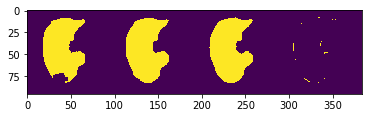

In [117]:
index = random.randint(0, len(result))
plt.imshow(np.concatenate([testxa_all[index, 64, :, :, 0], result[index, 64, :, :, 0], testya_all[index, 64, :, :, 0], abs(result[index, 64, :, :, 0]-testya_all[index, 64, :, :, 0])], axis=-1))

In [62]:
model1 = dense_3d_auto_with_skip_works_great_large()
model1.load_weights(basepath+lung_type+'LUNG_models/for-figure-with-skip-99.h5')

In [ ]:
tx = trainxa_all[1000:1100]
ty = trainya_all[1000:1100]

loss_without_skip = []

for epoch in range(1, 100):
    model.load_weights(basepath+lung_type+'LUNG_models/for-figure-without-skip-'+str(epoch).zfill(2)+'.h5')
    temp = model.evaluate(np.expand_dims(tx[i], axis=0), np.expand_dims(ty[i], axis=0), batch_size=16)
    loss_without_skip.append(temp)

In [ ]:
tx = trainxa_all[1000:1100]
ty = trainya_all[1000:1100]

loss_with_skip = []

for epoch in range(1, 100):
    model1.load_weights(basepath+lung_type+'LUNG_models/for-figure-with-skip-'+str(epoch).zfill(2)+'.h5')
    temp = model1.evaluate(np.expand_dims(tx[i], axis=0), np.expand_dims(ty[i], axis=0), batch_size=16)
    loss_with_skip.append(temp)

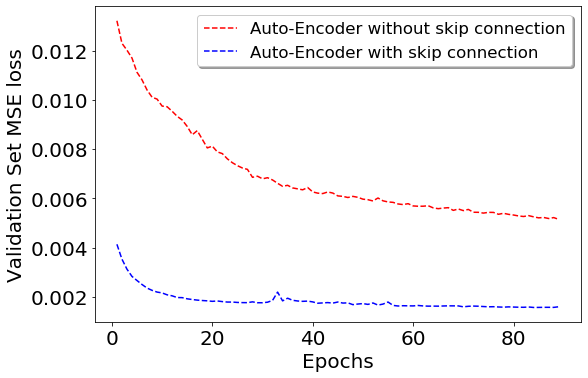

In [197]:
# FOr plotting and saving the matplotlib results

t = list(range(1, 90))

plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = [9,6]

fig, ax = plt.subplots()
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
#plt.tight_layout()

ax.plot(t, loss_without_skip[10:], 'r--', label='Auto-Encoder without skip connection') 
ax.plot(t, loss_with_skip[2:91], 'b--', label='Auto-Encoder with skip connection') 
plt.xlabel('Epochs')
plt.ylabel('Validation Set MSE')

legend = ax.legend(loc='top right', shadow=True, fontsize='small')

#plt.figure(figsize=(60, 20))
#fig1 = plt.gcf()
#plt.draw()
plt.savefig('loss_plot.png', dpi=300)
plt.show()
#

In [167]:
tx = trainxa_all[400:500]
ty = trainya_all[400:500]

# loss_skip = []
# for i in range(100):
#     load_weights(basepath+lung_type+'LUNG_models/for-figure-without-skip-'+'.h5')
#     print(model.evaluate(tx, ty, batch_size=16))

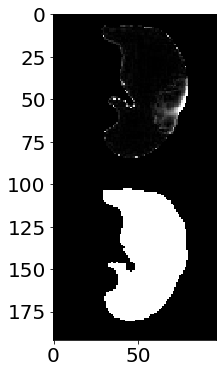

In [168]:
# [400:500]   53 75
# [1000:1100] 16 80

i    = 53
p    = model1.predict(np.expand_dims(tx[i], axis=0))
temp = np.expand_dims(ty[i], axis=0)

#print(p.shape)
index = 75
plt.imshow(np.concatenate([abs(p[0, index, :, :, 0] - temp[0, index, :, :, 0]), temp[0, index, :, :, 0]]), cmap='gray')

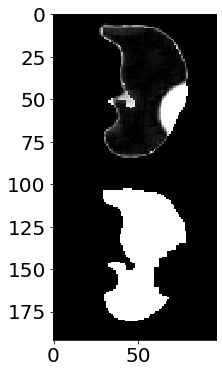

In [172]:
i    = 53
p    = model.predict(np.expand_dims(tx[i], axis=0))
temp = np.expand_dims(ty[i], axis=0)
temp1 = np.expand_dims(tx[i], axis=0)

#print(p.shape)
index = 75
plt.imshow(np.concatenate([abs(p[0, index, :, :, 0] - temp[0, index, :, :, 0]), temp1[0, index, :, :, 0]]), cmap='gray')
#temp1[0, index, :, :, 0]

In [ ]:
# [BLOCK 9] For training the Dilated CNN Model

import keras

model    = LN.get_model(4)
trainids = np.load('/media/dril/New Volume/LUNA/TRAIN.npy')
valids   = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')

for i in range(20):
    np.random.shuffle(trainids)
    for t in trainids[:5]:
        #print(t)
        x = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz'))+1024.0
        x = x/1024.0
        y = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')).astype('uint8')
        
        y[y == 3] = 2
        y[y == 4] = 1
        y[y == 5] = 3
        
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        
        y = keras.utils.to_categorical(y, num_classes=3, dtype='uint8')
        
        #print(x.shape, y.shape)
        model.fit(x, y, batch_size=1, verbose=True)
    
    print('Evaluating the Model')
    np.random.shuffle(valids)
    for t in valids[:5]:
        #print(t)
        x = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz'))+1024.0
        x = x/1024.0
        y = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')).astype('uint8')
        
        y[y == 3] = 2
        y[y == 4] = 1
        y[y == 5] = 0
        
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        
        y = keras.utils.to_categorical(y, num_classes=3, dtype='uint8')
        
        #print(x.shape, y.shape)        
        print(model.evaluate(x, y, batch_size=1))
        
    model.save('/media/dril/New Volume/LUNA/models/dilated-cnn-4-class.h5')

In [ ]:
# For making 3 class to 4 class U-Net

model    = load_model('/media/dril/New Volume/LUNA/models/unet-cnn.h5')
#model.layers.pop()
base_model_layers = model.layers[-2].output
pred = Dense(4, activation='softmax')(base_model_layers)
model = Model(inputs=model.input, outputs=pred)
model.compile(optimizer = Adam(lr = 2e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

In [ ]:
# [BLOCK 9] For training the U-Net CNN Model

import keras

# model    = load_model('/media/dril/New Volume/LUNA/models/unet-cnn.h5')
# model.pop()
# base_model_layers = model.output
# pred = Dense(4, activation='softmax')(base_model_layers)
# model = Model(inputs=model.input, outputs=pred)


trainids = np.load('/media/dril/New Volume/LUNA/TRAIN.npy')
valids   = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')

for i in range(10000):
    np.random.shuffle(trainids)
    for t in trainids[:5]:
        #print(t)
        x            = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz'))+1024.0
        x[x > 2000]  = 2000
        x[x < -2000] = -2000
        x = x/1024.0
        
        y = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')).astype('uint8')
        
        y[y == 3] = 2
        y[y == 4] = 1
        y[y == 5] = 3
        
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        
        y = keras.utils.to_categorical(y, num_classes=4, dtype='uint8')
        
        #print(x.shape, y.shape)
        model.fit(x, y, batch_size=4, verbose=True)
    
    print('Evaluating the Model')
    np.random.shuffle(valids)
    for t in valids[:5]:
        #print(t)
        x = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz'))+1024.0
        x[x > 2000]  = 2000
        x[x < -2000] = -2000
        x = x/1024.0
        y = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')).astype('uint8')
        
        y[y == 3] = 2
        y[y == 4] = 1
        y[y == 5] = 3
        
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        
        y = keras.utils.to_categorical(y, num_classes=4, dtype='uint8')
        
        #print(x.shape, y.shape)        
        print(t, model.evaluate(x, y, batch_size=16))
        
    model.save('/media/dril/New Volume/LUNA/models/unet-cnn-4-class.h5')

In [ ]:
# For predicting using the Dilated CNN model

testids = np.load('/media/dril/New Volume/LUNA/NSCLC-NEW.npy')
# model   = load_model('/media/dril/New Volume/LUNA/models/dilated-cnn.h5', compile=False)
# m1 =  LN.get_model(3)
# m1.load_weights('/media/dril/New Volume/LUNA/models/dilated-cnn.h5')

for t in testids:
    a1 = sitk.ReadImage('/media/dril/New Volume/LUNA/NSCLC-FINAL/NSCLC-DATA/'+t+'.mhd')
    x = sitk.GetArrayFromImage(a1)+1024.0
    x = x/1024.0
    x = np.expand_dims(x, axis=-1)
    
    y = model.predict(x, batch_size=1)
    y = np.argmax(y, axis=-1)
    
    print(t, y.shape)
    
    result = sitk.GetImageFromArray(y.astype('uint8'))
    result.SetDirection(a1.GetDirection())
    result.SetSpacing(a1.GetSpacing())
    result.SetOrigin(a1.GetOrigin())
    
    sitk.WriteImage(result, '/media/dril/New Volume/LUNA/NSCLC-FINAL/NSCLC-SEG-DILATED/'+t+'.nii.gz')

In [ ]:
# For getting the result for LOLA submission

from skimage.morphology import label

def getLargestCC(segmentation, lung_type='l'):
    labels    = label(segmentation)
    temp      = np.bincount(labels.flat)
    temp[0]   = 0
    largestCC = labels == np.argmax(temp)
    largestCC[largestCC != 0]  = 1
    return largestCC.astype('uint8')

testids = np.load('/media/dril/New Volume/LUNA/LOLA.npy')

for t in testids:
    print(t)
    a1     = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd')
    result = sitk.GetArrayFromImage(a1)
    
#     a1     = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz')
#     vol    = sitk.GetArrayFromImage(a1)+1024
    
#     a2            = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET/'+t+'.mhd')
#     vnet_image    = sitk.GetArrayFromImage(a2)
    
#     result0[vnet_image == 3] = 3
    
#     mask1 = flood1(result0, vol)
#     mask1 = np.flip(mask1, axis=2)
#     vol   = np.flip(vol, axis=2)

#     mask1 = flood1(mask1, vol)
#     mask1 = np.flip(mask1, axis=2)
#     vol   = np.flip(vol, axis=2)

#     mask2 = flood3(mask1, vol)
#     mask2 = np.flip(mask2, axis=1)
#     vol   = np.flip(vol, axis=1)

#     mask2 = flood3(mask2, vol)
#     mask2 = np.flip(mask2, axis=1)
#     vol   = np.flip(vol, axis=1)

#     mask3 = flood5(mask2, vol)
#     mask3 = np.flip(mask3, axis=0)
#     vol   = np.flip(vol, axis=0)

#     mask3 = flood5(mask3, vol)
#     result = np.flip(mask3, axis=0)
    
    #result = flood_fill(result0, vol)
    
    result[result == 3] = 0
    result[result == 1] = 5
    result[result == 2] = 1
    result[result == 5] = 2
#     result1 = copy.deepcopy(result)
#     result2 = copy.deepcopy(result)
    
#     result1[result1 != 1 ] = 0
#     result2[result2 != 2 ] = 0
    
#     result1 = getLargestCC(result1)
#     result2 = getLargestCC(result2)
        
#     result1[result1 != 0 ] = 2
#     result2[result2 != 0 ] = 1
#     result                 = result1+result2
#     result[result == 3]    = 2
    
    result = sitk.GetImageFromArray(result)
    result.SetDirection(a1.GetDirection())
    result.SetSpacing(a1.GetSpacing())
    result.SetOrigin(a1.GetOrigin())
    sitk.WriteImage(result, '/media/dril/New Volume/LUNA/LOLA-SUBMIT-RESULTS/VNET-AUTO-NEAREST/'+t+'.mhd', True)

In [ ]:
# [BLOCK 9] For training the SegNet CNN Model

from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization

from layers import MaxPoolingWithArgmax2D, MaxUnpooling2D



model = segnet((512, 512, 1), 4)
model.compile(optimizer = Adam(lr = 0.0001), loss = ['categorical_crossentropy'], metrics=['accuracy'])
model.load_weights('/media/dril/New Volume/LUNA/models/segnet.h5')

import keras

# model    = load_model('/media/dril/New Volume/LUNA/models/unet-cnn.h5')
# model.pop()
# base_model_layers = model.output
# pred = Dense(4, activation='softmax')(base_model_layers)
# model = Model(inputs=model.input, outputs=pred)


trainids = np.load('/media/dril/New Volume/LUNA/TRAIN.npy')
valids   = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')

for i in range(10000):
    np.random.shuffle(trainids)
    for t in trainids[:5]:
        #print(t)
        x            = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz'))+1024.0
        x[x > 2000]  = 2000
        x[x < -2000] = -2000
        x = x/1024.0
        
        y = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')).astype('uint8')
        
        y[y == 3] = 2
        y[y == 4] = 1
        y[y == 5] = 3
        
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        
        y = keras.utils.to_categorical(y, num_classes=4, dtype='uint8')
        
        #print(x.shape, y.shape)
        model.fit(x, np.reshape(y, [len(y), 512*512, 4]), batch_size=4, verbose=True)
    
    print('Evaluating the Model')
    np.random.shuffle(valids)
    for t in valids[:5]:
        #print(t)
        x = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz'))+1024.0
        x[x > 2000]  = 2000
        x[x < -2000] = -2000
        x = x/1024.0
        y = sitk.GetArrayFromImage(sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')).astype('uint8')
        
        y[y == 3] = 2
        y[y == 4] = 1
        y[y == 5] = 3
        
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        
        y = keras.utils.to_categorical(y, num_classes=4, dtype='uint8')
        
        #print(x.shape, y.shape)        
        print(t, model.evaluate(x, np.reshape(y, [len(y), 512*512, 4]), batch_size=16))
        
    model.save('/media/dril/New Volume/LUNA/models/segnet-more.h5')

In [ ]:
# For predicting using the UNet, SegNet CNN model

from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization

from layers import MaxPoolingWithArgmax2D, MaxUnpooling2D

testids = np.load('/media/dril/New Volume/LUNA/LOLA.npy')

#model = LN.get_model(4)
#model.load_weights('/media/dril/New Volume/LUNA/models/dilated-cnn-cewit-4-class.h5')

#model   = load_model('/media/dril/New Volume/LUNA/models/unet-cnn-4-class.h5', compile=False)

model   = segnet((512, 512, 1), 4)
model.load_weights('/media/dril/New Volume/LUNA/models/segnet-more.h5')

for t in testids:
    a1 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz')
    x = sitk.GetArrayFromImage(a1)+1024.0
    x[x > 2000]  = 2000
    x[x < -2000] = -2000
    x = x/1024.0
    x = np.expand_dims(x, axis=-1)
    
    y = model.predict(x, batch_size=4)
    y = np.argmax(y, axis=-1)
    y = np.reshape(y, [len(y), 512, 512])
    print(t, y.shape)
    
    result = sitk.GetImageFromArray(y.astype('uint8'))
    result.SetDirection(a1.GetDirection())
    result.SetSpacing(a1.GetSpacing())
    result.SetOrigin(a1.GetOrigin())
    
    sitk.WriteImage(result, '/media/dril/New Volume/LUNA/ORIG-SEG-SEGNET/'+t+'.nii.gz')

In [ ]:
# Script to do the segmentation using P-HNN model
# Run it in the python console

import os
import subprocess
import glob
import numpy as np

allfiles = glob.glob('/media/dril/New Volume/LUNA/ORIG-NII/*.nii.gz')
testids =  np.load('/media/dril/New Volume/LUNA/LOLA.npy')


for p in allfiles:
    if p.split('/')[-1][:-7] not in testids:
        continue
    print(p)
    cmd_line = "python2.7 segment_lung.py --caffe_root /home/dril/Downloads/caffe-rc5/ --file_in '"+ p +"' --file_out '"+ p.replace('ORIG-NII', 'ORIG-SEG-PHNN') +"' --batch_size=4" 
    os.system(cmd_line)

In [ ]:
# Code to obtain the registration candidates

counter  = 0
lung_type = 'L'
for t in trainids:
    f     = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/'+t+'_'+lung_type.lower()+'maskground.mhd'
    temp  = sitk.GetArrayFromImage(sitk.ReadImage(f))
    temp[temp != 2] = 0
    temp[temp != 0] = 1
    
    l_com = ndimage.measurements.center_of_mass(temp, temp, [1])[0]
    #print(t, l_com)
    if l_com[0] < 41 and l_com[0] > 40 and l_com[2] < 33:# and l_com[1] < 33 and l_com[1] > 31:
        print(t, l_com)

In [ ]:
# For plotting figures

#result = model.predict(testxa_all, batch_size=16)
#result[result < 0.5] = 0
#result[result >= 0.5] = 1

#print(trainxa_all.shape, trainya_all.shape)
index      = random.randint(0, len(testxa_all)-1)
sliceindex = 64#random.randint(20, 60)
print(index, sliceindex)

plt.imshow(np.concatenate([testxa_all[index, sliceindex, :, :, 0].astype('float'), 
                           result[index, sliceindex, :, :, 0].astype('float'), 
                           testya_all[index, sliceindex, :, :, 0].astype('float')], axis=-1), cmap='gray')

# plt.imshow(np.concatenate([testxa_all[index, :, :, sliceindex,  0].astype('float'), 
#                            result[index, :, :, sliceindex,   0].astype('float'), 
#                            testya_all[index, :, :, sliceindex,   0].astype('float')], axis=-1), cmap='gray')


# index = random.randint(0, len(error))
# print(error[index])
# index = error[index][0]
# print(index)
# #slice_index =  
# #plt.imshow(np.concatenate([trainxa_all[index, 40, :, :, 0], trainya_all[index, 40, :, :, 0], result[index, 40, :, :, 0], abs(trainya_all[index, 40, :, :, 0] - result[index, 40, :, :, 0])], axis=-1), cmap='gray')
# slice_index = 40
# print(np.mean(np.abs(trainya_all[index, slice_index, :, :, 0]-result[index, slice_index, :, :, 0])))
# plt.imshow(np.concatenate([testxa_all[index, 40, :, :, 0], testya_all[index, 40, :, :, 0], result[index, 40, :, :, 0], abs(testya_all[index, 40, :, :, 0] - result[index, 40, :, :, 0])], axis=-1), cmap='gray')

In [ ]:
# [BLOCK 10] For training post processing 2D CNN with Augmentation

import keras
from keras.preprocessing.image import ImageDataGenerator


train_x = np.load(r'D:\FINAL-MODELS\LLUNG_models\trainx-new.npy')
train_y = np.load(r'D:\FINAL-MODELS\LLUNG_models\trainy-new.npy')

#train_y = keras.utils.to_categorical(train_y, num_classes=2, dtype='uint8')

print(train_x.shape, train_y.shape)
checkpoints = ModelCheckpoint(r'D:\FINAL-MODELS\LLUNG_models\2d_model-cross-32-all-8.h5', monitor='val_mean_squared_error', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)

val_datagen = ImageDataGenerator(height_shift_range=[-20, 20], 
                                 width_shift_range=[-20, 20],
                                 shear_range=0.2,
                                 zoom_range=[0.8, 1.2], 
                                 fill_mode='nearest')
datagen     = ImageDataGenerator(height_shift_range=[-20, 20], 
                                 width_shift_range=[-20, 20],
                                 shear_range=0.2,
                                 zoom_range=[0.8, 1.2], 
                                 fill_mode='nearest')


startlr = 0.0001
model   = unet_2d_cross_all(newlr = startlr)

model.fit_generator(datagen.flow(train_x[:1300], train_y[:1300], batch_size=8), 
                    validation_data=val_datagen.flow(train_x[1300:], train_y[1300:], batch_size=8), 
                    steps_per_epoch=125, epochs=500,  validation_steps=40, callbacks=[checkpoints])

In [ ]:
# For creating dataset for cross post-processing

allfiles  = glob.glob(r'G:\LUNG-UPSAMPLED\LLUNG_shape_auto_flood_500_open\*')

slices_x  = []
slices_y  = []


train_ids    = np.load('D:\\NEWMODELDATA\\TRAIN.npy')
save_counter = 2
count_total  = 0

flag = True

for f in allfiles:
    t = f.split('\\')[-1]
    
    if t == '1.3.6.1.4.1.14519.5.2.1.6279.6001.141430002307216644912805017227':
        flag = False
    
    if flag :
        continue
    
    if not t in train_ids:
        continue
    
    p  = 'F:\\LunaGTLungMask\\'+t+'\\'+t+'.mhd'
    fp = 'G:\\LUNG-UPSAMPLED\\LLUNG_shape_auto_flood_500_open\\'+t+'\\'+t+'.mhd'
    
    a0       = sitk.ReadImage(fp)
    imga     = sitk.GetArrayFromImage(a0).astype('int')
    imga[imga != 0] = 1
    
    a2       = sitk.ReadImage(p)
    imgc     = sitk.GetArrayFromImage(a2).astype('int')
    imgc[imgc == 3] = 0
    imgc[imgc != 0] = 1
    
    if len(imga) == len(imgc):
        imgd = np.multiply(imga, imgc)
        #print(imga.shape, imgc.shape, imgd.shape)
        
        all_index = []
        for k in range(len(imgc)):
            count = np.count_nonzero(imgd[k, :, :].flatten())
            if count*100.0/(512*512) > 0.5:
                all_index.append(k)
            elif count == 0:
                temp2 = np.random.randint(0, 10000)
                if temp2 < 100:
                    all_index.append(k)
                
        for k in all_index:
            if np.random.randint(0, len(all_index)) < 0.05*len(all_index):
                slices_y.append(imgd[k])
                slices_x.append(imga[k])
    
    if len(slices_x) > 100:
        sx = np.array(slices_x).astype('uint8')
        print(sx.shape)
        sy = np.array(slices_y).astype('uint8')
        print(sy.shape)
        save_counter = save_counter+1
        
        np.save(r'F:\Luna-Cross-Post\trainx-new'+str(save_counter)+'.npy', sx)
        np.save(r'F:\Luna-Cross-Post\trainy-new'+str(save_counter)+'.npy', sy)
        slices_x = []
        slices_y = []
    
    count_total = count_total+1
    print(count_total, t, len(slices_x))

In [ ]:
# [BLOCK 11] For getting the results after Final Cross Post-processing


from skimage.morphology import label

def getLargestCC(segmentation, lung_type='l'):
    labels    = label(segmentation)
    temp      = np.bincount(labels.flat)
    temp[0]   = 0
    largestCC = labels == np.argmax(temp)
    largestCC[largestCC != 0]  = 1
    return largestCC.astype('uint8')

model = load_model(r'D:\FINAL-MODELS\LLUNG_models\2d_model-cross-32-all-3.h5')

validation = np.load(r'D:\NEWMODELDATA\VALIDATION.npy')
muenster   = np.load(r'D:\NEWMODELDATA\MUENSTER.npy')
commo      = np.load(r'D:\NEWMODELDATA\COMMO.npy')

#['1.2.840.113654.2.70.1.111046990065478285668127965433871195658']
allcases  = glob.glob('I:\\ALL-RESCALED\\lola*')#np.concatenate([n1, n2, n3, n4])
allcases = [x.split('\\')[-1] for x in allcases]#np.concatenate([muenster, validation, commo])

for name in allcases:
    llung      = sitk.ReadImage('I:\\LUNG-UPSAMPLED\\LLUNG_shape_auto_flood_600_open-shape6-temp\\'+name+'\\'+name+'.mhd')
    llungimage = llung
    llung      = sitk.GetArrayFromImage(llung)
    llung[llung != 0] = 1
    
    
    rlung     = sitk.ReadImage('I:\\LUNG-UPSAMPLED\\RLUNG_shape_auto_flood_600_open-shape6-temp\\'+name+'\\'+name+'.mhd')
    rlung     = sitk.GetArrayFromImage(rlung)
    rlung[rlung != 0] = 1
    
    print(name, rlung.shape, llung.shape)
    
    # Get the Flood region
    llung_flood = model.predict(np.expand_dims(llung, axis=-1), batch_size=8)
    llung_flood = llung_flood[:, :, :, 0]
    llung_flood[llung_flood < 0.5] = 0
    llung_flood[llung_flood != 0]  = 1
    #llung_flood = np.argmax(llung_flood, axis=-1)
    llung_flood = 1 - llung_flood
    
    # Remove the Flood region
    llung         = np.multiply(llung, llung_flood)
    llung         = getLargestCC(llung)
    
    # Get remaining Right Lung
    rlung         = np.multiply(rlung, 1-llung)
    rlung         = getLargestCC(rlung) 
    
    print(name, rlung.shape)
    
    #print(np.unique(llung.flatten()))
    #print(np.unique(rlung.flatten()))
    
    llung[llung != 0 ] = 8
    rlung[rlung != 0 ] = 4
    
    total = llung+rlung
    
    imgb     = sitk.GetImageFromArray(total.astype('uint8'))
    imgb.SetDirection(llungimage.GetDirection())
    imgb.SetSpacing(llungimage.GetSpacing())
    imgb.SetOrigin(llungimage.GetOrigin())
    
    sitk.WriteImage(imgb, 'I:\\FINAL-RESULT-6-temp1\\'+name+'.mhd')

In [24]:
#test_files    = np.load('/media/dril/New Volume/LUNA/TEST.npy')
#print(len(test_files))
519+86+171

776

In [6]:
# For training the V-net model

import keras

train_files    = np.load('/media/dril/New Volume/LUNA/TRAIN.npy')
validate_files = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')

val_x = np.zeros([len(validate_files), 128, 128, 128, 1], dtype=np.float16)
val_y = np.zeros([len(validate_files), 128, 128, 128, 4], dtype=np.uint8)
count = 0

for i in validate_files:
    index  = i
    tempx  = sitk.ReadImage('/media/dril/New Volume/LUNA/DOWN/'+index+'.mhd')
    tempx  = sitk.GetArrayFromImage(tempx).astype('float16')+1024
    tempx[tempx > 2000]  = 2000
    tempx[tempx < -2000] = -2000
    tempx = tempx/1024.0
    
    tempy  = sitk.ReadImage('/media/dril/New Volume/LUNA/DOWN-SEG-GROUND-LINEAR/'+index+'.mhd')
    tempy  = sitk.GetArrayFromImage(tempy).astype('uint8')
    #print(np.unique(tempy.flatten()))
    
    t = np.moveaxis(tempx, 0, -1)
    val_x[count, :, :, :, 0] = t
    
    t = np.moveaxis(tempy, 0, -1)
    val_y[count, :, :, :, :] = keras.utils.to_categorical(np.expand_dims(t, axis=-1), num_classes=4, dtype='uint8')
    count = count+1
print(val_x.shape, val_y.shape)


train_x = np.zeros([len(train_files), 128, 128, 128, 1], dtype=np.float16)
train_y = np.zeros([len(train_files), 128, 128, 128, 4], dtype=np.uint8)
count   = 0

for i in train_files:
    index  = i
    
    tempx  = sitk.ReadImage('/media/dril/New Volume/LUNA/DOWN/'+index+'.mhd')
    tempx  = sitk.GetArrayFromImage(tempx).astype('float16')+1024
    tempx[tempx > 2000]  = 2000
    tempx[tempx < -2000] = -2000
    tempx = tempx/1024.0
    
    tempy  = sitk.ReadImage('/media/dril/New Volume/LUNA/DOWN-SEG-GROUND-LINEAR/'+index+'.mhd')
    tempy  = sitk.GetArrayFromImage(tempy).astype('uint8')
    
    t = np.moveaxis(tempx, 0, -1)
    train_x[count, :, :, :, 0] = t
    
    t = np.moveaxis(tempy, 0, -1)
    train_y[count, :, :, :, :] = keras.utils.to_categorical(np.expand_dims(t, axis=-1), num_classes=4, dtype='uint8')
    count = count+1
print(train_x.shape, train_y.shape)




(85, 128, 128, 128, 1) (85, 128, 128, 128, 4)
(518, 128, 128, 128, 1) (518, 128, 128, 128, 4)


In [ ]:
model           = vnet(input_size = (128, 128, 128,1), num_class=4, is_training=True, stage_num=4)
filename_tosave = '/media/dril/New Volume/LUNA/models/3d_vnet-linear-dice.h5'
#filename_toload = '/media/dril/New Volume/LUNA/models/3d_vnet-linear-dice.h5'
#model.load_weights(filename_toload)

checkpoints     = ModelCheckpoint(filename_tosave, monitor='val_dice_coefficient', verbose=1, 
                                              save_best_only=True, 
                                              save_weights_only=False, 
                                              mode='max', period=1)

model.fit(train_x, train_y, validation_data=(val_x, val_y), 
          batch_size=2, epochs=40, callbacks=[checkpoints])

In [ ]:
checkpoints     = ModelCheckpoint(filename_tosave, monitor='val_dice_coefficient', verbose=1, 
                                              save_best_only=True, 
                                              save_weights_only=False, 
                                              mode='max', period=1)

model.fit(train_x, train_y, validation_data=(val_x, val_y), 
          batch_size=2, epochs=40, callbacks=[checkpoints])

In [ ]:
# For predicting using the V-Net

#model = load_model('/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/3d_vnet-vanilla-new.h5', 
#                 custom_objects={'dice': dice, 'dice_coefficient':dice_coefficient})

allfiles  = glob.glob('/media/dril/ubuntudata/NSCLC-FINAL/NSCLC-OLD/*.mhd')

slices_x  = []
slices_y  = []

def resample_image(itk_image, out_spacing=(1.0, 1.0, 1.5), is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size    = itk_image.GetSize()

    #print(original_size[0], original_spacing[0], out_spacing[0], 128, original_size[0]*(original_spacing[0]))
    
    out_size = [int(np.round(original_size[0]*(original_spacing[0]/out_spacing[0]))),
                int(np.round(original_size[1]*(original_spacing[1]/out_spacing[1]))),
                int(np.round(original_size[2]*(original_spacing[2]/out_spacing[2])))]
    #print(out_size)
    out_size = [128, 128, 64]
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkLinear)

    return resample.Execute(itk_image) 

def resample_image1(itk_image, in_spacing, out_spacing, out_size, is_label=False):
    original_spacing = in_spacing#itk_image.GetSpacing()
    original_size    = [128, 128, 64]#itk_image.GetSize()

    #print(original_size[0], original_spacing[0], out_spacing[0], 128, original_size[0]*(original_spacing[0]))
    
    #out_size = [int(np.round(original_size[0]*(original_spacing[0]/out_spacing[0]))),
    #            int(np.round(original_size[1]*(original_spacing[1]/out_spacing[1]))),
    #            int(np.round(original_size[2]*(original_spacing[2]/out_spacing[2])))]
    #print(out_size)
    #out_size = [128, 128, 64]
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    #print('default is ', itk_image.GetPixelIDValue())
    resample.SetDefaultPixelValue(0)

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkLinear)

    return resample.Execute(itk_image) 

for f in allfiles:
    t  = f.split('/')[-1].split('.')[0]
    #fp = f+'/'+t+'.mhd'
    
    #print(fp)
    
    # Input CT Image
    a0          = sitk.ReadImage(f)
    a1          = a0
    sx, sy, sz  = a0.GetSpacing()
    px, py, pz  = a0.GetSize()
    
    out_spacing = (px*sx/128, py*sy/128, pz*sz/64)
    
    a0       = resample_image(a0, out_spacing)
    imga     = sitk.GetArrayFromImage(a0).astype('float16')+1024
    imgb     = imga
    #print()
    
    imga     = np.moveaxis(imga, 0, -1)
    #print(a1.GetSize(), imgb.shape, imga.shape, sx, sy, sz, out_spacing)
    #break
    imga     = np.expand_dims(imga, axis=-1)
    imga     = np.expand_dims(imga, axis=0)
    
    result   = model.predict(imga)
    result   = np.argmax(result, axis=-1)
    result   = result[0] 
    result   = np.moveaxis(result, 2, 0)
    
    
    #print(result.shape, imgb.shape)
    
#     result1 = zoom(result, (out_spacing[2]/sz, out_spacing[0]/sx, out_spacing[1]/sy), order=0, mode='nearest')
    
#     result1     = sitk.GetImageFromArray(result1.astype('uint8'))
#     result1.SetDirection(a1.GetDirection())
#     result1.SetSpacing(a1.GetSpacing())
#     result1.SetOrigin(a1.GetOrigin())

    #out_spacing = np.array([float(sx), float(sy), float(sz)], dtype='float16')#np.array([sx, sy, sz], dtype='double')
    out_size    = np.array([px, py, pz], dtype='uint')
    
    #result[result > 0.5] = 1
    #result[result < 0.5] = 0
    #result[result == 1] = 3
    #result[result == 2] = 1
    #result[result == 3] = 2
    
    result     = sitk.GetImageFromArray(result.astype('uint8'))
    result.SetDirection(a0.GetDirection())
    result.SetSpacing(a0.GetSpacing())
    result.SetOrigin(a0.GetOrigin())
    
    result1     = resample_image1(result, in_spacing=a0.GetSpacing(), out_spacing=[sx, sy, sz], out_size=[px, py, pz], is_label=True)
    
    print(t, a1.GetSize(), result1.GetSize())
    sitk.WriteImage(result1, '/media/dril/ubuntudata/NSCLC-FINAL/VNET-NSCLC-NEW/'+t+'.mhd', True)

In [46]:
auto_model_l = load_model('/media/dril/Windows/FINAL-MODELS/LLUNG_models/skip-auto11-large.h5', compile=False)
print(auto_model_l.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 128, 96, 96,  0                                            
__________________________________________________________________________________________________
conv3d_43 (Conv3D)              (None, 128, 96, 96,  224         input_7[0][0]                    
__________________________________________________________________________________________________
re_lu_37 (ReLU)                 (None, 128, 96, 96,  0           conv3d_43[0][0]                  
__________________________________________________________________________________________________
max_pooling3d_19 (MaxPooling3D) (None, 64, 48, 48, 8 0           re_lu_37[0][0]                   
__________________________________________________________________________________________________
conv3d_44 

In [ ]:
# For predicting using V-Net and Auto-encoder
from skimage.measure import label

basepath = '/media/dril/Windows/FINAL-MODELS/'

def resample_image_for_auto(itk_image, out_spacing=(1.0, 1.0, 1.5), is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size    = itk_image.GetSize()

    #print(original_size[0], original_spacing[0], out_spacing[0], 128, original_size[0]*(original_spacing[0]))
    
    out_size = [int(np.round(original_size[0]*(original_spacing[0]/out_spacing[0]))),
                int(np.round(original_size[1]*(original_spacing[1]/out_spacing[1]))),
                int(np.round(original_size[2]*(original_spacing[2]/out_spacing[2])))]
    #print(out_size)
    #out_size = [128, 128, 64]
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkLinear)

    return resample.Execute(itk_image)

def resample_image_after_auto(itk_image, reference_image, is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size    = itk_image.GetSize()
    
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(reference_image.GetSpacing())
    resample.SetSize(reference_image.GetSize())
    resample.SetOutputDirection(reference_image.GetDirection())
    resample.SetOutputOrigin(reference_image.GetOrigin())
    
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(0)

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        resample.SetInterpolator(sitk.sitkLinear)

    return resample.Execute(itk_image)

def get_inverse_transform_result(fixed_l, fixed_r, im1_l, im1_r, outTx_l, outTx_r):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed_l);
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    resampler.SetTransform(outTx_l.GetInverse())
    
    out     = resampler.Execute(sitk.GetImageFromArray(im1_l))
    l_mask  = sitk.GetArrayFromImage(out)
    
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed_r);
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    resampler.SetTransform(outTx_r.GetInverse())
    
    out     = resampler.Execute(sitk.GetImageFromArray(im1_r))
    r_mask  = sitk.GetArrayFromImage(out)
    
    return l_mask, r_mask

def resample_image(itk_image, out_spacing=(1.0, 1.0, 1.5), is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size    = itk_image.GetSize()

    #print(original_size[0], original_spacing[0], out_spacing[0], 128, original_size[0]*(original_spacing[0]))
    
    out_size = [int(np.round(original_size[0]*(original_spacing[0]/out_spacing[0]))),
                int(np.round(original_size[1]*(original_spacing[1]/out_spacing[1]))),
                int(np.round(original_size[2]*(original_spacing[2]/out_spacing[2])))]
    #print(out_size)
    out_size = [128, 128, 128]
    resample = sitk.ResampleImageFilter()
    resample.SetNumberOfThreads(48)
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        #resample.SetInterpolator(sitk.sitkBSpline)
        resample.SetInterpolator(sitk.sitkLinear)

    return resample.Execute(itk_image) 

def getLargestCC(segmentation, lung_type='l'):
    labels    = label(segmentation)
    temp      = np.bincount(labels.flat)
    temp[0]   = 0
    largestCC = labels == np.argmax(temp)
    largestCC[largestCC != 0]  = 1
    return largestCC.astype('uint8')

#vnet_model   = load_model('/media/dril/New Volume/LUNA/models/3d_vnet-3.h5',                   compile=False)
vnet_model   = vnet(input_size = (128, 128, 128,1), num_class=4, is_training=True, stage_num=4)
#vnet_model.load_weights('/media/dril/New Volume/LUNA/models/3d_vnet-linear-dice.h5')
vnet_model.load_weights('/media/dril/New Volume/LUNA/models/3d_vnet-3-cewit-more.h5')
#vnet_model.load_weights('/media/dril/New Volume/LUNA/models/3d_vnet-linear-more.h5')

#auto_model_l = load_model('/media/dril/Windows/FINAL-MODELS/LLUNG_models/skip-auto-large-same1.h5', compile=False)
#auto_model_r = load_model('/media/dril/Windows/FINAL-MODELS/RLUNG_models/skip-auto-large-same1.h5', compile=False)

auto_model_l = load_model('/media/dril/Windows/FINAL-MODELS/LLUNG_models/skip-auto11-large.h5', compile=False)
auto_model_r = load_model('/media/dril/Windows/FINAL-MODELS/RLUNG_models/skip-auto11-large.h5', compile=False)


trainids   = np.load('/media/dril/New Volume/LUNA/TEST.npy')
#trainids2   = np.load('/media/dril/New Volume/LUNA/VALIDATION.npy')
#trainids    = np.concatenate([trainids1, trainids2], axis=-1)
#trainids   = np.load('/media/dril/New Volume/LUNA/LOLA.npy')

# Get the fixed images
f       = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/1.3.6.1.4.1.14519.5.2.1.6279.6001.803808126682275425758092691689_lmask.mhd'
fixed_l = sitk.ReadImage(f)
fixed_l = sitk.GetArrayFromImage(fixed_l)

f       = '/media/dril/New Volume/LUNA/DOWN-SEG-VNET/1.3.6.1.4.1.14519.5.2.1.6279.6001.803808126682275425758092691689_rmask.mhd'
fixed_r = sitk.ReadImage(f)
fixed_r = sitk.GetArrayFromImage(fixed_r)

fixed_l[fixed_l != 2] = 0
fixed_l[fixed_l != 0] = 1
fixed_r[fixed_r != 1] = 0
fixed_r[fixed_r != 0] = 1

fixed_l = sitk.GetImageFromArray(fixed_l)
fixed_r = sitk.GetImageFromArray(fixed_r)

counter  = 0
flag     = True

for t in trainids: 
    #if t != 'lola11-45':
    #    continue
    
    #fp       = '/media/dril/New Volume/LUNA/DOWN/'+t+'.mhd'
    fp       = '/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz'   
    a0       = sitk.ReadImage(fp)
    orig_image = a0
    vol        = sitk.GetArrayFromImage(a0)+1024
    
    sx, sy, sz  = a0.GetSpacing()
    px, py, pz  = a0.GetSize()
    
    out_spacing = (px*sx/128, py*sy/128, pz*sz/128)
    a0          = resample_image(a0, out_spacing)
    
    a0_array = sitk.GetArrayFromImage(a0).astype('float16')+1024.0
    a0_array[a0_array > 2000]  = 2000
    a0_array[a0_array < -2000] = -2000
    a0_array = a0_array/1024.0
    
    a0_array = np.moveaxis(a0_array, 0, -1)
    a0_array = np.expand_dims(a0_array, axis=0)
    a0_array = np.expand_dims(a0_array, axis=-1)

    a0_result = vnet_model.predict(a0_array)[0]
    a0_result = np.argmax(a0_result, axis=-1)
    a0_result = np.moveaxis(a0_result, 2, 0).astype('uint8')
    vnet_image = a0_result
    
    # Remove small patches
    labels    = label(vnet_image)
    temp      = np.bincount(labels.flat)
    temp[0]   = 0
    
#     # For clearing small labelled components
#     for k in range(len(temp)):
#         if temp[k] < 1000:
#             #print('makeing ', k,' zeros')
#             labels[labels == k] = 0
#     labels[labels != 0] = 1
#     vnet_image = np.multiply(vnet_image, labels)
    a0_result  = vnet_image
    
    l_com = ndimage.measurements.center_of_mass(a0_result, a0_result, [1])[0]
    r_com = ndimage.measurements.center_of_mass(a0_result, a0_result, [2])[0]
    
    #l_com = [int(np.nan_to_num(x)) for x in l_com]
    #r_com = [int(np.nan_to_num(x)) for x in r_com]
    l_com = [int(x) for x in l_com]
    r_com = [int(x) for x in r_com]
    
    buffer = 96
    rmin1  = max(r_com[2]-48, 0)
    cmin1  = max(l_com[2]-48, 0)

    bmin1 = max(l_com[1]-48, 0)
    amin1 = max(l_com[0]-64, 0)
    
    l_mask        = copy.deepcopy(a0_result[amin1:amin1+128, bmin1:bmin1+96, rmin1:rmin1+96])
    r_mask        = copy.deepcopy(a0_result[amin1:amin1+128, bmin1:bmin1+96, cmin1:cmin1+96])
    
    l_mask[l_mask != 2] = 0
    l_mask[l_mask != 0] = 1
    r_mask[r_mask != 1] = 0
    
    px1_l           = int((128-l_mask.shape[0])/2)
    py1_l           = (128-l_mask.shape[0])-px1_l
    px2_l           = int((96-l_mask.shape[1])/2)
    py2_l           = (96-l_mask.shape[1])-px2_l
    px3_l           = int((96-l_mask.shape[2])/2)
    py3_l           = (96-l_mask.shape[2])-px3_l
    l_mask          = np.pad(l_mask,         ((px1_l, py1_l), (px2_l, py2_l), (px3_l, py3_l)), 'constant', constant_values=(0, 0))
    
    px1_r           = int((128-r_mask.shape[0])/2)
    py1_r           = (128-r_mask.shape[0])-px1_r
    px2_r           = int((96-r_mask.shape[1])/2)
    py2_r           = (96-r_mask.shape[1])-px2_r
    px3_r           = int((96-r_mask.shape[2])/2)
    py3_r           = (96-r_mask.shape[2])-px3_r
    r_mask          = np.pad(r_mask,         ((px1_r, py1_r), (px2_r, py2_r), (px3_r, py3_r)), 'constant', constant_values=(0, 0))
        
    l_mask = np.expand_dims(l_mask, 0)
    l_mask = np.expand_dims(l_mask, -1)
    r_mask = np.expand_dims(r_mask, 0)
    r_mask = np.expand_dims(r_mask, -1)
    
    im1_l = auto_model_l.predict(l_mask)[0, :, :, :, 0]
    im1_r = auto_model_r.predict(r_mask)[0, :, :, :, 0]
    
    im1_l[im1_l < 0.5]  = 0
    im1_l[im1_l >= 0.5] = 1
    
    im1_r[im1_r < 0.5]  = 0
    im1_r[im1_r >= 0.5] = 1
        
    # Code to get the original mask without any padding
    l_maskt = im1_l[px1_l:128-py1_l, px2_l:96-py2_l, px3_l:96-py3_l]*2
    r_maskt = im1_r[px1_r:128-py1_r, px2_r:96-py2_r, px3_r:96-py3_r]
    
    final_result = np.zeros(a0_result.shape, dtype='uint8')
    final_result[amin1:amin1+128, bmin1:bmin1+96, rmin1:rmin1+96] = l_maskt
    final_result[amin1:amin1+128, bmin1:bmin1+96, cmin1:cmin1+96] = r_maskt+final_result[amin1:amin1+128, bmin1:bmin1+96, cmin1:cmin1+96]
    
    
    #final_result = flood_fill(final_result)

    final_result = sitk.GetImageFromArray(final_result.astype('uint8'))
    final_result.SetSpacing(a0.GetSpacing())
    final_result.SetDirection(a0.GetDirection())
    final_result.SetOrigin(a0.GetOrigin())
    
    vnet_image = sitk.GetImageFromArray(vnet_image.astype('uint8'))
    vnet_image.SetSpacing(a0.GetSpacing())
    vnet_image.SetDirection(a0.GetDirection())
    vnet_image.SetOrigin(a0.GetOrigin())
    
    final_result = resample_image_after_auto(final_result,  orig_image,  True)
    vnet_image   = resample_image_after_auto(vnet_image,    orig_image,  True)
    
    if(0):
        vnet_image1   = sitk.GetArrayFromImage(vnet_image)
        result0       = sitk.GetArrayFromImage(final_result)
        
        result0_mask  = ndimage.binary_dilation(result0, iterations=3).astype('uint8')
        result1_mask  = ndimage.binary_dilation(result0, iterations=1).astype('uint8')
        
        result0[vnet_image1 == 3] = 3
    
        flag  = 1
        mask1 = flood1(result0, vol, result0_mask, flag)
        mask1 = np.flip(mask1, axis=2)
        vol   = np.flip(vol, axis=2)
        
        flag  = 2
        mask1 = flood1(mask1, vol, result0_mask, flag)
        mask1 = np.flip(mask1, axis=2)
        vol   = np.flip(vol, axis=2)
        
        flag  = 1
        mask2 = flood3(mask1, vol, result0_mask, flag)
        mask2 = np.flip(mask2, axis=1)
        vol   = np.flip(vol, axis=1)
        
        flag  = 1
        mask2 = flood3(mask2, vol, result0_mask, flag)
        mask2 = np.flip(mask2, axis=1)
        vol   = np.flip(vol, axis=1)
        
        flag  = 1
        mask3 = flood5(mask2, vol, result0_mask, flag)
        mask3 = np.flip(mask3, axis=0)
        vol   = np.flip(vol, axis=0)
        
        flag   = 1
        mask3  = flood5(mask3, vol, result0_mask, flag)
        result = np.flip(mask3, axis=0)
        #result = mask1
        
        final_result = sitk.GetImageFromArray(result.astype('uint8'))
        final_result.SetSpacing(vnet_image.GetSpacing())
        final_result.SetDirection(vnet_image.GetDirection())
        final_result.SetOrigin(vnet_image.GetOrigin())
    
    sitk.WriteImage(vnet_image,    '/media/dril/New Volume/LUNA/ORIG-SEG-VNET/'+t+'.mhd',         True)
    sitk.WriteImage(final_result,  '/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd', True)
    #sitk.WriteImage(vnet_image,    '/home/dril/Downloads/'+t+'_vnet.nii.gz')
    #sitk.WriteImage(final_result,  '/home/dril/Downloads/'+t+'_final.nii.gz')
    print(t)


In [15]:
# For prediction using the Product Model

lung_type  ='R'

unet_model = load_model('/media/dril/Windows/FINAL-MODELS/'+lung_type+'LUNG_models/unet_vanilla_fine_softmax_largedata6.h5', compile=False)
auto_model = load_model('/media/dril/Windows/FINAL-MODELS/'+lung_type+'LUNG_models/skip-auto2.h5', compile=False)

img        = sitk.ReadImage('/home/dril/Downloads/1.3.12.2.1107.5.1.4.64935.99700201/'+lung_type+'_64x64x80.mhd')
img        = sitk.GetArrayFromImage(img)

img        = np.expand_dims(img, axis=0)
img        = np.expand_dims(img, axis=-1)

result = unet_model.predict(img)
result = np.argmax(result, axis=-1)

result1 = np.expand_dims(result, axis=-1)
result1 = auto_model.predict(result1)
result1[result1 < 0.5] = 0
result1[result1 >= 0.5] = 1
#result1 = np.argmax(result1, axis=-1)

result  = result[0].astype('uint8')
result1 = result1[0].astype('uint8')

print(result.shape, result1.shape)

result = sitk.GetImageFromArray(result)
sitk.WriteImage(result, '/home/dril/Downloads/1.3.12.2.1107.5.1.4.64935.99700201/'+lung_type+'_unet_64x64x80.mhd')

result1 = sitk.GetImageFromArray(result1)
sitk.WriteImage(result1, '/home/dril/Downloads/1.3.12.2.1107.5.1.4.64935.99700201/'+lung_type+'_auto_64x64x80.mhd')     

(80, 64, 64) (80, 64, 64, 1)


In [ ]:
# U-Net

"ll": {
      "Q1": 0.9392584630167998,
      "Q3": 0.9874525938554678,
      "max": 0.9961465502231427,
      "min": 0.034306907742234584,
      "std": 0.24463985915284084,
      "mean": 0.8995363036476431,
      "median": 0.9745984624648173
    },
    "rl": {
      "Q1": 0.9609189152450214,
      "Q3": 0.9918443368466107,
      "max": 0.9974377684538716,
      "min": 0.009597892227589236,
      "std": 0.22483175300073996,
      "mean": 0.9138086424125808,
      "median": 0.9838689217758986
    }

# V-Net

"ll": {
      "Q1": 0.8979747727013447,
      "Q3": 0.9262111735861966,
      "max": 0.9474173200789927,
      "min": 0.02575886524822695,
      "std": 0.22984009337067893,
      "mean": 0.843045015843604,
      "median": 0.9167447481701769
    },
    "rl": {
      "Q1": 0.979873384331311,
      "Q3": 0.9906282478586532,
      "max": 0.9938575010373868,
      "min": 0.006213089555861176,
      "std": 0.22718672485974584,
      "mean": 0.9198521796114878,
      "median": 0.986921511577057
    },
        
# Our Model
"metrics": {
    "ll": {
      "Q1": 0.9748087687607324,
      "Q3": 0.9874031515710676,
      "max": 0.9959572546658639,
      "min": 0.0,
      "std": 0.2567389582106786,
      "mean": 0.903922854713919,
      "median": 0.9827886273080562
    },
    "rl": {
      "Q1": 0.9705729180648244,
      "Q3": 0.9876999755755023,
      "max": 0.9966931774536529,
      "min": 0.0,
      "std": 0.24347472499342465,
      "mean": 0.9087077321532427,
      "median": 0.9815426829921862
    },

In [ ]:
#allfiles = glob.glob('/media/pranjal/BackupPlus/lola-submit1/*.mhd')
allfiles = list(range(1, 56))
for f in allfiles:
    f = '/media/pranjal/BackupPlus/lola-submit1/lola11-'+str(f).zfill(2)+'.mhd'

    llung      = sitk.ReadImage(f)
    llungimage = llung
    llung      = sitk.GetArrayFromImage(llung)
    llung[llung == 8] = 1
    llung[llung == 4] = 2
    
    imgb     = sitk.GetImageFromArray(llung.astype('uint8'))
    imgb.SetDirection(llungimage.GetDirection())
    imgb.SetSpacing(llungimage.GetSpacing())
    imgb.SetOrigin(llungimage.GetOrigin())
    
    sitk.WriteImage(imgb, f.replace('submit1', 'submit2'), True)
    
    print(f)

In [ ]:
# For comparing the results

unet_l = np.load('unet_result_l.npy')
unet_r = np.load('unet_result_r.npy')
vnet_l = np.load('vnet_result_l.npy')
vnet_r = np.load('vnet_result_r.npy')

shapenet_l = np.load('shapenet_result_l.npy')
shapenet_r = np.load('shapenet_result_r.npy')

for i in range(55):
    if vnet_r[i] > shapenet_r[i]:
        print(i, unet_r[i], shapenet_r[i],  vnet_r[i])

In [ ]:
# Shape Model Result

a = [ 0.9838244863809612,
    0.9867707964904674,
    0.9756779622377694,
    0.9552664126220083,
    0.8900413072337905,
    0.9490294210539103,
    0.9827886273080562,
    0.9892976140644621,
    0.9929899839597904,
    0.9846473986996618,
    0.9918240391024217,
    0.9817112547571427,
    0.986551405686682,
    0.980090962912649,
    0.9851942274305555,
    0.9883758632988554,
    0.9959572546658639,
    0.9805280010748113,
    0.8870644773728474,
    0.9383422574427073,
    0.9908512217401233,
    0.9729363422344264,
    0.9858177186721897,
    0.9916725197187306,
    0.9926854805565885,
    0.9906692897712193,
    0.9905823334503732,
    0.9892554314203573,
    0.9890608233259744,
    0.8784911341348236,
    0.9904249134467709,
    0.9869938257449561,
    0.9775252221232332,
    0.9829938159330666,
    0.9820635575239223,
    0.9799330068293408,
    0.9750155137259537,
    0.9825363321305818,
    0.9867568726889684,
    0.9779535174807271,
    0.9816847426252462,
    0.9881070821249903,
    0.9813384139745549,
    0.9643766063599254,
    0.9831503269139855,
    0.9840915142846947,
    0.9748087687607324,
    0.9874031515710676,
    0.9851560472441746,
    0.9586823161441665]

b = [0.9902067035803661,
    0.8649330563167967,
    0.985858294476509,
    0.9783155316747504,
    0.9327614334770037,
    0.9874485747869527,
    0.9846401815395872,
    0.9966931774536529,
    0.9902313888461342,
    0.9828344192976382,
    0.9912425644415069,
    0.9908975054155301,
    0.9705729180648244,
    0.9808390623640262,
    0.9893856439060831,
    0.9803519048410498,
    0.9925779562674387,
    0.9880156593582906,
    0.9830018919736428,
    0.9775366286534249,
    0.979818393611497,
    0.9675060322959846,
    0.966224356099577,
    0.9606039023019415,
    0.9809489776028663,
    0.9782926130289811,
    0.9876999755755023,
    0.9815426829921862,
    0.9835453695662263,
    0.9944723057141558,
    0.9930189740704751,
    0.9861343000631922,
    0.991108089372367,
    0.9416641181353489,
    0.986239792091446,
    0.9740563678915048,
    0.9799766685399955,
    0.9775895652675776,
    0.9891160171242629,
    0.9775610824571844,
    0.990317311226365,
    0.9905009836259558,
    0.978993177609886,
    0.9842104829540773,
    0.9583252986081966,
    0.9821441214693072,
    0.9453713756830358,
    0.9853365288993198,
    0.9867793404680065,
    0.9701796687865704]

print(np.mean(a))
print(np.mean(b))


print(len(a))
print(len(b))
#print(np.mean)

In [ ]:
# Unet Model
model    = load_model('/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/2d_unet-vanilla.h5')
model1   = Model(model.inputs, model.layers[-2].output)

base_model  = model1
x           = base_model.output
#x           = Conv2D(1, 3, padding = 'same', activation='sigmoid')(x)
x           = Conv2D(3, 3, padding = 'same', activation='softmax')(x)

newmodel    = Model(inputs=base_model.input, outputs=x)
adam        = Adam(lr=0.0001)
newmodel.compile(optimizer=adam, loss='categorical_crossentropy')


def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            #print('yes')
            layer.kernel.initializer.run(session=session)

reset_weights(newmodel)


# For U-Net baseline

#model           = build_UNet2D_4L((512, 512, 1))
#model.compile(optimizer = Adam(lr = 0.0001), loss = ['binary_crossentropy'])

import keras

filename_tosave = '/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/2d_unet-vanilla-new-all.h5'

checkpoints = ModelCheckpoint(filename_tosave, monitor='val_loss', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)

val_x = []
val_y = []
for i in range(50, 64):
    index  = i
    print(index)
    tempx = np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainx-new'+str(index)+'.npy')
    tempy = np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainy-new'+str(index)+'.npy')
    
    print(tempy.shape)
    
    for k in range(len(tempx)):
        val_x.append((tempx[k]/1024.0).astype('float16'))
        val_y.append((tempy[k]))
        #val_y.append(np.expand_dims(tempy[k, :, :, 1], axis=-1).astype('uint8'))
        #val_y.append(keras.utils.to_categorical(np.expand_dims(tempy[k, :, :, :], num_classes=3, dtype='uint8'))

val_x = np.expand_dims(val_x, axis=-1)
val_y = np.reshape(val_y, [len(val_y), 512, 512, 3])

print(val_x.shape, val_y.shape)


for i in range(1000):
    index   = random.randint(1, 50)
    print(i, index)
    train_x = (np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainx-new'+str(index)+'.npy')/1024.0).astype('float16')
    train_y = np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainy-new'+str(index)+'.npy')
    
    #train_y = np.expand_dims(train_y[:, :, :, 1], axis=-1).astype('uint8')
    #train_y = keras.utils.to_categorical(np.expand_dims(train_y[:, :, :, 1], axis=-1), num_classes=2, dtype='uint8')
    train_x = np.expand_dims(train_x, axis=-1)
    #train_y = np.expand_dims(train_y, axis=-1)

    print(train_x.shape, train_y.shape)
    
    if i == 0:
        newmodel.save(filename_tosave)
    
    if i == 100:
        newmodel.save(filename_tosave)
    
    if i > 100:
        newmodel.load_weights(filename_tosave)
    
    #newmodel.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=8, epochs=1, callbacks=[checkpoints])
    if i < 100:
        newmodel.fit(train_x, train_y, batch_size=4)#, validation_data=(val_x, val_y), batch_size=8, epochs=1, callbacks=[checkpoints])
    else:
        newmodel.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=4, epochs=1, callbacks=[checkpoints])    

In [ ]:
for i in range(10000):
    index   = random.randint(1, 50)
    print(i, index)
    train_x = (np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainx-new'+str(index)+'.npy')/1024.0).astype('float16')
    train_y = np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainy-new'+str(index)+'.npy')
    
    #train_y = np.expand_dims(train_y[:, :, :, 1], axis=-1).astype('uint8')
    #train_y = keras.utils.to_categorical(np.expand_dims(train_y[:, :, :, 1], axis=-1), num_classes=2, dtype='uint8')
    train_x = np.expand_dims(train_x, axis=-1)
    #train_y = np.expand_dims(train_y, axis=-1)

    print(train_x.shape, train_y.shape)
    
    if i == 0:
        newmodel.save(filename_tosave)
    
    if i == 100:
        newmodel.save(filename_tosave)
    
    if i > 500:
        newmodel.load_weights(filename_tosave)
    
    #newmodel.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=8, epochs=1, callbacks=[checkpoints])
    if i < 500:
        newmodel.fit(train_x, train_y, batch_size=4)#, validation_data=(val_x, val_y), batch_size=8, epochs=1, callbacks=[checkpoints])
    else:
        newmodel.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=4, epochs=1, callbacks=[checkpoints])    

In [ ]:
# Unet Model
model    = load_model('/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/2d_unet-vanilla.h5')
model1      = Model(model.inputs, model.layers[-2].output)

base_model  = model1
x           = base_model.output
x           = Conv2D(1, 3, padding = 'same', activation='sigmoid')(x)

newmodel    = Model(inputs=base_model.input, outputs=x)
adam        = Adam(lr=0.0001)
newmodel.compile(optimizer=adam, loss='binary_crossentropy')


def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            #print('yes')
            layer.kernel.initializer.run(session=session)

reset_weights(newmodel)


# For U-Net baseline

#model           = build_UNet2D_4L((512, 512, 1))
#model.compile(optimizer = Adam(lr = 0.0001), loss = ['binary_crossentropy'])

import keras

filename_tosave = '/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/2d_unet-vanilla-new3.h5'

checkpoints = ModelCheckpoint(filename_tosave, monitor='val_loss', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)

val_x = []
val_y = []
for i in range(50, 64):
    index  = i
    print(index)
    tempx = np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainx-new'+str(index)+'.npy')
    tempy = np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainy-new'+str(index)+'.npy')
    
    print(tempy.shape)
    
    for k in range(len(tempx)):
        val_x.append((tempx[k]/1024.0).astype('float16'))
        #val_y.append((tempy[k]))
        val_y.append(np.expand_dims(tempy[k, :, :, 2], axis=-1).astype('uint8'))
        #val_y.append(keras.utils.to_categorical(np.expand_dims(tempy[k, :, :, 1], axis=-1), num_classes=2, dtype='uint8'))

val_x = np.expand_dims(val_x, axis=-1)
val_y = np.reshape(val_y, [len(val_y), 512, 512, 1])

print(val_x.shape, val_y.shape)


for i in range(1000):
    index   = random.randint(1, 50)
    print(i, index)
    train_x = (np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainx-new'+str(index)+'.npy')/1024.0).astype('float16')
    train_y = np.load('/media/pranjal/BackupPlus/2D-UNET-DATA-new/trainy-new'+str(index)+'.npy')
    
    train_y = np.expand_dims(train_y[:, :, :, 2], axis=-1).astype('uint8')
    #train_y = keras.utils.to_categorical(np.expand_dims(train_y[:, :, :, 1], axis=-1), num_classes=2, dtype='uint8')
    train_x = np.expand_dims(train_x, axis=-1)
    #train_y = np.expand_dims(train_y, axis=-1)

    print(train_x.shape, train_y.shape)
    
    if i == 0:
        newmodel.save(filename_tosave)
    
    if i == 100:
        newmodel.save(filename_tosave)
    
    if i > 100:
        newmodel.load_weights(filename_tosave)
    #newmodel.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=8, epochs=1, callbacks=[checkpoints])
    if i < 100:
        newmodel.fit(train_x, train_y, batch_size=8)#, validation_data=(val_x, val_y), batch_size=8, epochs=1, callbacks=[checkpoints])
    else:
        newmodel.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=8, epochs=1, callbacks=[checkpoints])    

In [ ]:
# RESCALED for LOLA

allfiles = glob.glob('/media/pranjal/BackupPlus/ALL-RESCALED/lola*')

from skimage.morphology import label

# def getLargestCC(segmentation, lung_type='l'):
#     labels    = label(segmentation)
#     temp      = np.bincount(labels.flat)
#     temp[0]   = 0
#     largestCC = labels == np.argmax(temp)
#     largestCC[largestCC != 0]  = 1
#     return largestCC.astype('uint8')

# def reset_weights(model):
#     session = K.get_session()
#     for layer in model.layers: 
#         if hasattr(layer, 'kernel_initializer'):
#             #print('yes')
#             layer.kernel.initializer.run(session=session)

# model_l     = load_model('/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/2d_unet-vanilla.h5')
# base_model  = Model(model_l.inputs, model_l.layers[-2].output)
# x           = base_model.output
# x           = Conv2D(1, 3, padding = 'same', activation='sigmoid')(x)
# newmodel_l  = Model(inputs=base_model.input, outputs=x)
# adam        = Adam(lr=0.0001)
# newmodel_l.compile(optimizer=adam, loss='binary_crossentropy')
# reset_weights(newmodel_l)


# model_r     = load_model('/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/2d_unet-vanilla.h5')
# base_model  = Model(model_r.inputs, model_r.layers[-2].output)
# x           = base_model.output
# x           = Conv2D(1, 3, padding = 'same', activation='sigmoid')(x)
# newmodel_r  = Model(inputs=base_model.input, outputs=x)
# adam        = Adam(lr=0.0001)
# newmodel_r.compile(optimizer=adam, loss='binary_crossentropy')
# reset_weights(newmodel_r)


#newmodel_l.load_weights('/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/2d_unet-vanilla-new3.h5')
#newmodel_r.load_weights('/media/pranjal/BackupPlus/FINAL-MODELS/LLUNG_models/2d_unet-vanilla-new1.h5')


for f in allfiles:
    name       = f.split('/')[-1]
    f          = f+'/'+f.split('/')[-1]+'.mhd'
    llung      = sitk.ReadImage(f)
    llungimage = llung
    llung      = sitk.GetArrayFromImage(llung)
    llung      = np.expand_dims(llung, axis=-1)/1024.0
    
    result     = newmodel.predict(llung, batch_size=8)
    result     = np.argmax(result, axis=-1)
    
    result[result == 1] = 3
    result[result == 2] = 1
    result[result == 3] = 2
    #print(result.shape)
#    result     = newmodel_l.predict(llung, batch_size=8)
#     result[result < 0.5] = 0
#     result[result > 0.5] = 1
#     temp = []
#     for r in result:
#         t = getLargestCC(r)
#         temp.append(t)
#     result1 = np.array(temp).astype('uint8')
#     #result1 = result
#     result1[result1 != 0] = 1
    
#     result     = newmodel_r.predict(llung, batch_size=8)
#     result[result < 0.5] = 0
#     result[result > 0.5] = 1
#     temp = []
#     for r in result:
#         t = getLargestCC(r)
#         temp.append(t)
#     result2 = np.array(temp).astype('uint8')
#     #result2 = result
#     result2[result2 != 0] = 2
    
#     result = result1+result2
#     #result[result == 3] = 1
    
    imgb     = sitk.GetImageFromArray(result.astype('uint8'))
    imgb.SetDirection(llungimage.GetDirection())
    imgb.SetSpacing(llungimage.GetSpacing())
    imgb.SetOrigin(llungimage.GetOrigin())
    
    f = '/media/pranjal/BackupPlus/lola-submit3/'+name+'.mhd'
    print(f, result.shape)
    sitk.WriteImage(imgb, f, True)
    #break

In [215]:
# Some pydicom utilities

import pydicom as dicom

def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    intercept = scans[0].RescaleIntercept
    slope     = scans[0].RescaleSlope
    
    #if intercept != -1024:
    #    print(intercept)
    
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)



In [ ]:
alltemp = open('/home/dril/tumor_paths.txt').read().split('\n')
allpaths = []
for t in alltemp:
    allpaths.append([t.split(',')[0], t.split(',')[1]])

for t in allpaths:
    print(t[0], t[1])

In [228]:
#For reading the dicom series using sitk

import SimpleITK as sitk

already = glob.glob('/media/dril/BackupPlus/LUNA-DATASET-MHD/*.mhd')
already = [x.split('/')[-1][:-4] for x in already]

for i in range(2, 3):
    print('Subset ', i)
    allpaths = glob.glob('/media/dril/BackupPlus/LUNA-DATASET/subset'+str(i)+'/*')
    for path in allpaths:
        dicom_path = path+'/000001.dcm'
        
        # A file name that belongs to the series we want to read
        file_name      = dicom_path
        data_directory = path

        if path.split('/')[-1] in already:
            print('contnuinh')
            continue
        
        try:
            # Read the file's meta-information without reading bulk pixel data
            file_reader = sitk.ImageFileReader()
            file_reader.SetFileName(file_name)
            file_reader.ReadImageInformation()

            # Get the sorted file names, opens all files in the directory and reads the meta-information
            # without reading the bulk pixel data
            series_ID = file_reader.GetMetaData('0020|000e')
            sorted_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(data_directory, series_ID)

            # Read the bulk pixel data
            img  = sitk.ReadImage(sorted_file_names)
            img1 = sitk.GetArrayFromImage(img)

            sitk.WriteImage(img, '/media/dril/BackupPlus/LUNA-DATASET-MHD/'+path.split('/')[-1]+'.mhd')
            #print(path.split('/')[-1], img1.shape)
        except:
            print(path.split('/')[-1], 'FAILED')
            continue
            

In [136]:
# NSCLC results for Tumor Voxel Recall

coord_arr    = []
result       = []
ground       = []
ct_image     = []
unet_result  = []
vnet_result  = []
phnn_result  = []
dilated_result = []
segnet_result  = []

idnames1        = np.load('/media/dril/New Volume/LUNA/NSCLC-NEW.npy')
idnames2        = np.load('/media/dril/New Volume/LUNA/NSCLC-OLD.npy')
#idnames = np.concatenate([idnames1, idnames2])
idnames = idnames2

counter_index  = 0

for t in idnames[20:30]:
    temp = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-NII/'+t+'.nii.gz')
    temp = sitk.GetArrayFromImage(temp)
    a0   = temp.shape
    ct_image.append(temp)
    
    temp = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')
    sp   = temp.GetSpacing()
    temp = sitk.GetArrayFromImage(temp).astype('uint8')
    temp[temp == 3] = 0
    temp[temp != 0] = 1
    ground.append(temp)
    
    coord = ndimage.measurements.center_of_mass(temp)
    coord = [int(coord[0]), int(coord[1]), int(coord[2])]
    coord_arr.append(coord)
    
    temp = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/'+t+'.mhd')
    temp = sitk.GetArrayFromImage(temp).astype('uint8')
    temp[temp == 3] = 0
    temp[temp != 0] = 1
    result.append(temp)
    
    temp = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-UNET/'+t+'.nii.gz')
    temp = sitk.GetArrayFromImage(temp).astype('uint8')
    temp[temp == 3] = 0
    temp[temp != 0] = 1
    unet_result.append(temp)
    
    temp = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET/'+t+'.mhd')
    temp = sitk.GetArrayFromImage(temp).astype('uint8')
    temp[temp == 3] = 0
    temp[temp != 0] = 1
    vnet_result.append(temp)
    
    temp = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-PHNN/'+t+'.nii.gz')
    temp = sitk.GetArrayFromImage(temp).astype('uint8')
    temp[temp == 3] = 0
    temp[temp != 0] = 1
    phnn_result.append(temp)
    
    temp = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-DILATED/'+t+'.nii.gz')
    temp = sitk.GetArrayFromImage(temp).astype('uint8')
    temp[temp == 3] = 0
    temp[temp != 0] = 1
    dilated_result.append(temp)
    
    temp = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-SEGNET/'+t+'.nii.gz')
    temp = sitk.GetArrayFromImage(temp).astype('uint8')
    temp[temp == 3] = 0
    temp[temp != 0] = 1
    segnet_result.append(temp)
    
    
shape_recall = []
for i in range(len(result)):
    shape_recall.append([])
    
    t2 = np.sum(np.multiply(unet_result[i], ground[i]))
    t3 = np.sum(ground[i])
    shape_recall[i].append(t2/t3)
    
    t2 = np.sum(np.multiply(vnet_result[i], ground[i]))
    t3 = np.sum(ground[i])
    shape_recall[i].append(t2/t3)
    
    t2 = np.sum(np.multiply(dilated_result[i], ground[i]))
    t3 = np.sum(ground[i])
    shape_recall[i].append(t2/t3)
    
    t2 = np.sum(np.multiply(segnet_result[i], ground[i]))
    t3 = np.sum(ground[i])
    shape_recall[i].append(t2/t3)
    
    t2 = np.sum(np.multiply(phnn_result[i], ground[i]))
    t3 = np.sum(ground[i])
    shape_recall[i].append(t2/t3)
    
    t2 = np.sum(np.multiply(result[i], ground[i]))
    t3 = np.sum(ground[i])
    shape_recall[i].append(t2/t3)
# print(np.mean(shape_recall), np.std(shape_recall))

0
1
2
3
4
5
6
7
8
9


<Figure size 11520x11520 with 0 Axes>

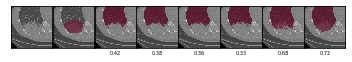

<Figure size 11520x11520 with 0 Axes>

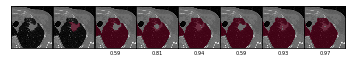

<Figure size 11520x11520 with 0 Axes>

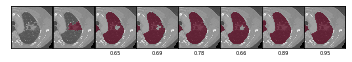

<Figure size 11520x11520 with 0 Axes>

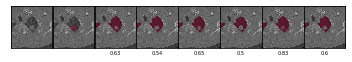

<Figure size 11520x11520 with 0 Axes>

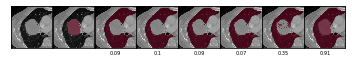

<Figure size 11520x11520 with 0 Axes>

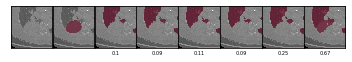

<Figure size 11520x11520 with 0 Axes>

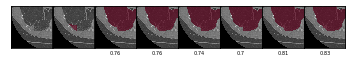

<Figure size 11520x11520 with 0 Axes>

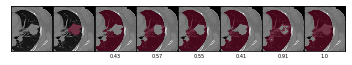

<Figure size 11520x11520 with 0 Axes>

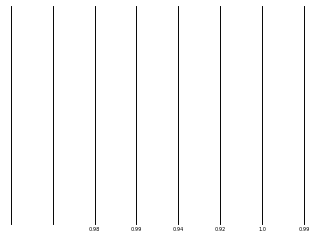

<Figure size 11520x11520 with 0 Axes>

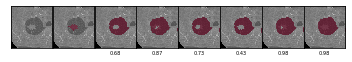

In [137]:
# For plotting the images for all segmentation masks using matplotlib

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


for index in range(len(ground)):
    print(index)
    #index = random.randint(0, len(ground)-1)#len(ground)-1
    #index = 7
    #print(index)

    xmin  = coord_arr[index][0]
    ymin  = coord_arr[index][1]
    zmin  = coord_arr[index][2]

    slack = 120

    im     =  ct_image[index][xmin, ymin-slack:ymin+slack, zmin-slack:zmin+slack]
    masked =  ground[index][xmin, ymin-slack:ymin+slack, zmin-slack:zmin+slack].astype('float')
    masked[masked == 0] = np.nan

    result1 = unet_result[index][xmin, ymin-slack:ymin+slack, zmin-slack:zmin+slack].astype('float')
    result1[result1 == 0] = np.nan

    result2 = vnet_result[index][xmin, ymin-slack:ymin+slack, zmin-slack:zmin+slack].astype('float')
    result2[result2 == 0] = np.nan

    result3 = dilated_result[index][xmin, ymin-slack:ymin+slack, zmin-slack:zmin+slack].astype('float')
    result3[result3 == 0] = np.nan

    result4 = segnet_result[index][xmin, ymin-slack:ymin+slack, zmin-slack:zmin+slack].astype('float')
    result4[result4 == 0] = np.nan

    result5 = phnn_result[index][xmin, ymin-slack:ymin+slack, zmin-slack:zmin+slack].astype('float')
    result5[result5 == 0] = np.nan

    result6 = result[index][xmin, ymin-slack:ymin+slack, zmin-slack:zmin+slack].astype('float')
    result6[result6 == 0] = np.nan

    plt.figure(figsize = (160,160))

    gs1 = gridspec.GridSpec(1, 8)
    gs1.update(wspace=0.01, hspace=0.0) # set the spacing between axes. 

    fig    = plt.figure()
    frame1 = plt.gca()

    alpha_value = 0.6
    for i in range(8):
        ax1 = plt.subplot(gs1[i])
        ax1.imshow(im, 'gray', interpolation='none')

        if i == 1:
            plt.imshow(masked, 'RdBu',   alpha=alpha_value)
        if i == 2:
            plt.imshow(result1, 'RdBu',  alpha=alpha_value)
        if i == 3:
            plt.imshow(result2, 'RdBu',  alpha=alpha_value)
        if i == 4:
            plt.imshow(result3, 'RdBu',  alpha=alpha_value)
        if i == 5:
            plt.imshow(result4, 'RdBu',  alpha=alpha_value)
        if i == 6:
            plt.imshow(result5, 'RdBu',  alpha=alpha_value)    
        if i == 7:
            plt.imshow(result6, 'RdBu',  alpha=alpha_value)

        ax1.get_xaxis().set_ticks([])
        ax1.get_yaxis().set_ticks([])
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        
        #if i == 0:
        #    ax1.set_xlabel('CT', fontsize=5)
        #if i == 1:
        #    ax1.set_xlabel('Tumor Mask', fontsize=5)
        if i > 1:
            ax1.set_xlabel(str(round(shape_recall[index][i-2], 2)), fontsize=5, labelpad=2)
    
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)    
    plt.xticks([])
    plt.yticks([])
    fig.savefig('/home/dril/JBHI-images/all-compare-images/old-'+str(index+20)+'.png', dpi=300, bbox_inches='tight', pad_inches=0.02)

In [31]:
print(len(shape_recall[0]))

6


In [56]:
# Good Case where there is confusion
# 032

In [153]:
shape_recall = []
for i in range(len(result)):
    t2 = np.sum(np.multiply(result[i], ground[i]))
    t3 = np.sum(ground[i])
    
    #print(i,  idnames[i], t2/t3)
    shape_recall.append(t2/t3)

print(np.mean(shape_recall), np.std(shape_recall))

0.8677321643991532 0.16776804898239422


In [ ]:
# For calculating the mean execution time for Segmentation

# Results
#                      Mean                  Std
# PHNN           21.9069414267283   11.097704959111125
# Segnet         20.95458562013715  10.91201009673852
# Dilated        12.982167173263639  6.807015894305565
# U-Net          9.547005890413772   5.2244384240489214
# V-Net          3.026218213314234   1.4968029968334746
# Proposed       3.249854245851206   1.4453511874813372
# Proposed Flood 3.8264488217442536  1.759783860783657


testids = np.load('/media/dril/New Volume/LUNA/TEST.npy')
#files   = glob.glob("/media/dril/New Volume/LUNA/ORIG-SEG-PHNN/*.nii.gz")
files   = glob.glob("/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/*.mhd")

lunaset = []
for t in files:
    #temp = t.split('/')[-1][:-7]
    temp = t.split('/')[-1][:-4]
    #print(temp)
    if temp in testids:
        lunaset.append(t)

lunaset.sort(key=os.path.getmtime)

time_array = []
for i, t in enumerate(lunaset):
    if i != 0:
        temp = os.path.getmtime(lunaset[i]) - os.path.getmtime(lunaset[i-1])
        if temp < 60:
            time_array.append(temp)
        print(i, t, os.path.getmtime(t), temp)

print(np.mean(time_array), np.std(time_array))

In [ ]:
# Nodule size and location         Model Name    
# 28 to 40            -> 0.880 (skip-auto11-large) (15 times)
# 28 to 40            -> 0.880 (skip-auto10-large) (10 times)
# 28 to 35            -> 0.872 (skip-auto9-large)  (10 times)
# 28 to 35            -> 0.875 (skip-auto7-large)  (5 times)
# 28 to 40            -> 0.85  (skip-auto8-large)  (5 times)
# 28 to 40            ->       (skip-auto10-large) (10 times)
# 28 to 35 only edges -> 0.81  (skip-auto6-large)  (5 times)


In [ ]:
shape_recall = []
for i in range(len(result)):
    t2 = np.sum(np.multiply(result[i], ground[i]))
    t3 = np.sum(ground[i])
    
    print(i,  idnames[i], t2/t3)
    shape_recall.append(t2/t3)

#print(np.mean(shape_recall))

In [ ]:
# For cleaning the PHNN segmentations

testids  = np.load('/media/dril/New Volume/LUNA/TEST.npy')
allfiles = glob.glob('/media/dril/New Volume/LUNA/ORIG-SEG-VNET/*.mhd')

for p in allfiles:
    print(p)
    
    vol1 = sitk.ReadImage(p)
    vol  = sitk.GetArrayFromImage(vol1)
    
    # Remove small patches
    labels    = label(vol)
    temp      = np.bincount(labels.flat)
    
    temp1 = list(temp)
    temp1.sort(reverse=True)
    print(temp1[:10])
    
    # For clearing small labelled components
    in_labels = []
    for k in range(len(temp)):
        if temp[k] > 100000:
            in_labels.append(k)
    
    final_labels = np.zeros(labels.shape)
    for l in in_labels:
        final_labels[labels == l] = 1
    
    vol2 = np.multiply(vol, final_labels)
    vol2 = vol2.astype('uint8')
    
    vol = vol2#abs(vol2-vol).astype('uint8')
    
    vol = sitk.GetImageFromArray(vol)
    vol.SetSpacing(vol1.GetSpacing())
    vol.SetDirection(vol1.GetDirection())
    vol.SetOrigin(vol1.GetOrigin())
        
    sitk.WriteImage(vol, p.replace('ORIG-SEG-VNET', 'ORIG-SEG-VNET-CLEAN'), True)

In [ ]:
# For getting the surface distances for all the segmentations

testids = np.load('/media/dril/New Volume/LUNA/TEST.npy')

total_array = []
left_array  = []
right_array = []

for t in testids:
    print(t)
    
    allvol       = []
    allvol_left  = []
    allvol_right = []
    allvol_clean = []
    
    a1 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-PHNN/'+t+'.nii.gz')
    a2 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/'+t+'.mhd')
    a3 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-DILATED/'+t+'.nii.gz')
    a4 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd')
    a5 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-DILATED/'+t+'.nii.gz')
    a6 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-UNET/'+t+'.nii.gz')
    a7 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET/'+t+'.mhd')
    
    b  = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')
    s  = a1.GetSpacing()
    
    a1 = sitk.GetArrayFromImage(a1)
    a2 = sitk.GetArrayFromImage(a2)
    a3 = sitk.GetArrayFromImage(a3)
    a4 = sitk.GetArrayFromImage(a4)
    a5 = sitk.GetArrayFromImage(a5)
    a6 = sitk.GetArrayFromImage(a6)
    a7 = sitk.GetArrayFromImage(a7)
    
    b  = sitk.GetArrayFromImage(b)

    allvol.append(a1)
    allvol.append(a2)
    allvol.append(a3)
    allvol.append(a4)
    allvol.append(a5)
    allvol.append(a6)
    allvol.append(a7)
    
    allvol.append(b)
    
    for i in range(len(allvol)):
        temp            = allvol[i]
        temp[temp == 5] = 0
        temp[temp == 4] = 1
        
        if i < len(allvol)-1:
            temp[temp == 3] = 0
        else:
            temp[temp == 3] = 2
        
        left  = copy.deepcopy(temp)
        right = copy.deepcopy(temp)
        
        left[left   != 1] = 0
        right[right != 2] = 0
        left[left   != 0] = 1
        right[right != 0] = 1
        
        temp[temp != 0 ]  = 1
        
        allvol_left.append(left)
        allvol_right.append(right)
        allvol_clean.append(temp)
    
    
    total_array = []
    left_array  = []
    right_array = []

    for i in range(len(allvol)-1):
        surface_distances = compute_surface_distances(allvol_clean[len(allvol)-1], allvol_clean[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Total ', value)
        total_array.append(value)
        #total_array.append([surface_distances, value])
        
        surface_distances = compute_surface_distances(allvol_left[len(allvol)-1],  allvol_left[i],  [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Left ', value)
        left_array.append(value)
        #left_array.append([surface_distances, value])
        
        surface_distances = compute_surface_distances(allvol_right[len(allvol)-1], allvol_right[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Right ', value)
        right_array.append(value)
        #right_array.append([surface_distances, value])
        print('---------------------------------------')
    
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/dilated-total_'+t+'.npy', total_array)
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/dilated-left_'+t+'.npy',  left_array)
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/dilated-right_'+t+'.npy', right_array)
    print('                                        ')


In [39]:
# For getting the surface distances for all the segmentations

testids = np.load('/media/dril/New Volume/LUNA/TEST.npy')

total_array = []
left_array  = []
right_array = []

for t in testids:
    print(t)
    
    allvol       = []
    allvol_left  = []
    allvol_right = []
    allvol_clean = []
    
    #a1 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-PHNN-CLEAN/'+t+'.nii.gz')
    #a2 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/'+t+'.mhd')
    #a3 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET-CLEAN/'+t+'.mhd')
    #a4 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd')
    a5 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-DILATED/'+t+'.nii.gz')
    #a6 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-UNET/'+t+'.nii.gz')
    #a7 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET/'+t+'.mhd')
    
    b  = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')
    s  = a5.GetSpacing()
    
#     a1 = sitk.GetArrayFromImage(a1)
#     a2 = sitk.GetArrayFromImage(a2)
    a3 = sitk.GetArrayFromImage(a5)
#     a4 = sitk.GetArrayFromImage(a4)
#     a5 = sitk.GetArrayFromImage(a5)
#     a6 = sitk.GetArrayFromImage(a6)
#     a7 = sitk.GetArrayFromImage(a7)
    b  = sitk.GetArrayFromImage(b)

#     allvol.append(a1)
#     allvol.append(a2)
    allvol.append(a3)
#     allvol.append(a4)
#     allvol.append(a5)
#     allvol.append(a6)
#     allvol.append(a7)
    allvol.append(b)
    
    for i in range(len(allvol)):
        temp            = allvol[i]
        temp[temp == 5] = 0
        temp[temp == 4] = 1
        
        if i < len(allvol)-1:
            temp[temp == 3] = 0
        else:
            temp[temp == 3] = 2
        
        left  = copy.deepcopy(temp)
        right = copy.deepcopy(temp)
        
        left[left   != 2] = 0
        right[right != 1] = 0
        left[left   != 0] = 1
        right[right != 0] = 1
        
        temp[temp != 0 ]  = 1
        
        allvol_left.append(left)
        allvol_right.append(right)
        allvol_clean.append(temp)
    
    
    total_array = []
    left_array  = []
    right_array = []

    for i in range(len(allvol)-1):
        surface_distances = compute_surface_distances(allvol_clean[len(allvol)-1], allvol_clean[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Total ', value)
        total_array.append(value)
        #total_array.append([surface_distances, value])
        
        surface_distances = compute_surface_distances(allvol_left[len(allvol)-1],  allvol_left[i],  [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Left ', value)
        left_array.append(value)
        #left_array.append([surface_distances, value])
        
        surface_distances = compute_surface_distances(allvol_right[len(allvol)-1], allvol_right[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Right ', value)
        right_array.append(value)
        #right_array.append([surface_distances, value])
        print('---------------------------------------')
    
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/dilated-total_'+t+'.npy', total_array)
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/dilated-left_'+t+'.npy',  left_array)
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/dilated-right_'+t+'.npy', right_array)
    print('                                        ')


1.3.6.1.4.1.14519.5.2.1.6279.6001.246758220302211646532176593724
Total  (0.20173200124045176, 1.3168593074380877, 0.13628922953342046, 0.39642644478584527, 0.097757472379023, 0.12595723814865525, 0.06683827119648211, 0.09132121728109016)
Left  (0.18187789751051978, 0.2663601417574956, 0.1469366432012297, 0.18864308110574926, 0.10492964355054132, 0.12542022878580286, 0.07440878587347441, 0.0929272495272906)
Right  (0.26177885135431594, 2.3625983137396287, 0.1279502339895721, 1.4222646970915536, 0.09144770672994021, 0.13637196242037478, 0.060178192338980786, 0.09253105561428958)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228
Total  (0.34439341957812175, 0.9012007345783657, 0.299346389732904, 0.7682044562649677, 0.2159210092559865, 0.4803394982785625, 0.15954429689399224, 0.29966314560044316)
Left  (0.31790633652926253, 0.5250475905609457, 0.276951228187444, 0.43355776966665377, 0.2035654252

Left  (0.20302962211044062, 0.6118576415412338, 0.1530372122065258, 0.1683474933507573, 0.10396891146886744, 0.10686974218270934, 0.06972567820826839, 0.07195256334436045)
Right  (0.17740347800272635, 0.16950004817819914, 0.13155018624340686, 0.12838081491964026, 0.09347466327034873, 0.09324842837193534, 0.06042847448185612, 0.06002383533159315)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.141149610914910880857802344415
Total  (0.18447356501288864, 0.6069947692924437, 0.14597143682479646, 0.3814524868333761, 0.08966826673612348, 0.13400740341339762, 0.054502280911384725, 0.08801819933756033)
Left  (0.27301222570724354, 1.2539790596189093, 0.19534173743859343, 1.0070934265883509, 0.10435814549498122, 0.46084056038803967, 0.06773661507510229, 0.17011974187019552)
Right  (0.2161908875011153, 1.7284505948386752, 0.16832026877501666, 1.4740307826548857, 0.09440914864471632, 0.7046240119885913, 0.05876362545279863, 0.22134

Total  (0.21349298568164865, 8.148653957406992, 0.1536436729847321, 7.226075634429327, 0.10370138833887868, 4.054764289182157, 0.07376364951665612, 1.4711942285718616)
Left  (0.22409156088369392, 10.983051732767239, 0.16183914011344225, 10.122057855465705, 0.10749027193927574, 6.939181248765652, 0.07776345210402758, 3.3409098399074604)
Right  (0.21142310197728206, 7.825328388309677, 0.15422357162952982, 6.813342682735078, 0.10341114759439489, 3.365748627223827, 0.07345742662741683, 1.0098140713421364)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.185154482385982570363528682299
Total  (0.14785141344786681, 1.6698986938425935, 0.12585043132619994, 1.2030736620997284, 0.09025835922799379, 0.1764193575010111, 0.06521608108414179, 0.10004314335314965)
Left  (0.1907736155883465, 1.9483648668788476, 0.16500462946092345, 1.4536399298331018, 0.11692774245042965, 0.4893432695253633, 0.0854941555188494, 0.18202376421374417)
Righ

Right  (0.13540479236399547, 0.2930225027001421, 0.11346471738755373, 0.17770220273588, 0.07677328784861338, 0.10293949991970866, 0.049570556989838525, 0.07375563812463304)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.238019241099704094018548301753
Total  (0.204666102173395, 0.42396487548601786, 0.14987720212288574, 0.16445441080294274, 0.11739020644415323, 0.12094174093213984, 0.08484965629462012, 0.08859786848791126)
Left  (0.2293485169050372, 0.6321090508750604, 0.165905046212829, 0.2712620259247279, 0.1252438208187171, 0.133639656323418, 0.09313939911650142, 0.1020018389178436)
Right  (0.1888555646605916, 0.26136674197665233, 0.1423212777045527, 0.1483977958277238, 0.112292092580318, 0.11510263589599527, 0.07946758101497368, 0.08243545787059053)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.242624386080831911167122628616
Total  (0.17952756041512

Total  (0.12983117762872148, 1.3649884278354452, 0.10374181279851499, 0.5532615395023744, 0.06852229947954167, 0.10118127297682826, 0.03326621111774605, 0.06597734388177666)
Left  (0.1282826856556318, 2.055367698179932, 0.10612776712295743, 1.0848332065737711, 0.07153506828560606, 0.10855997789955533, 0.036444621196119555, 0.07288628438175244)
Right  (0.13125913492845745, 1.1227201073936277, 0.10191296245952546, 0.3066333164324755, 0.0657398566937748, 0.09554254488574081, 0.030330556270521454, 0.0604241841271107)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.272348349298439120568330857680
Total  (1.4898991505428174, 0.7424619430007597, 1.1485603704877183, 0.5711292192253408, 0.4894230252022397, 0.3212677230239692, 0.2217384349892345, 0.19667311334425558)
Left  (2.5918020281319465, 1.186415203960873, 2.2058316371304643, 0.9957346241268464, 1.3355903341750714, 0.6388430291501067, 0.6868112576177022, 0.4043129106414958)


Right  (0.13468903267952181, 0.5233427653668721, 0.10879792327949486, 0.17935103336693006, 0.07489840732685812, 0.10195683262390233, 0.03782797306640034, 0.06639010442581195)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.323426705628838942177546503237
Total  (0.2310108128061458, 0.3014911214729961, 0.1835833349636088, 0.22838747306844523, 0.12536278512300977, 0.14380628989848335, 0.09109487140186263, 0.10881652518768486)
Left  (0.21087338698904526, 0.30642256259227024, 0.16935246012040078, 0.19694699119946202, 0.1201963838964651, 0.13449245898145465, 0.0856402029883395, 0.10073114867691205)
Right  (0.25273815212106504, 0.4507967396318118, 0.20029639583819248, 0.3025292518662206, 0.13154416131278202, 0.1638948495802931, 0.09736652723164946, 0.12204054937128975)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.323535944958374186208096541480
Total  (0.1393

Total  (0.16704576725407122, 0.5198250128623264, 0.11990996785520826, 0.19557014616054477, 0.08698583101981772, 0.0938553662547715, 0.058181211164330976, 0.06543261737873854)
Left  (0.23687714385530442, 0.3535152507790508, 0.1804534065256935, 0.21424718894272843, 0.10335684036672964, 0.11098219274807977, 0.07517438543518858, 0.08008607015384772)
Right  (0.27490837908111965, 0.8332334238254638, 0.18558224649316823, 0.471601633518453, 0.09957128224030685, 0.12841385156123772, 0.07133840470283949, 0.08600215973062213)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.908250781706513856628130123235
Total  (0.6005916357507508, 3.7630085571274723, 0.48019695362496917, 3.0496553201111327, 0.3047183115700201, 1.7961189618151754, 0.19947291541897244, 1.0652090855869216)
Left  (2.390368057186102, 4.490386665903832, 1.7908577376841792, 3.766025131650433, 0.6322405120257377, 2.559354199586122, 0.3469529424032615, 1.6509426725165588)


Right  (0.16616339800180324, 0.34077136145818104, 0.1371793567403278, 0.23486389383136547, 0.09362453854447461, 0.13090025015913578, 0.05765867894761326, 0.09184867428978112)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.137773550852881583165286615668
Total  (0.1636444276350758, 1.9680357112333193, 0.13447702035526218, 1.5223592967994313, 0.10091467199447823, 0.4873873181691165, 0.07320903662934009, 0.12570776868558212)
Left  (0.1943370277284472, 3.4333654198391232, 0.1524534355754537, 2.977068547466776, 0.10912335571065157, 1.8458341707093422, 0.08108719954777097, 0.643763464209117)
Right  (0.14857408416710116, 0.8054982265197903, 0.12894476851886166, 0.3449271821858043, 0.09717656520770022, 0.1268124308161219, 0.06926313801208865, 0.09229529182985588)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.149041668385192796520281592139
Total  (0.13673270880

Total  (0.2823126950431602, 0.43443250179136006, 0.23436797133668374, 0.3128658093419607, 0.14695370909930425, 0.19459439798847572, 0.09623031348950796, 0.13027475939987707)
Left  (0.24436016284374365, 0.29539632066735083, 0.19786674685839906, 0.22854699127185646, 0.11862265027124248, 0.13756429053508418, 0.07514005138468817, 0.09286280015449183)
Right  (0.36148849482938616, 1.4267153644872919, 0.30277968780369574, 0.9687706378682395, 0.20674793026491478, 0.3474878320192054, 0.13072757977866462, 0.22570093652237008)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.198016798894102791158686961192
Total  (0.1864737392915121, 0.3123999676041519, 0.15956247438340937, 0.2207945117813555, 0.13070272147377238, 0.1530342177459802, 0.10172236565308855, 0.12439661481179735)
Left  (0.17554367317804606, 0.5908004768999887, 0.15407339628898448, 0.23649988154366172, 0.12734353285212416, 0.15597724747116617, 0.09817622284928589, 0.12586

Right  (0.14541030065121252, 0.2876980948132181, 0.11411447395793903, 0.13527970661541694, 0.07952761301095763, 0.08765663509625417, 0.048897892830080766, 0.057479136706917316)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.213854687290736562463866711534
Total  (0.19997210157572268, 0.40493024696875374, 0.1606645579372776, 0.1923123367370086, 0.12690629308022452, 0.13843953665605477, 0.09793252500206093, 0.1101061881524422)
Left  (0.20310006918155782, 0.6105341029909654, 0.16275023564590343, 0.2292912630955134, 0.12996082191528835, 0.14770419955709163, 0.10115704141355303, 0.11936466480446928)
Right  (0.19901608465934342, 0.4341782613508675, 0.1610284277598331, 0.25546787954333994, 0.1253864428310249, 0.14502639537538659, 0.0963279969487633, 0.11578082452149861)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.219254430927834326484477690403
Total  (0.180

Total  (0.21771327625479228, 0.7798095215351502, 0.15451342237094795, 0.3359061897310431, 0.09579604792409102, 0.10378661109027845, 0.06416986184650965, 0.07166978575842718)
Left  (0.21455314545483486, 1.3519001161019926, 0.15409513926472526, 0.8830552005134447, 0.095869509931329, 0.11461410374191487, 0.06437634239548017, 0.08041128240317552)
Right  (0.22087351524061627, 0.1908084157583689, 0.15494861365894283, 0.14150593774433504, 0.0957225834460291, 0.09516710540795047, 0.06396337396693691, 0.06329389108506171)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.262873069163227096134627700599
Total  (0.25571235951918486, 0.36444623669325266, 0.19770434801218092, 0.276609125013509, 0.1272687390005791, 0.1593206728805704, 0.092513752996326, 0.11292615174256833)
Left  (0.29577805521481365, 0.433427463178586, 0.23044975745525287, 0.31694946385105155, 0.1428143851445412, 0.18281927930097983, 0.10231494692003835, 0.124023683357

Right  (0.2005978965359135, 0.6012431770866835, 0.13902722747772578, 0.39499260894706756, 0.08110679952718347, 0.15363776228233333, 0.046550995958748315, 0.08847932429918134)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.301462380687644451483231621986
Total  (0.20670721818567236, 0.5786616149704245, 0.16016645289495873, 0.22833661988482296, 0.12019409810218414, 0.14307704103223165, 0.08780878346919772, 0.10830365497249184)
Left  (0.22686789228170218, 0.35608150696617563, 0.16625239978779613, 0.18811739576869624, 0.12330989675615106, 0.13465074392465445, 0.0910984893160305, 0.10306915383929191)
Right  (0.17574156959495799, 1.047675075123372, 0.1529236696165166, 0.40184243047694507, 0.11543719619973486, 0.16367611314314012, 0.08278939666029199, 0.11781957063359723)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.302403227435841351528721627052
Total  (0.1

Total  (0.15045117992259585, 0.3313510646117396, 0.1202896682170222, 0.18889908968937977, 0.07519870322309122, 0.10191310413615391, 0.03597319554425206, 0.06353933450505886)
Left  (0.16889490631561793, 0.28515042154839054, 0.13806488531137034, 0.19305519480724992, 0.08402225859533646, 0.11281863841576273, 0.04528910188182772, 0.07297735145785764)
Right  (0.1319438035292721, 0.3785928329293193, 0.10313574683171674, 0.19713348256550361, 0.0663397455715681, 0.09232468836119631, 0.026625160388343755, 0.05405105993681833)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.518487185634324801733841260431
Total  (0.18333756348534783, 1.5926126672411036, 0.1502137404569256, 0.7677863762552757, 0.09784655527394463, 0.1530646585009616, 0.057710428237153534, 0.10110233597013008)
Left  (0.20692621329100794, 0.2823462162044067, 0.1750471709208993, 0.23077296575358122, 0.10967881775681648, 0.1473886532216009, 0.07019783309295421, 0.10172

Right  (0.15713432877221306, 0.546168391728455, 0.12066579714518275, 0.3865864149914047, 0.07484780014334406, 0.15443716527324905, 0.047430214396398655, 0.08385868012975121)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.897161587681142256575045076919
Total  (0.131361431000311, 2.486588366072155, 0.09948556480741083, 1.7588498026628514, 0.06381407975150023, 0.2992215344032922, 0.03046619944026714, 0.08784907517186596)
Left  (0.14232381795419008, 4.487305669664039, 0.10740541953132143, 3.7175776939416147, 0.06695564962983941, 1.6388949915353515, 0.03378152814806431, 0.24938304448301862)
Right  (0.12389549122955312, 0.3022543194351227, 0.09536321056215015, 0.19037910458619164, 0.06299278931097627, 0.0898280285803215, 0.02960024497478516, 0.057543841157338106)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.931383239747372227838946053237
Total  (0.25735496

In [40]:
# For getting the surface distances for all the segmentations

testids = np.load('/media/dril/New Volume/LUNA/TEST.npy')

total_array = []
left_array  = []
right_array = []

for t in testids:
    print(t)
    
    allvol       = []
    allvol_left  = []
    allvol_right = []
    allvol_clean = []
    
    #a1 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-PHNN-CLEAN/'+t+'.nii.gz')
    #a2 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/'+t+'.mhd')
    #a3 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET-CLEAN/'+t+'.mhd')
    #a4 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd')
    a5 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-UNET/'+t+'.nii.gz')
    #a6 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-UNET/'+t+'.nii.gz')
    #a7 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET/'+t+'.mhd')
    
    b  = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')
    s  = a5.GetSpacing()
    
#     a1 = sitk.GetArrayFromImage(a1)
#     a2 = sitk.GetArrayFromImage(a2)
    a3 = sitk.GetArrayFromImage(a5)
#     a4 = sitk.GetArrayFromImage(a4)
#     a5 = sitk.GetArrayFromImage(a5)
#     a6 = sitk.GetArrayFromImage(a6)
#     a7 = sitk.GetArrayFromImage(a7)
    b  = sitk.GetArrayFromImage(b)

#     allvol.append(a1)
#     allvol.append(a2)
    allvol.append(a3)
#     allvol.append(a4)
#     allvol.append(a5)
#     allvol.append(a6)
#     allvol.append(a7)
    allvol.append(b)
    
    for i in range(len(allvol)):
        temp            = allvol[i]
        temp[temp == 5] = 0
        temp[temp == 4] = 1
        
        if i < len(allvol)-1:
            temp[temp == 3] = 0
        else:
            temp[temp == 3] = 2
        
        left  = copy.deepcopy(temp)
        right = copy.deepcopy(temp)
        
        left[left   != 2] = 0
        right[right != 1] = 0
        left[left   != 0] = 1
        right[right != 0] = 1
        
        temp[temp != 0 ]  = 1
        
        allvol_left.append(left)
        allvol_right.append(right)
        allvol_clean.append(temp)
    
    
    total_array = []
    left_array  = []
    right_array = []

    for i in range(len(allvol)-1):
        surface_distances = compute_surface_distances(allvol_clean[len(allvol)-1], allvol_clean[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Total ', value)
        total_array.append(value)
        #total_array.append([surface_distances, value])
        
        surface_distances = compute_surface_distances(allvol_left[len(allvol)-1],  allvol_left[i],  [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Left ', value)
        left_array.append(value)
        #left_array.append([surface_distances, value])
        
        surface_distances = compute_surface_distances(allvol_right[len(allvol)-1], allvol_right[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Right ', value)
        right_array.append(value)
        #right_array.append([surface_distances, value])
        print('---------------------------------------')
    
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/unet-total_'+t+'.npy', total_array)
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/unet-left_'+t+'.npy',  left_array)
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/unet-right_'+t+'.npy', right_array)
    print('                                        ')


1.3.6.1.4.1.14519.5.2.1.6279.6001.246758220302211646532176593724
Total  (0.18938572839877207, 7.866739344480673, 0.11631027850768651, 7.114789106110575, 0.07676302058523082, 4.5132421495327835, 0.04467744793703559, 1.6551398713536392)
Left  (0.1349622756640588, 13.70300285192768, 0.10942254940669015, 12.955280266147504, 0.07355978453155958, 10.378458044358467, 0.04129613087457612, 7.356506809679259)
Right  (0.24580617740790603, 0.35040647959953397, 0.12435204297066342, 0.14659821522186542, 0.08001328957763677, 0.08928686387093313, 0.04810852742963593, 0.0578983365410268)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228
Total  (0.8428598469526877, 2.7665268569285875, 0.5897578102109062, 2.0545269440046727, 0.2465719382439317, 0.4672848748041927, 0.1648251464078273, 0.25185438654124026)
Left  (0.2816518930595728, 5.116436191830658, 0.23824368938455304, 4.303679758628193, 0.17394774399290333, 

Right  (0.19387514409302783, 1.190482212590432, 0.14482693963231205, 0.4464237996994464, 0.09644785179529179, 0.10040707454808041, 0.06483706320294264, 0.06789117186675578)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.141149610914910880857802344415
Total  (0.15628872894463833, 2.3379465395888532, 0.11793371725890427, 1.7765504634986542, 0.06871800085397708, 0.40091583450576074, 0.032388111369119094, 0.09656106823431812)
Left  (0.1495146585229109, 3.012857416322847, 0.11324410648096027, 2.120876231304648, 0.06847312777596143, 0.3192364890792534, 0.03213096310954725, 0.09595915602055871)
Right  (0.19315811758156995, 12.479288143568356, 0.1485047521622315, 10.848695478729661, 0.07904159709063142, 4.335030197272583, 0.04311273035220567, 0.236186730140618)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.143813757344903170810482790787
Total  (0.170191927441

Total  (0.19158313794243279, 8.306184236320155, 0.13395470279125643, 7.497569275256214, 0.08831574345968532, 4.961029140126268, 0.05752324252459313, 2.4293328546932162)
Left  (0.15573508099632238, 22.24724511002996, 0.1142089876730518, 20.40060696032333, 0.08111871711495836, 14.057263891323737, 0.049926824853652185, 7.942648859058746)
Right  (0.23027136508961604, 11.392178297659264, 0.16247767336219784, 9.706703146477956, 0.09711088422276991, 3.639692211152286, 0.06632091355255187, 0.3801030945160885)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.185154482385982570363528682299
Total  (0.12739550272688668, 2.547104234827827, 0.09735833044243306, 2.0307569737298614, 0.06446053417472758, 0.5335537213839563, 0.037985031633740535, 0.07813113368481893)
Left  (0.11910062160182205, 5.175013883916747, 0.09513180422083516, 3.9279866050629964, 0.06423402055172645, 1.4850389093735397, 0.03774637815133767, 0.1543414045318027)
Righ

Right  (0.13435347740958173, 3.8271462268879533, 0.10999988381536416, 2.974011033168817, 0.06583483015317253, 1.40667361076563, 0.03802438710240849, 0.45660160176842063)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.238019241099704094018548301753
Total  (0.16221698992199338, 0.8348484056206381, 0.12335855336504188, 0.2637186500083121, 0.09337361286167443, 0.09964882676557894, 0.06146790969792615, 0.06704385274758283)
Left  (0.14617847266931383, 0.2151129987294082, 0.11789873733602273, 0.11730041249507973, 0.09065235252909573, 0.09096612806624654, 0.05931968684455758, 0.05936166879233002)
Right  (0.18051219192664425, 2.0904883942121546, 0.13271357014055532, 1.0962146786546232, 0.09751862873107013, 0.1090282068245762, 0.0649303438412323, 0.07602282942594155)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.242624386080831911167122628616
Total  (0.14886162

Total  (0.1261687730159592, 0.34316597655189407, 0.10061959359938197, 0.1551508996545431, 0.06167103381950587, 0.0850663661212505, 0.026034315455187015, 0.050726369375778055)
Left  (0.12804945818816393, 0.7172005240274864, 0.10418670208732611, 0.16521375065687322, 0.06410317969369743, 0.09108388676390027, 0.028599824987552994, 0.05585075338598409)
Right  (0.12646538310665764, 0.8163236042633215, 0.09885991258384517, 0.18612591234515752, 0.05991515803556129, 0.08657729559408683, 0.024182272246647003, 0.05107580871987761)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.272348349298439120568330857680
Total  (1.9559544010510772, 7.48645831275902, 1.5429089983875133, 6.776087054474678, 0.525197989282245, 4.541407995935059, 0.15924574327871613, 2.6471526840634843)
Left  (4.576375853095671, 17.087042380313047, 4.010796257007329, 15.241074487258254, 2.3407134958350166, 7.942530371087135, 0.8673869246572844, 3.497920747406082)
R

Right  (0.13014359260354832, 0.34377124579956, 0.10258231229161728, 0.16640857792631814, 0.06631446765209274, 0.09201600681332339, 0.02876716340003198, 0.05589364273560799)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.323426705628838942177546503237
Total  (0.2411390951990755, 8.849282844956168, 0.1733633236993017, 7.779425112516367, 0.0999850384982462, 4.142320263847098, 0.06401814373062824, 0.21587633541904236)
Left  (0.15923678575255223, 6.348677740915003, 0.12363417917434112, 5.08571452169127, 0.08454019769827771, 1.532403548918025, 0.048003053414859664, 0.10251662610978868)
Right  (0.3269817200886301, 12.278360718677794, 0.24474492147365726, 11.091673905270907, 0.12173992503642694, 7.386648102084712, 0.08096393070477494, 2.903955637220379)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.323535944958374186208096541480
Total  (0.1364259129957501, 4.

Total  (0.14314662386708787, 4.03974951294763, 0.10711998831731914, 3.4229137307212016, 0.07683557899017276, 1.455493997193241, 0.04746705624415019, 0.0967774493556245)
Left  (0.1918869719006503, 1.0501748477861017, 0.1389543372007471, 0.3323305286005302, 0.08533985756592093, 0.09442799649700695, 0.056396977710384634, 0.06499089480650648)
Right  (0.37022831418087637, 7.398969461897228, 0.20981610568266615, 6.7143270869813785, 0.09715834491010729, 4.497885309504755, 0.06788846592754197, 2.1019182928888527)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.908250781706513856628130123235
Total  (0.812462462973875, 3.749723428246714, 0.6606843380061498, 3.3837337446023352, 0.4142179436357631, 2.4885791170525864, 0.2566387344957191, 1.7332207626526943)
Left  (2.469542886768023, 3.516438527303154, 1.836214315121506, 3.097322748709358, 0.6783905001925863, 2.1970708759417166, 0.3594920912812699, 1.4776794869732677)
Right  (1.1460

Right  (0.16279371175747215, 0.3570319069120488, 0.13344672710413316, 0.20211232484704608, 0.08170789839258742, 0.11091593914214981, 0.04507999299032082, 0.07110160196700036)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.137773550852881583165286615668
Total  (0.12444011913321026, 2.6486860956125593, 0.09824258953562089, 1.7776903903731591, 0.06724491562348986, 0.2571891331887982, 0.03766871298096614, 0.07636404107418257)
Left  (0.14610484430495624, 4.19345412671451, 0.10948229091334723, 3.331679240831434, 0.06998177902737841, 0.8402972938342591, 0.04055820284435467, 0.1134049006198935)
Right  (0.12655828054079352, 6.954225279066378, 0.10174242148654854, 5.926483847511208, 0.0698659965261209, 2.519806855651779, 0.04043528869973372, 0.13616158791014052)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.149041668385192796520281592139
Total  (0.1357249945936

Total  (0.295713247520411, 5.003487502285154, 0.24048221222112373, 4.208914033492359, 0.14686331883182385, 1.9479180763165216, 0.08917404280472341, 0.28634945785682014)
Left  (0.18274462313790127, 0.7488409513012986, 0.1551109827379782, 0.23143446989073116, 0.09457279549908619, 0.12310933006244613, 0.04991700023583952, 0.07766887443190322)
Right  (0.4379955850692102, 36.81881556669485, 0.36744866110638974, 34.91908669286551, 0.24947074739165045, 27.27227240039173, 0.14516237747630875, 17.110638414283535)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.198016798894102791158686961192
Total  (0.2638286457309017, 0.9855825904760078, 0.18407266042066742, 0.5645507039716754, 0.10304824176251916, 0.15821358223607754, 0.07207849254159496, 0.09792026257050479)
Left  (0.22686935086007984, 3.6106193665217936, 0.15654760568522297, 2.528781756646049, 0.09983334427926009, 0.5473832400470381, 0.06886031104882559, 0.14417553554672444)


Right  (0.171507635181542, 3.037960164544167, 0.11967493842462272, 2.136439647185155, 0.07010936709256783, 0.2529243605454618, 0.038956407989205855, 0.06970345038554274)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.213854687290736562463866711534
Total  (0.175559504090448, 3.2629499372367348, 0.133387832858478, 2.526573152129957, 0.09101086828233687, 0.40932734478991784, 0.060042922867588416, 0.09946922952867109)
Left  (0.17370425045875523, 6.276295359303381, 0.1316613967541847, 5.471286906749656, 0.0897168394921576, 2.959479773957412, 0.05867731939936941, 0.6988253975001931)
Right  (0.18658419650004218, 3.2138887302026915, 0.14270269692867626, 2.389039673055993, 0.09548588112913244, 0.1778967329831594, 0.0647662898535962, 0.0974705307738704)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.219254430927834326484477690403
Total  (0.16018411984947833, 9.7

Total  (0.2121209652225507, 0.14947844739471766, 0.14083520606742184, 0.11149816569920128, 0.08359166195403538, 0.07762887162837082, 0.052790995932485346, 0.046910326452447595)
Left  (0.15895617698544215, 0.13922513427196928, 0.1156516842997912, 0.10605880320070146, 0.0770410805422061, 0.07448912751867233, 0.046489358464920846, 0.04384554344974106)
Right  (0.2652875735358052, 0.15984931324460966, 0.17472893959630278, 0.11755716557424768, 0.09014246368836645, 0.08080461401493003, 0.059092857124743554, 0.05000876047069494)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.262873069163227096134627700599
Total  (0.38863725308139246, 3.9115032321046836, 0.2186163199359414, 3.343952953893421, 0.10982605779953465, 1.8189072288149792, 0.07087877411062324, 0.43197212183362516)
Left  (0.5146356824179029, 2.7853762280724457, 0.29948584767615904, 1.448111549830029, 0.11139736243063118, 0.25980515464100506, 0.06933033286341973, 0.1127

Right  (0.20155115365160703, 2.0324887991921643, 0.128887694206135, 1.1377394663058584, 0.06864240895840888, 0.15357145256244642, 0.03339415453923106, 0.07758087249475747)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.301462380687644451483231621986
Total  (0.16895720863617697, 6.557270553586999, 0.13361385670541126, 5.5928371008604945, 0.08902677085953067, 2.680485946284399, 0.0549099239030108, 0.18022850387446793)
Left  (0.14639687584289826, 7.774029522641453, 0.11081218608230411, 6.893993044349893, 0.07592220915977896, 3.954126281994885, 0.04107819676633429, 1.0108844307212073)
Right  (0.20365438803165534, 7.193094302452389, 0.17018584472447293, 5.307328574747306, 0.11402707879047459, 1.0505614275424837, 0.07618271607817528, 0.15772170078716788)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.302403227435841351528721627052
Total  (0.14089348645750455

Total  (0.13808199825232517, 1.882070857562669, 0.10921341831085009, 1.2486600516031408, 0.06449634815698102, 0.1447182865312871, 0.024676258593307493, 0.07505716687284464)
Left  (0.15893639597879783, 3.354106748025092, 0.1277510886788548, 2.4473536920296755, 0.07258332749807436, 0.46275351646136814, 0.033214702795393736, 0.10999698203665949)
Right  (0.11715563120721835, 0.7137810669578423, 0.09241772229973369, 0.22517543247084343, 0.056376432521307765, 0.0845068044439942, 0.01610836689436249, 0.04579829723679708)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.518487185634324801733841260431
Total  (0.1878151352440695, 0.6192245027595504, 0.15472741994397235, 0.22357871938712556, 0.09436171684551581, 0.12713685743255537, 0.054031991741989686, 0.08398371096421363)
Left  (0.212091850880797, 0.4178736285077449, 0.1790297183534927, 0.24702292119451058, 0.10651085676319719, 0.1506333338313131, 0.06454436382158334, 0.09776313

Right  (0.15268410064363605, 7.268856732964333, 0.11657329888399368, 6.3233476213180975, 0.07110541013617686, 3.6507161846920173, 0.043479911589404556, 1.1257047835289329)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.897161587681142256575045076919
Total  (0.1273908830345126, 0.32825161154302973, 0.09242282507214566, 0.19471918875012229, 0.05489500709850207, 0.08034759051808213, 0.021051611274747598, 0.046517724190795195)
Left  (0.1398799559250318, 0.3885582558201703, 0.10055707332220895, 0.24346779518730485, 0.05782017229646124, 0.09122417157574289, 0.024138500655644442, 0.052275657993559085)
Right  (0.11698194416388519, 0.2676682189715914, 0.08689651922891965, 0.1522985834766165, 0.053455946401076794, 0.07406689281074096, 0.019533580487335785, 0.04128793727144449)
---------------------------------------
                                        
1.3.6.1.4.1.14519.5.2.1.6279.6001.931383239747372227838946053237
Total  (

In [ ]:
# For getting the surface distances for all the segmentations

testids = np.load('/media/dril/New Volume/LUNA/TEST.npy')

total_array = []
left_array  = []
right_array = []

for t in testids:
    print(t)
    
    allvol       = []
    allvol_left  = []
    allvol_right = []
    allvol_clean = []
    
    #a1 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-PHNN-CLEAN/'+t+'.nii.gz')
    #a2 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/'+t+'.mhd')
    #a3 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET-CLEAN/'+t+'.mhd')
    #a4 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd')
    a5 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-SEGNET/'+t+'.nii.gz')
    #a6 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-UNET/'+t+'.nii.gz')
    #a7 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET/'+t+'.mhd')
    
    b  = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')
    s  = a5.GetSpacing()
    
#     a1 = sitk.GetArrayFromImage(a1)
#     a2 = sitk.GetArrayFromImage(a2)
    a3 = sitk.GetArrayFromImage(a5)
#     a4 = sitk.GetArrayFromImage(a4)
#     a5 = sitk.GetArrayFromImage(a5)
#     a6 = sitk.GetArrayFromImage(a6)
#     a7 = sitk.GetArrayFromImage(a7)
    b  = sitk.GetArrayFromImage(b)

#     allvol.append(a1)
#     allvol.append(a2)
    allvol.append(a3)
#     allvol.append(a4)
#     allvol.append(a5)
#     allvol.append(a6)
#     allvol.append(a7)
    allvol.append(b)
    
    for i in range(len(allvol)):
        temp            = allvol[i]
        temp[temp == 5] = 0
        temp[temp == 4] = 1
        
        if i < len(allvol)-1:
            temp[temp == 3] = 0
        else:
            temp[temp == 3] = 2
        
        left  = copy.deepcopy(temp)
        right = copy.deepcopy(temp)
        
        left[left   != 2] = 0
        right[right != 1] = 0
        left[left   != 0] = 1
        right[right != 0] = 1
        
        temp[temp != 0 ]  = 1
        
        allvol_left.append(left)
        allvol_right.append(right)
        allvol_clean.append(temp)
    
    
    total_array = []
    left_array  = []
    right_array = []

    for i in range(len(allvol)-1):
        surface_distances = compute_surface_distances(allvol_clean[len(allvol)-1], allvol_clean[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Total ', value)
        total_array.append(value)
        #total_array.append([surface_distances, value])
        
        surface_distances = compute_surface_distances(allvol_left[len(allvol)-1],  allvol_left[i],  [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Left ', value)
        left_array.append(value)
        #left_array.append([surface_distances, value])
        
        surface_distances = compute_surface_distances(allvol_right[len(allvol)-1], allvol_right[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Right ', value)
        right_array.append(value)
        #right_array.append([surface_distances, value])
        print('---------------------------------------')
    
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/segnet-total_'+t+'.npy', total_array)
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/segnet-left_'+t+'.npy',  left_array)
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/segnet-right_'+t+'.npy', right_array)
    print('                                        ')


In [ ]:
# For getting the surface distances for all the segmentations

testids = np.load('/media/dril/New Volume/LUNA/TEST.npy')

total_array = []
left_array  = []
right_array = []

for t in testids:
    print(t)
    
    allvol       = []
    allvol_left  = []
    allvol_right = []
    allvol_clean = []
    
    a5 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-PHNN/'+t+'.nii.gz')
    #a2 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/'+t+'.mhd')
    #a3 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET-CLEAN/'+t+'.mhd')
    #a4 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd')
    #a5 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/'+t+'.mhd')
    #a6 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-UNET/'+t+'.nii.gz')
    #a7 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET/'+t+'.mhd')
    
    b  = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')
    s  = a5.GetSpacing()
    
#     a1 = sitk.GetArrayFromImage(a1)
#     a2 = sitk.GetArrayFromImage(a2)
    a3 = sitk.GetArrayFromImage(a5)
#     a4 = sitk.GetArrayFromImage(a4)
#     a5 = sitk.GetArrayFromImage(a5)
#     a6 = sitk.GetArrayFromImage(a6)
#     a7 = sitk.GetArrayFromImage(a7)
    b  = sitk.GetArrayFromImage(b)

#     allvol.append(a1)
#     allvol.append(a2)
    allvol.append(a3)
#     allvol.append(a4)
#     allvol.append(a5)
#     allvol.append(a6)
#     allvol.append(a7)
    allvol.append(b)
    
    for i in range(len(allvol)):
        temp            = allvol[i]
        temp[temp == 5] = 0
        temp[temp == 4] = 1
        
        if i < len(allvol)-1:
            temp[temp == 3] = 0
        else:
            temp[temp == 3] = 2
        
        left  = copy.deepcopy(temp)
        right = copy.deepcopy(temp)
        
        left[left   != 2] = 0
        right[right != 1] = 0
        left[left   != 0] = 1
        right[right != 0] = 1
        
        temp[temp != 0 ]  = 1
        
        allvol_left.append(left)
        allvol_right.append(right)
        allvol_clean.append(temp)
    
    
    total_array = []
    left_array  = []
    right_array = []

    for i in range(len(allvol)-1):
        surface_distances = compute_surface_distances(allvol_clean[len(allvol)-1], allvol_clean[i], [s[2], s[1], s[0]])
        value = compute_average_surface_distance(surface_distances)
        print('Total ', value)
        total_array.append(value)
        #total_array.append([surface_distances, value])
        
#         surface_distances = compute_surface_distances(allvol_left[len(allvol)-1],  allvol_left[i],  [s[2], s[1], s[0]])
#         value = compute_average_surface_distance(surface_distances)
#         print('Left ', value)
#         left_array.append(value)
#         #left_array.append([surface_distances, value])
        
#         surface_distances = compute_surface_distances(allvol_right[len(allvol)-1], allvol_right[i], [s[2], s[1], s[0]])
#         value = compute_average_surface_distance(surface_distances)
#         print('Right ', value)
#         right_array.append(value)
        #right_array.append([surface_distances, value])
        print('---------------------------------------')
    
    np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/phnn-total_'+t+'.npy', total_array)
    #np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/phnn-left_'+t+'.npy',  left_array)
    #np.save('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/phnn-right_'+t+'.npy', right_array)
    print('                                        ')


In [108]:
# For calculating the metrics mean for all the test ids

testids     = np.load('/media/dril/New Volume/LUNA/TEST.npy')

lung_type = 'total'

total_array = []
left_array  = []
right_array = []

algo_names  = ['PHNN','SEGNET', 'DILATED', 'UNET', 'VNET', 'VNET-AUTO', 'VNET-AUTO-FLOOD']
#algo_names  = ['SEGNET', 'DILATED', 'UNET', 'VNET', 'VNET-AUTO-FLOOD', 'VNET-AUTO']

#algo_names  = ['PHNN', 'FLOOD', 'SEGNET', 'WITHOUT-FLOOD', 'DILATED', 'UNET', 'VNET']
algo_means  = []
for i in range(len(algo_names)):
    algo_means.append([])
error_list = ['1.3.6.1.4.1.14519.5.2.1.6279.6001.246758220302211646532176593724', '1.3.6.1.4.1.14519.5.2.1.6279.6001.286422846896797433168187085942', 
              '1.3.6.1.4.1.14519.5.2.1.6279.6001.346115813056769250958550383763', '1.3.6.1.4.1.14519.5.2.1.6279.6001.248425363469507808613979846863', 
              '1.3.6.1.4.1.14519.5.2.1.6279.6001.266581250778073944645044950856', '1.3.6.1.4.1.14519.5.2.1.6279.6001.113679818447732724990336702075'
              '1.3.6.1.4.1.14519.5.2.1.6279.6001.792381786708289670758399079830', '1.3.6.1.4.1.14519.5.2.1.6279.6001.323535944958374186208096541480',
             '1.3.6.1.4.1.14519.5.2.1.6279.6001.225515255547637437801620523312', '1.3.6.1.4.1.14519.5.2.1.6279.6001.225515255547637437801620523312',
             '1.3.6.1.4.1.14519.5.2.1.6279.6001.226152078193253087875725735761', '1.3.6.1.4.1.14519.5.2.1.6279.6001.171177995014336749670107905732', 
             '1.3.6.1.4.1.14519.5.2.1.6279.6001.170825539570536865106681134236', '1.3.6.1.4.1.14519.5.2.1.6279.6001.749871569713868632259874663577',
              '1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335', '1.3.6.1.4.1.14519.5.2.1.6279.6001.272348349298439120568330857680'] 
# #error_list = ['1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335']

for t in testids:
    #if t in error_list:
    #    continue
    
    for i, name in enumerate(algo_names):
        a = np.load('/media/dril/New Volume/LUNA/SURFACE-METRIC-NEW/'+name.lower()+'-'+lung_type+'_'+t+'.npy', allow_pickle=True)[0]
        #print(a)
        #print(a[0])
        #print(a)
        #if a[1] > 1 and name == 'DILATED':
        #    print(t, name, a[1])
        temp = (a[6]+a[7])/2.0
        algo_means[i].append(temp)
    #print(t)

final_means = np.zeros(len(algo_means))
final_std   = np.zeros(len(algo_means))

for i in range(len(algo_names)):
    final_means[i] = np.mean(algo_means[i])
    final_std[i]   = np.std(algo_means[i])

final_means = [str(round(x, 2)) for x in final_means]
final_std   = [str(round(x, 2)) for x in final_std]

print(' '.join(algo_names))
pt = ""

for i in range(len(final_means)):
    #pt = pt +'& '+str(final_means[i]+'\pm{'+ final_std[i]+'} ')
    pt = pt +','+str(final_means[i])+"AAP"+''+str(final_std[i])+"PPP"
print(pt)
print('  '.join(final_means))
print('  '.join(final_std))

PHNN SEGNET DILATED UNET VNET VNET-AUTO VNET-AUTO-FLOOD
,0.69AAP1.75,0.09AAP0.11,0.23AAP1.18,0.38AAP1.12,0.37AAP0.06,0.37AAP0.07,0.21AAP0.05
0.69  0.09  0.23  0.38  0.37  0.37  0.21
1.75  0.11  1.18  1.12  0.06  0.07  0.05


In [ ]:
,PHNN,SegNet,Dilated,U-Net,V-Net, Propose Method, Proposed Method
,,,,,, (Without Flood), (With Flood)
,19.9AAP3.07,0.43AAP0.57,1.35AAP3.17,2.1AAP2.84,0.57AAP0.23,0.57AAP0.23,0.42AAP0.22
,nanAAPnan,0.64AAP0.9,0.68AAP1.28,2.72AAP4.28,0.56AAP0.14,0.55AAP0.15,0.4AAP0.14
,2.05AAP2.61,0.36AAP0.34,0.94AAP1.97,1.63AAP2.11,0.54AAP0.13,0.55AAP0.13,0.4AAP0.12
,a,0.18AAP0.28,0.66AAP2.77,0.97AAP2.01,0.43AAP0.1,0.43AAP0.1,0.28AAP0.08
,a,0.22AAP0.41,0.27AAP0.87,1.46AAP3.28,0.43AAP0.08,0.43AAP0.08,0.28AAP0.06
,1.04AAP2.13,0.14AAP0.17,0.38AAP1.54,0.76AAP1.55,0.43AAP0.07,0.43AAP0.07,0.27AAP0.05
,a,0.1AAP0.14,0.43AAP2.41,0.49AAP1.44,0.37AAP0.07,0.37AAP0.07,0.21AAP0.05
,a,0.1AAP0.17,0.16AAP0.65,0.84AAP2.35,0.37AAP0.07,0.37AAP0.07,0.22AAP0.05
,0.69AAP1.75,0.09AAP0.11,0.23AAP1.18,0.38AAP1.12,0.37AAP0.06,0.37AAP0.07,0.21AAP0.05

In [113]:
a1 = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/lola11-42.mhd')
a = sitk.GetArrayFromImage(a1)
a[a == 3] = 0
a[a == 1] = 3
a[a == 2] = 4

b = sitk.GetImageFromArray(a)
b.SetSpacing(a1.GetSpacing())
b.SetDirection(a1.GetDirection())
b.SetOrigin(a1.GetOrigin())

sitk.WriteImage(b, 'lola42-seg.nii.gz')

(array([ 0., 73., 63., 14.,  6.,  1.,  3.,  2.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

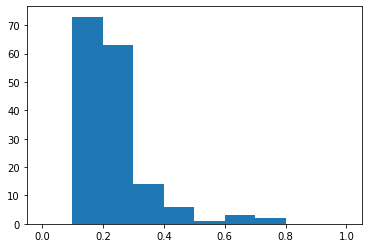

In [38]:
PHNN SEGNET DILATED UNET VNET
0.9317227702074582  0.3092576580978282  0.4673292798795177  0.47652322305608835  0.5052848531191375
1.8205943376186107  0.3294114124872595  1.763590694237304  1.0802085496672071  0.1779770617038452

In [ ]:
# PHNN No clean
0.9761883729939207 0.012638863472936461

# V-Net Auto Flood
0.9842770366091181 0.003670168440192961
0.9833560322733153 0.004263386941391032
0.9847818895541632 0.003823337776106766

# SegNet No clean
0.9901759633021932 0.0050133967271510805
0.9892060182162588 0.005297758680680319
0.9901169181849344 0.006340035967959409

# Dilated No clean
0.9894991657165835 0.0056362640242100265
0.9871159077789926 0.009877912345766748
0.9906052529418347 0.004796899673128249

# U-Net No clean
0.9880306926296695 0.008664004644503705
0.9866806511745151 0.010274115205331735
0.9883894397387356 0.010814791321822736

# V-Net Auto
0.978411841554592 0.004060669000769334
0.9770319999288019 0.004821316021169176
0.9792464157863137 0.003947702147224323

# V-Net
0.9747439106732865 0.004596541053848473
0.9774590992538806 0.004536261862846076
0.9793622351732298 0.004142143890749931

In [ ]:
# With Flood (Dice) 650 cutoff, and flood inside lung region with 1 dilation and rest 3 dilation
0.9852555204044096 0.003582164760829331
0.9847093446063236 0.004388858942543293
0.9854183574888001 0.003749638615455204

# With Flood (Dice) 650 cutoff, and flood inside lung region is not done, 3 dilation
0.9852161357620238 0.003487133824295265
0.9846431433414895 0.004016755605466141
0.9853897913006766 0.0037539897419058186

# With Flood (Dice) 600 cutoff, and flood inside lung region is not done, 3 dilation
0.9851588164817028 0.003506397997939686
0.9846589038326553 0.00403951676085751
0.9852703380909044 0.003772192404418331

In [ ]:
# left

PHNN FLOOD SEGNET WITHOUT-FLOOD DILATED UNET VNET
0.49231449574800473  0.38229026961362716  0.34319976587484363  0.5724337616207263  0.3188784121865591  0.21023744064643762  0.5401970721414584
0.17864890294527977  0.21671077804890204  0.33679135128156823  0.2754988947594081  0.31635362677877565  0.24079080402794925  0.26134520869718153

In [ ]:
# right

PHNN FLOOD SEGNET WITHOUT-FLOOD DILATED UNET VNET
inf  0.4092934226277604  0.381186227266373  0.6132187802657967  0.3450561921407553  0.22550870610514115  0.5793646039868439
nan  0.32748926852018073  0.4831334138419524  0.4570906866151696  0.4846379657644346  0.4033221260922906  0.4512339549417664

In [ ]:
# Total

PHNN FLOOD SEGNET WITHOUT-FLOOD DILATED UNET VNET
0.4712405288570829  0.364023031776942  0.32639379030605487  0.559817578754926  0.2962903273152933  0.1864843843688173  0.5279754090287682
0.15456858764586096  0.14475509526385255  0.28380441349511865  0.2385202626785712  0.27605312514493435  0.17353146629443955  0.23118881186139328

In [ ]:
# [BLOCK 7] For getting slack Map

def get_slack_map(v_luna, s, slack_mm):
    d                  = ndimage.distance_transform_edt(v_luna, [s[2], s[1], s[0]])
    d[d > slack_mm]    = 0
    d[d != 0]          = 1
    d1                 = ndimage.distance_transform_edt(1-v_luna, [s[2], s[1], s[0]])
    d1[d1 > slack_mm]  = 0
    d1[d1 != 0]        = 1
    total_slack                    = d + d1
    total_slack[total_slack != 0 ] = 1
    return total_slack

def get_edt(v_luna, s):
    d                  = ndimage.distance_transform_edt(v_luna, [s[2], s[1], s[0]])
    d1                 = ndimage.distance_transform_edt(1-v_luna, [s[2], s[1], s[0]])
    return d.astype('float16'), d1.astype('float16')

def dice_coefficient_numpy_slack(y_true, y_pred, total_slack, flag=True, smooth=1.):
    init_shape = y_true.shape
    
    if flag:
        y_true[total_slack == 1] = 0
        y_pred[total_slack == 1] = 0
    
    intersection = np.sum(y_true.flatten() * y_pred.flatten())
    union        = np.sum(y_true) + np.sum(y_pred) + smooth
    
    return (2. * intersection + smooth) / (union + smooth)

trainids = np.load('/media/dril/New Volume/LUNA/TEST.npy')

all_dice_t = []
all_dice_r = []
all_dice_l = []

all_shape_t = []
all_shape_r = []
all_shape_l = []


slack_mm = 2

for t in trainids:
    print(t)
    v_net   = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST-FLOOD/'+t+'.mhd')
    vnet_image  = v_net
    
    s       = v_net.GetSpacing()
    #v_net   = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET-CLEAN/'+t+'.mhd')
    v_net   = sitk.GetArrayFromImage(v_net)
    v_net[v_net == 3]      = 0
    
    v_net_l = copy.deepcopy(v_net)
    v_net_r = copy.deepcopy(v_net)
    
    v_luna    = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')
    v_luna    = sitk.GetArrayFromImage(v_luna)
    v_luna_l  = copy.deepcopy(v_luna)
    v_luna_r  = copy.deepcopy(v_luna)
    
    v_net[v_net != 0]      = 1
    v_net[v_net != 1]      = 0
    v_net_r[v_net_r != 2]  = 0
    v_net_r[v_net_r == 2 ] = 1
    v_net_l[v_net_l != 1]  = 0

    v_luna[v_luna == 3]  = 1
    v_luna[v_luna == 4 ] = 1
    v_luna[v_luna != 1 ] = 0
    
    v_luna_l[v_luna_l != 3]  = 0
    v_luna_l[v_luna_l == 3 ] = 1
    v_luna_r[v_luna_r != 4]  = 0
    v_luna_r[v_luna_r == 4 ] = 1
    
    d, d1 = get_edt(v_luna, s)
    
    b  = copy.deepcopy(d)
    b1 = copy.deepcopy(d1)
    
    #total_slack1 = get_slack_map(v_luna, s, 1)
    #total_slack2 = get_slack_map(v_luna, s, 2)
    
    slack_mm           = 1
    d[d > slack_mm]    = 0
    d[d != 0]          = 1
    d1[d1 > slack_mm]  = 0
    d1[d1 != 0]        = 1
    total_slack                    = d + d1
    total_slack[total_slack != 0 ] = 1
    
    final_result = sitk.GetImageFromArray(total_slack.astype('uint8'))
    final_result.SetSpacing(vnet_image.GetSpacing())
    final_result.SetDirection(vnet_image.GetDirection())
    final_result.SetOrigin(vnet_image.GetOrigin())
    sitk.WriteImage(final_result,   '/media/dril/New Volume/LUNA/SLACK-MAP/1_'+t+'.nii.gz',  True)

    slack_mm           = 2
    b[b > slack_mm]    = 0
    b[b != 0]          = 1
    b1[b1 > slack_mm]  = 0
    b1[b1 != 0]        = 1
    total_slack                    = b + b1
    total_slack[total_slack != 0 ] = 1
    
    final_result = sitk.GetImageFromArray(total_slack.astype('uint8'))
    final_result.SetSpacing(vnet_image.GetSpacing())
    final_result.SetDirection(vnet_image.GetDirection())
    final_result.SetOrigin(vnet_image.GetOrigin())
    sitk.WriteImage(final_result,   '/media/dril/New Volume/LUNA/SLACK-MAP/2_'+t+'.nii.gz',  True)
#     final_result = sitk.GetImageFromArray(total_slack2.astype('uint8'))
#     final_result.SetSpacing(vnet_image.GetSpacing())
#     final_result.SetDirection(vnet_image.GetDirection())
#     final_result.SetOrigin(vnet_image.GetOrigin())
#     sitk.WriteImage(final_result,   '/media/dril/New Volume/LUNA/SLACK-MAP/2_'+t+'.nii.gz',  True)
    
#     dice_vnet_l = dice_coefficient_numpy_slack(v_luna_l, v_net_l, total_slack)
#     dice_vnet_r = dice_coefficient_numpy_slack(v_luna_r, v_net_r, total_slack)
#     dice_vnet_t = dice_coefficient_numpy_slack(v_luna,   v_net,   total_slack)
    
#     all_dice_t.append(dice_vnet_t)
#     all_dice_r.append(dice_vnet_l)
#     all_dice_l.append(dice_vnet_r)

#     v_shape   = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-UNET/'+t+'.nii.gz')
#     v_shape   = sitk.GetArrayFromImage(v_shape)
#     v_shape_l = copy.deepcopy(v_shape)
#     v_shape_r = copy.deepcopy(v_shape)

#     v_shape[v_shape != 0]      = 1
#     v_shape[v_shape != 1]      = 0
#     v_shape_l[v_shape_l != 2]  = 0
#     v_shape_l[v_shape_l == 2 ] = 1
#     v_shape_r[v_shape_r != 1]  = 0

#     dice_shape_l = dice_coefficient_numpy_slack(v_luna_l, v_shape_l, total_slack)
#     dice_shape_r = dice_coefficient_numpy_slack(v_luna_r, v_shape_r, total_slack)
#     dice_shape_t = dice_coefficient_numpy_slack(v_luna,   v_shape,   total_slack)

#     all_shape_t.append(dice_shape_t)
#     all_shape_r.append(dice_shape_r)
#     all_shape_l.append(dice_shape_l)
    
#     print(t, dice_shape_t,  dice_shape_l,  dice_shape_r)
#     print(t, dice_vnet_t,   dice_vnet_l,   dice_vnet_r)

print(np.mean(all_dice_t), np.std(all_dice_t))
print(np.mean(all_dice_r), np.std(all_dice_r))
print(np.mean(all_dice_l), np.std(all_dice_l))

print(np.mean(all_shape_t), np.std(all_shape_t))
print(np.mean(all_shape_r), np.std(all_shape_r))
print(np.mean(all_shape_l), np.std(all_shape_l))

In [ ]:
# [BLOCK 7] For getting the DICE coefficient for LUNA for Product and shape auto-encoder

def get_slack_map(v_luna, s, slack_mm):
    d                  = ndimage.distance_transform_edt(v_luna, [s[2], s[1], s[0]])
    d[d > slack_mm]    = 0
    d[d != 0]          = 1
    d1                 = ndimage.distance_transform_edt(1-v_luna, [s[2], s[1], s[0]])
    d1[d1 > slack_mm]  = 0
    d1[d1 != 0]        = 1
    total_slack                    = d + d1
    total_slack[total_slack != 0 ] = 1
    return total_slack

def get_edt(v_luna, s):
    d                  = ndimage.distance_transform_edt(v_luna, [s[2], s[1], s[0]])
    d1                 = ndimage.distance_transform_edt(1-v_luna, [s[2], s[1], s[0]])
    return d.astype('float16'), d1.astype('float16')


#@njit(nopython=True)
def dice_coefficient_numpy_slack(y_true, y_pred, total_slack, flag=True, smooth=1.):
    if flag:
        y_true[total_slack == 1] = 0
        y_pred[total_slack == 1] = 0
    
    intersection = np.sum(y_true.flatten() * y_pred.flatten())
    union        = np.sum(y_true) + np.sum(y_pred) + smooth
    
    return (2. * intersection + smooth) / (union + smooth)

trainids = np.load('/media/dril/New Volume/LUNA/TEST.npy')

all_dice_t = []
all_dice_r = []
all_dice_l = []

all_shape_t = []
all_shape_r = []
all_shape_l = []


slack_mm = 2

for t in trainids:
    #v_net   = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-VNET-CLEAN/'+t+'.mhd')
    v_net       = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd')
    #v_net       = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-AUTO-NEAREST/'+t+'.mhd')
    vnet_image  = v_net
    
    s       = v_net.GetSpacing()
    
    v_net   = sitk.GetArrayFromImage(v_net)
    v_net[v_net == 3]      = 0
    v_net_l = copy.deepcopy(v_net)
    v_net_r = copy.deepcopy(v_net)
    
    v_luna    = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-GROUND/'+t+'.mhd')
    v_luna    = sitk.GetArrayFromImage(v_luna)
    v_luna_l  = copy.deepcopy(v_luna)
    v_luna_r  = copy.deepcopy(v_luna)
    
    left_value  = 2
    right_value = 1
    
    v_net[v_net != 0]      = 1
    v_net[v_net != 1]      = 0
    v_net_r[v_net_r != right_value]  = 0
    v_net_r[v_net_r == right_value ] = 1
    
    v_net_l[v_net_l != left_value]   = 0
    v_net_l[v_net_l == left_value]   = 1

    v_luna[v_luna == 3]  = 1
    v_luna[v_luna == 4 ] = 1
    v_luna[v_luna != 1 ] = 0
    
    v_luna_l[v_luna_l != 3]  = 0
    v_luna_l[v_luna_l == 3 ] = 1
    v_luna_r[v_luna_r != 4]  = 0
    v_luna_r[v_luna_r == 4 ] = 1
    
    total_slack = sitk.ReadImage('/media/dril/New Volume/LUNA/SLACK-MAP/'+str(slack_mm)+'_'+t+'.nii.gz')
    total_slack = sitk.GetArrayFromImage(total_slack)
    
    dice_vnet_l = dice_coefficient_numpy_slack(v_luna_l, v_net_l, total_slack)
    dice_vnet_r = dice_coefficient_numpy_slack(v_luna_r, v_net_r, total_slack)
    dice_vnet_t = dice_coefficient_numpy_slack(v_luna,   v_net,   total_slack)
    
    print(dice_vnet_l, dice_vnet_r, dice_vnet_t)
    all_dice_t.append(dice_vnet_t)
    all_dice_r.append(dice_vnet_l)
    all_dice_l.append(dice_vnet_r)

#     v_shape   = sitk.ReadImage('/media/dril/New Volume/LUNA/ORIG-SEG-DILATED/'+t+'.nii.gz')
#     v_shape   = sitk.GetArrayFromImage(v_shape)
#     v_shape_l = copy.deepcopy(v_shape)
#     v_shape_r = copy.deepcopy(v_shape)

#     v_shape[v_shape != 0]      = 1
#     v_shape[v_shape != 1]      = 0
#     v_shape_l[v_shape_l != 2]  = 0
#     v_shape_l[v_shape_l == 2 ] = 1
#     v_shape_r[v_shape_r != 1]  = 0

#     dice_shape_l = dice_coefficient_numpy_slack(v_luna_l, v_shape_l, total_slack)
#     dice_shape_r = dice_coefficient_numpy_slack(v_luna_r, v_shape_r, total_slack)
#     dice_shape_t = dice_coefficient_numpy_slack(v_luna,   v_shape,   total_slack)

#     all_shape_t.append(dice_shape_t)
#     all_shape_r.append(dice_shape_r)
#     all_shape_l.append(dice_shape_l)

print(np.mean(all_dice_t), np.std(all_dice_t))
print(np.mean(all_dice_r), np.std(all_dice_r))
print(np.mean(all_dice_l), np.std(all_dice_l))

# print(np.mean(all_shape_t), np.std(all_shape_t))
# print(np.mean(all_shape_r), np.std(all_shape_r))
# print(np.mean(all_shape_l), np.std(all_shape_l))

In [ ]:
# Dice slack 2 mm
# Clean CNN
U-Net
0.9969174692878502 0.0059392713376751685
0.9962613207362307 0.00756103243780001
0.9973268922590196 0.007368999467644992
Dilated CNN
0.9973515467811852 0.004497064453741725
0.9958560563902237 0.009735832631040622
0.9980374968808047 0.0025623464727972207

In [ ]:
# total, right, left
# Dice slack 2 mm
Auto-Flood
0.9979114642060415 0.0027170634808809328
0.9975185738182534 0.004207524657529398
0.9980942650875617 0.0024832934293138173
Auto-No-Flood
0.9972489627982161 0.002391607680729885
0.9967409126828657 0.003015382432857916
0.9974717211464006 0.002971865593978171
V-Net
0.997392808562247 0.0027093471867698856
0.9972775167814899 0.0028286833351177745
0.9972853931803242 0.0033668044457682888
U-Net
0.9941310547145096 0.00855548367287627
0.9943720645425825 0.010596592456606
0.9930939281091957 0.010488952779693373
Dilated CNN
0.9966481492088409 0.005200965316165926
0.9948045819202211 0.010331540295378536
0.997484230394338 0.003528637675369184
SegNet
0.9971468338600031 0.00382349492738275
0.9967013234718262 0.004269749944243113
0.9968344161167533 0.005048234851160107
P-HNN
0.9920335468309808 0.011264545506206518

In [ ]:
def compute_surface_distances_slack(mask_gt, mask_pred, spacing_mm):
    """Compute closest distances from all surface points to the other surface.
      Finds all surface elements "surfels" in the ground truth mask `mask_gt` and
      the predicted mask `mask_pred`, computes their area in mm^2 and the distance
      to the closest point on the other surface. It returns two sorted lists of
      distances together with the corresponding surfel areas. If one of the masks
      is empty, the corresponding lists are empty and all distances in the other
      list are `inf`.
      Args:
        mask_gt: 3-dim Numpy array of type bool. The ground truth mask.
        mask_pred: 3-dim Numpy array of type bool. The predicted mask.
        spacing_mm: 3-element list-like structure. Voxel spacing in x0, x1 and x2
            direction.
      Returns:
        A dict with:
        "distances_gt_to_pred": 1-dim numpy array of type float. The distances in mm
            from all ground truth surface elements to the predicted surface,
            sorted from smallest to largest.
        "distances_pred_to_gt": 1-dim numpy array of type float. The distances in mm
            from all predicted surface elements to the ground truth surface,
            sorted from smallest to largest.
        "surfel_areas_gt": 1-dim numpy array of type float. The area in mm^2 of
            the ground truth surface elements in the same order as
            distances_gt_to_pred
        "surfel_areas_pred": 1-dim numpy array of type float. The area in mm^2 of
            the predicted surface elements in the same order as
            distances_pred_to_gt
      """
    # compute the area for all 256 possible surface elements
    # (given a 2x2x2 neighbourhood) according to the spacing_mm
    neighbour_code_to_surface_area = np.zeros([256])
    for code in range(256):
        normals = np.array(neighbour_code_to_normals[code])
        sum_area = 0
        for normal_idx in range(normals.shape[0]):
            # normal vector
            n = np.zeros([3])
            n[0] = normals[normal_idx, 0] * spacing_mm[1] * spacing_mm[2]
            n[1] = normals[normal_idx, 1] * spacing_mm[0] * spacing_mm[2]
            n[2] = normals[normal_idx, 2] * spacing_mm[0] * spacing_mm[1]
            area = np.linalg.norm(n)
            sum_area += area
        neighbour_code_to_surface_area[code] = sum_area
    
    # compute the bounding box of the masks to trim
    # the volume to the smallest possible processing subvolume
    mask_all = mask_gt | mask_gt
    bbox_min = np.zeros(3, np.int64)
    bbox_max = np.zeros(3, np.int64)
    
    # max projection to the x0-axis
    proj_0 = np.max(np.max(mask_all, axis=2), axis=1)
    idx_nonzero_0 = np.nonzero(proj_0)[0]
    if len(idx_nonzero_0) == 0:  # pylint: disable=g-explicit-length-test
        return {"distances_gt_to_pred": np.array([]),
            "distances_pred_to_gt": np.array([]),
            "surfel_areas_gt": np.array([]),
            "surfel_areas_pred": np.array([])}
    
    bbox_min[0] = 0
    bbox_max[0] = mask_all.shape[0]
    
    bbox_min[1] = 0
    bbox_max[1] = mask_all.shape[1]
    
    bbox_min[2] = 0
    bbox_max[2] = mask_all.shape[2]
    
    # crop the processing subvolume.
    # we need to zeropad the cropped region with 1 voxel at the lower,
    # the right and the back side. This is required to obtain the "full"
    # convolution result with the 2x2x2 kernel
    cropmask_gt   = np.zeros((bbox_max - bbox_min)+2, np.uint8)
    cropmask_pred = np.zeros((bbox_max - bbox_min)+2, np.uint8)
    
    cropmask_gt[0:-1, 0:-1, 0:-1]   = mask_gt[bbox_min[0]:bbox_max[0]+1,
                                          bbox_min[1]:bbox_max[1]+1,
                                          bbox_min[2]:bbox_max[2]+1]
    cropmask_pred[0:-1, 0:-1, 0:-1] = mask_pred[bbox_min[0]:bbox_max[0]+1,
                                              bbox_min[1]:bbox_max[1]+1,
                                              bbox_min[2]:bbox_max[2]+1]
    
    # compute the neighbour code (local binary pattern) for each voxel
    # the resultsing arrays are spacially shifted by minus half a voxel in each
    # axis.
    # i.e. the points are located at the corners of the original voxels
    kernel = np.array([[[128, 64], [32, 16]], [[8, 4], [2, 1]]])
    
    neighbour_code_map_gt   = ndimage.filters.correlate(
      cropmask_gt.astype(np.uint8), kernel, mode="constant",   cval=0)
    neighbour_code_map_pred = ndimage.filters.correlate(
      cropmask_pred.astype(np.uint8), kernel, mode="constant", cval=0)
    
    # create masks with the surface voxels
    borders_gt   = ((neighbour_code_map_gt != 0) & (neighbour_code_map_gt != 255))
    borders_pred = ((neighbour_code_map_pred != 0) &
                  (neighbour_code_map_pred != 255))
    
    # compute the distance transform (closest distance of each voxel to the
    # surface voxels)
    if borders_gt.any():
        distmap_gt = ndimage.morphology.distance_transform_edt(
        ~borders_gt, sampling=spacing_mm)
    else:
        distmap_gt = np.Inf * np.ones(borders_gt.shape)
    
    if borders_pred.any():
        distmap_pred = ndimage.morphology.distance_transform_edt(
        ~borders_pred, sampling=spacing_mm)
    else:
        distmap_pred = np.Inf * np.ones(borders_pred.shape)
    
    # compute the area of each surface element
    surface_area_map_gt = neighbour_code_to_surface_area[neighbour_code_map_gt]
    surface_area_map_pred = neighbour_code_to_surface_area[
      neighbour_code_map_pred]
    
    # create a list of all surface elements with distance and area
    distances_gt_to_pred = distmap_pred[borders_gt]
    distances_pred_to_gt = distmap_gt[borders_pred]
    surfel_areas_gt = surface_area_map_gt[borders_gt]
    surfel_areas_pred = surface_area_map_pred[borders_pred]
    
    # sort them by distance
    if distances_gt_to_pred.shape != (0,):
        sorted_surfels_gt = np.array(
        sorted(zip(distances_gt_to_pred, surfel_areas_gt)))
        distances_gt_to_pred = sorted_surfels_gt[:, 0]
        surfel_areas_gt = sorted_surfels_gt[:, 1]
    
    if distances_pred_to_gt.shape != (0,):
        sorted_surfels_pred = np.array(
        sorted(zip(distances_pred_to_gt, surfel_areas_pred)))
        distances_pred_to_gt = sorted_surfels_pred[:, 0]
        surfel_areas_pred = sorted_surfels_pred[:, 1]

    return {"distances_gt_to_pred": distances_gt_to_pred,
          "distances_pred_to_gt": distances_pred_to_gt,
          "surfel_areas_gt": surfel_areas_gt,
          "surfel_areas_pred": surfel_areas_pred}

In [2]:
import astra
import numpy as np
import matplotlib.pyplot as plt

In [46]:

a       = np.load('/home/dril/Downloads/6.npy')
testvol = np.pad(a, ((1,1), (3, 3), (1, 1)), 'constant', constant_values=(0, 0))
testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])

testones = np.ones(testvol.shape)

vol_geom = astra.create_vol_geom(36, 60, 28)


theta   = np.arange(-5*5, 5*5, 2)*np.pi/180
l       = len(theta)
vectors = np.zeros((l, 12));


SOD       = 20
ODD       = 3
detWidth  = 0.235#0.085     # size of each detector pixel
detHeight = detWidth  # size of each detector pixel
detRows   = 1000
detCols   = 500


vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(l), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(l), np.zeros(l),  -np.ones(l)*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(l)*detWidth, np.zeros(l), np.zeros(l)]));         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(l), np.ones(l)*detWidth, np.zeros(l)]));        # V


proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors);
proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
W                = astra.OpTomo(proj_id)
sinogram         = W*testvol
sinogram         = sinogram/1000

print(sinogram.shape)
sinogramones = np.ones(sinogram.shape)
print(sinogram.shape)

(12500000,)
(12500000,)


In [5]:
sino_t = W.T*sinogram
print(sino_t.shape)

(60480,)


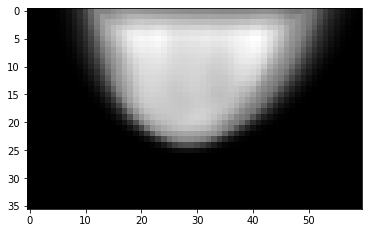

In [6]:
result_volume = sino_t
result_volume = np.reshape(result_volume, [28, 36, 60])
plt.imshow(np.reshape(result_volume[14, :, :], [36, 60]), cmap='gray')

In [20]:

sinogram         = W*testvol
print(sinogram.shape)

(6000000,)


In [ ]:
#y = zeros(ns,nt);
#x = permute(x0,[1 3 2]);

a       = np.load('/home/dril/Downloads/6.npy')
print(a.shape)

testvol = np.pad(a, ((1,1), (3, 3), (1, 1)), 'constant', constant_values=(0, 0))
testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])

m       = np.min(testvol.flatten())
testvol = testvol-m

testones     = np.ones(testvol.shape)
testprojones = np.ones([12, detCols, detRows])
estimate     = np.zeros(testvol.shape)

vol_geom = astra.create_vol_geom(36, 60, 28)


theta   = np.arange(-5*5, 5*5, 2)*np.pi/180
l       = len(theta)
vectors = np.zeros((l, 12));


SOD       = 100
ODD       = 1
detWidth  = 0.085     # size of each detector pixel
detHeight = detWidth  # size of each detector pixel
detRows   = 1000
detCols   = 500


vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(l), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(l), np.zeros(l),  -np.ones(l)*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(l)*detWidth, np.zeros(l), np.zeros(l)]));         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(l), np.ones(l)*detWidth, np.zeros(l)]));        # V

# Creating the projection matrix
Gt = []
for i in range(25):
    temp             = np.expand_dims(vectors[i, :], 0)
    proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, temp);
    proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
    W                = astra.OpTomo(proj_id)
    Gt.append(W)

niter = 5
nview = 25


# Create Projections and the norm arrays
l_arr    = []
d_arr    = []
proj_arr = []
#for i in range(0, niter):
for i in range(0, nview):
    G = Gt[i]

    l    = G*testones
    temp = G.T*np.ones(l.shape)
    
    d_arr.append(temp)
    
    l = np.reshape(l, [12, detCols, detRows])
    l = l[0, :, :]
    #l[l< 0.001] = 1
    l_arr.append(l)
    
    p = G*testvol
    p = np.reshape(p, [12, detCols, detRows])
    p = p[0, :, :]
    proj_arr.append(p)

for j in range(0, niter):
    print(j)
    for i in range(0, nview):
        #rint("View ", i)
        G = Gt[i]

        p    = G*estimate
        temp = G.T*p
        
        p = np.reshape(p, [12, detCols, detRows])
        p = p[0, :, :]
        
        pdif   = proj_arr[i] - p
        denomi = d_arr[i]
        
        # lmask = logical(l>5*dz)
        # Mask out too small l value to avoid blowup in y:
        # some l can be very small. When it is divided from p, 
        # the y value can be overamplified at the boundary(the 
        # boundary value could be 10 or 20 times larger than the
        # normal object value.
        
        #print(pdif.shape, l.shape)
        y       = np.divide(pdif, l)
        #temp    = np.isnan(y)
        #y[temp] = 0
        
        y1       = np.zeros([12, detCols*detRows])
        for k in range(12):
            y1[k, :]  = np.reshape(y, [detCols*detRows])
        y1       = np.reshape(y1, [12*detCols*detRows])
        imgi     = G.T*y1
        
        #print(imgi.shape, denomi.shape)
        imgj = np.divide(imgi, denomi)
        temp = np.isnan(imgj)
        imgj[temp] = 0
        estimate   = estimate + 0.9*np.reshape(imgi, np.shape(estimate))    
    estimate[estimate < 0] = 0
#x(x<0)=0;
#calculate the cost
#if(nargout>1)
#    mse=0;
#    for i=1:nview
#        pdif=proj(:,:,i)-Gt{i}*x;
#        mse=mse + sum(pdif(:).^2);
#    end
#    cost(iter)=mse;
#end     
#if (saveiter)
#    img(:,:,:,iter)=permute(x,[1 3 2]);
#end
#end

In [326]:

#testvol = np.moveaxis(testvol, [0, 1, 2], [1, 0, 2])
print(a.shape)

print(a.shape)

(800, 448, 320)
(320, 800, 448)


In [ ]:
# Code for real geometry

import scipy.io as sio
a = sio.loadmat("/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/LE/1.mat")["head"]
testvol = np.rollaxis(a, 2, 0)

testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])

testones     = np.ones(testvol.shape)
testprojones = np.ones([12, detCols, detRows])
estimate     = np.zeros(testvol.shape)

vol_geom = astra.create_vol_geom(448, 800, 320)

theta   = np.arange(-5*5, 5*5, 2)*np.pi/180
l       = len(theta)
vectors = np.zeros((l, 12));


SOD       = 65/0.02
ODD       = 4.5/0.02
detWidth  = 0.017*2/0.02     # size of each detector pixel
detHeight = detWidth  # size of each detector pixel
detRows   = 1000
detCols   = 300


vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(l), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(l), np.zeros(l),  -np.ones(l)*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(l)*detWidth, np.zeros(l), np.zeros(l)]));         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(l), np.ones(l)*detWidth, np.zeros(l)]));        # V

#proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors)

# Creating the projection matrix
Gt = []
for i in range(25):
    temp             = np.expand_dims(vectors[i, :], 0)
    proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, temp)
    proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
    W                = astra.OpTomo(proj_id)
    #print(W.shape)
    Gt.append(W)

# proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, vectors);
# proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
# W                = astra.OpTomo(proj_id)
# print(W.shape)

niter = 1
nview = 25


# Create Projections and the norm arrays
l_arr    = []
d_arr    = []
proj_arr = []
#for i in range(0, niter):
for i in range(0, 25):
    #print(i)
    G = Gt[i]
    #print(testones.shape)
    l    = G*testones
    temp = G.T*np.ones(l.shape)
    
    d_arr.append(temp)
    
    l = np.reshape(l, [12, detCols, detRows])
    l = l[0, :, :]
    l[l< 1] = 1
    l_arr.append(l)
    
    p = G*testvol#.flatten()
    #print(p.shape)
    p = np.reshape(p, [12, detCols, detRows])
    p = p[0, :, :]
    proj_arr.append(p)


for j in range(0, niter):
    print(j)
    for i in range(0, 25):
        print('View Number ', i)
        G    = Gt[i]
        
        p    = G*estimate
        temp = G.T*p
        
        p = np.reshape(p, [12, detCols, detRows])
        p = p[0, :, :]
        
        pdif   = proj_arr[i] - p
        denomi = d_arr[i]
        
        # lmask = logical(l>5*dz)
        # Mask out too small l value to avoid blowup in y:
        # some l can be very small. When it is divided from p, 
        # the y value can be overamplified at the boundary(the 
        # boundary value could be 10 or 20 times larger than the
        # normal object value.
        
        #print(pdif.shape, l.shape)
        l       = l_arr[i]
        y       = np.divide(pdif, l)
        #temp    = np.isnan(y)
        #y[temp] = 0
        
        y1       = np.zeros([12, detCols*detRows])
        for k in range(12):
            y1[k, :]  = np.reshape(y, [detCols*detRows])
        y1       = np.reshape(y1, [12*detCols*detRows])
        imgi     = G.T*y1
        
        print(imgi.shape, denomi.shape)
        imgj = np.divide(imgi, denomi)
        #temp = np.isnan(imgj)
        #imgj[temp] = 0
        estimate   = estimate + 0.9*np.reshape(imgi, np.shape(estimate))    
    estimate[estimate < 0] = 0

#x(x<0)=0;
#calculate the cost
#if(nargout>1)
#    mse=0;
#    for i=1:nview
#        pdif=proj(:,:,i)-Gt{i}*x;
#        mse=mse + sum(pdif(:).^2);
#    end
#    cost(iter)=mse;
#end     
#if (saveiter)
#    img(:,:,:,iter)=permute(x,[1 3 2]);
#end
#end

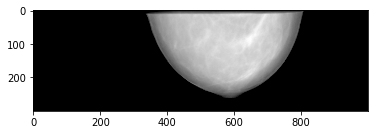

In [467]:
plt.imshow(pdif, cmap='gray')

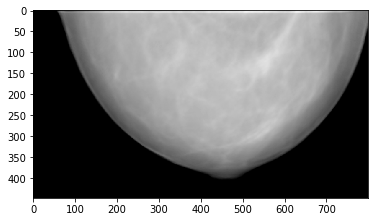

In [469]:
#print(proj_arr[0].shape)
#temp = np.reshape(proj_arr[0], [300, 1000, 25])[:, :, 10]
plt.imshow(estimate[120], cmap='gray')

In [337]:
a       = np.load('/home/dril/Downloads/6.npy')
print(a.shape)

testvol = np.pad(a, ((1,1), (3, 3), (1, 1)), 'constant', constant_values=(0, 0))
testvol = np.moveaxis(testvol, [0, 1, 2], [0, 2, 1])

m       = np.min(testvol.flatten())
testvol = testvol-m

testones     = np.ones(testvol.shape)
testprojones = np.ones([12, detCols, detRows])
estimate     = np.zeros(testvol.shape)

vol_geom = astra.create_vol_geom(36, 60, 28)


theta   = np.arange(-5*5, 5*5, 2)*np.pi/180
l       = len(theta)
vectors = np.zeros((l, 12));


SOD       = 100
ODD       = 1
detWidth  = 0.085     # size of each detector pixel
detHeight = detWidth  # size of each detector pixel
detRows   = 1000
detCols   = 500


vectors[:, 0:3]  = np.transpose(np.array([np.sin(theta), np.zeros(l), np.cos(theta)])) * SOD        # S source to object
vectors[:,3:6]   = np.transpose(np.array([np.zeros(l), np.zeros(l),  -np.ones(l)*ODD]))             # D object to detector
vectors[:,6:9]   = np.transpose(np.array([np.ones(l)*detWidth, np.zeros(l), np.zeros(l)]));         # U
vectors[:,9:12]  = np.transpose(np.array([np.zeros(l), np.ones(l)*detWidth, np.zeros(l)]));        # V

# Creating the projection matrix
Gt = []
for i in range(25):
    temp             = np.expand_dims(vectors[i, :], 0)
    proj_geom        = astra.create_proj_geom('cone_vec', detCols, detRows, temp);
    proj_id          = astra.create_projector('cuda3d', proj_geom, vol_geom)
    W                = astra.OpTomo(proj_id)
    Gt.append(W)

niter = 5
nview = 25


# Create Projections and the norm arrays
l_arr    = []
d_arr    = []
proj_arr = []
#for i in range(0, niter):
for i in range(0, nview):
    G = Gt[i]
    print(testones.shape)
    
    l    = G*testones
    temp = G.T*np.ones(l.shape)
    
    d_arr.append(temp)
    
    l = np.reshape(l, [12, detCols, detRows])
    l = l[0, :, :]
    #l[l< 0.001] = 1
    l_arr.append(l)
    
    p = G*testvol
    p = np.reshape(p, [12, detCols, detRows])
    p = p[0, :, :]
    proj_arr.append(p)

for j in range(0, niter):
    print(j)
    for i in range(0, nview):
        #rint("View ", i)
        G = Gt[i]

        p    = G*estimate
        temp = G.T*p
        
        p = np.reshape(p, [12, detCols, detRows])
        p = p[0, :, :]
        
        pdif   = proj_arr[i] - p
        denomi = d_arr[i]
        
        # lmask = logical(l>5*dz)
        # Mask out too small l value to avoid blowup in y:
        # some l can be very small. When it is divided from p, 
        # the y value can be overamplified at the boundary(the 
        # boundary value could be 10 or 20 times larger than the
        # normal object value.
        
        #print(pdif.shape, l.shape)
        y       = np.divide(pdif, l)
        #temp    = np.isnan(y)
        #y[temp] = 0
        
        y1       = np.zeros([12, detCols*detRows])
        for k in range(12):
            y1[k, :]  = np.reshape(y, [detCols*detRows])
        y1       = np.reshape(y1, [12*detCols*detRows])
        imgi     = G.T*y1
        
        #print(imgi.shape, denomi.shape)
        imgj = np.divide(imgi, denomi)
        temp = np.isnan(imgj)
        imgj[temp] = 0
        estimate   = estimate + 0.9*np.reshape(imgi, np.shape(estimate))    
    estimate[estimate < 0] = 0
#x(x<0)=0;
#calculate the cost
#if(nargout>1)
#    mse=0;
#    for i=1:nview
#        pdif=proj(:,:,i)-Gt{i}*x;
#        mse=mse + sum(pdif(:).^2);
#    end
#    cost(iter)=mse;
#end     
#if (saveiter)
#    img(:,:,:,iter)=permute(x,[1 3 2]);
#end
#end

(26, 54, 34)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
(28, 36, 60)
0


/home/dril/anaconda3/envs/astra/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in true_divide
/home/dril/anaconda3/envs/astra/lib/python3.6/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in true_divide
/home/dril/anaconda3/envs/astra/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in add
/home/dril/anaconda3/envs/astra/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in true_divide
/home/dril/anaconda3/envs/astra/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in less


1
2
3
4


In [ ]:
testprojones = np.ones([detCols*detRows])
print(testprojones.shape)
l = Gt[0].T*testprojones
print(l.shape)